# Desafio BIX 

## 0.0 Blibliotecas e Carga de Arquivos

In [1]:
#Importação das Bibliotecas utilizadas

import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply

from dataprep.eda import plot, plot_correlation, plot_missing

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 171)    #amplia display para visualizarmos todas as colunas(171) do dataset 
pd.set_option('display.max_rows', 171)       #amplia display para visualizarmos até 171 linhas

NumExpr defaulting to 4 threads.


In [2]:
#Carregamento das Bases de Dados

df_anteriores = pd.read_csv('base_vigente_anos_anteriores.csv')
df_2020 = pd.read_csv('base_vigente_2020.csv')

## 1.0 Verificação das Bases de Dados

### 1.1 Dimensões e Tipos de Dados

In [3]:
#Tamanho das Bases (Linhas, Colunas)

df_anteriores.shape, df_2020.shape

((60000, 171), (16000, 171))

In [4]:
#Visualizando df_anteriores

df_anteriores.head()

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

  ag_003 ag_004   ag_005   ag_006   ag_007 ag_008 ag_009   ah_000 ai_000  \
0      0  37250  1432864  3664156  1007684  25896      0  2551696      0   
1      0  18254   653294  1720800   516724  31642      0  1393352      0   
2      0   1648   370592  1883374   292936  12016      0  1234132      0   
3    318   2212     3232     1872        0      0      0     2668      0   
4      0  43752  1966618  1800340   131646   4588      0  1974038      0   

  aj_000 ak_000 al_000  am_0   an_000   ao_000   ap_000   aq_000 ar_000  \
0      0      0      0     0  4933296  3655166  1766008  1132040      0   
1     68      0      0     0  2560898  2127150  1084598   338544      0   
2      0      0      0     0  2371990  2173634   300796   153698      0   
3      0      0    642  3894    10184     7554    10764     1014      0   
4    226      0      0     0  3230626  2618878  1058136   551022      0   

  as_000 at_000 au_000 av_000 ax_000 ay_000 ay_001 ay_002 ay_003 ay_004  \
0      0      0      0   1012    268      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0    358    110      0      0      0      0      0   
3      0      0      0     60      6      0      0      0      0      0   
4      0      0      0   1788    642      0      0      0      0  42124   

   ay_005   ay_006   ay_007   ay_008 ay_009 az_000 az_001 az_002 az_003  \
0  469014  4239660   703300   755876      0   5374   2108   4114  12348   
1   71510   772720  1996924    99560      0   7336   7808  13776  13086   
2       0   870456   239798  1450312      0   1620   1156   1228  34250   
3       0        0     2038     5596      0     64      6      6    914   
4  372236  2128914   819596   584074      0   1644    362    562    842   

    az_004   az_005 az_006 az_007 az_008 az_009   ba_000   ba_001  ba_002  \
0   615248  5526276   2378      4      0      0  2328746  1022304  415432   
1  1010074  1873902  14726      6      0      0  1378576   447166  199512   
2  1811606   710672     34      0      0      0   790690   672026  332340   
3       76     2478   2398   1692      0      0     6176      340     304   
4    30194  3911734   1606      0      0      0  1348578  1035668  338762   

   ba_003  ba_004  ba_005   ba_006  ba_007 ba_008 ba_009   bb_000 bc_000  \
0  287230  310246  681504  1118814    3574      0      0  6700214      0   
1  154298  137280  138668   165908  229652  87082   4708  3646660     86   
2  254892  189596  135758   103552   81666     46      0  2673338    128   
3     102      74     406      216      16      0      0    21614      2   
4  236540  182278  151778   163248  470800  19292      0  4289260    448   

  bd_000 be_000 bf_000   bg_000 bh_000  bi_000  bj_000  bk_000  bl_000  \
0     10    108     50  2551696  97518  947550  799478  330760  353400   
1    454    364    350  1393352  49028  688314  392208  341420  359780   
2    202    576      4  1234132  28804  160176  139730  137160  130640   
3     12      0      0     2668    184    7632    3090      na      na   
4    556    642      2  1974038  86454  653692  399410  306780  282560   

   bm_000  bn_000  bo_000 bp_000 bq_000 br_000  bs_000    bt_000   bu_000  \
0  299160  305200  283680     na     na     na  178540  76698.08  6700214   
1  366560      na      na     na     na     na    6700  33057.51  3646660   
2      na      na      na     na     na     na   28000  41040.08  2673338   
3      na      na      na     na     n

In [5]:
# Visualizando df_2020

df_2020.head()

class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg      60      0     20     12      0      0      0      0      0   
1   neg      82      0     68     40      0      0      0      0      0   
2   neg   66002      2    212    112      0      0      0      0      0   
3   neg   59816     na   1010    936      0      0      0      0      0   
4   neg    1814     na    156    140      0      0      0      0      0   

   ag_003   ag_004   ag_005   ag_006   ag_007 ag_008 ag_009   ah_000 ai_000  \
0    2682     4736     3862     1846        0      0      0     3976      0   
1       0      748    12594     3636        0      0      0     5244      0   
2  199486  1358536  1952422   452706    25130    520      0  1891670      0   
3       0   123922   984314  1680050  1135268  92606  14038  1772828      0   
4       0       72    17926    82834     3114      0      0    48978      0   

  aj_000 ak_000 al_000    am_0   an_000   ao_000  ap_000  aq_000 ar_000  \
0      0      0   1520    2374    11516     9480  111258     470      0   
1     60      0      0       0    23174    18166   23686    1270      0   
2      0      0  77898  110548  3605894  3291610  959756  286536      0   
3      0      0   1116    2372  3546760  3053176  652616  423374      0   
4      0      0      0       0    97146    89920   12932    5092      0   

  as_000 at_000 au_000 av_000 ax_000 ay_000 ay_001 ay_002 ay_003 ay_004  \
0      0      0      0     58     26      0      0      0      0      0   
1      0      0      0     12     82      0      0      0      0      0   
2      0      0      0    106    340      0      0      0      0      0   
3      0   7274      0   1622    432      0      0      0      0      0   
4      0      0      0    102     50      0      0      0      0      0   

  ay_005   ay_006   ay_007  ay_008 ay_009 az_000 az_001 az_002  az_003  \
0      0        0        0   13124      2   1956    434     76     174   
1      0        0      692   16286      0    280     44     50    1274   
2  24286   681260  2808472  474782      0  22984    894   1162    1304   
3   6388  1091104  2930694    2012      0   3526    904   1426  223226   
4  11544    73570     3662   15170      0    126     34     60      58   

    az_004   az_005   az_006  az_007 az_008 az_009   ba_000  ba_001  ba_002  \
0      190     6198     1148    2948      2      0     8762    2566     480   
1      866     3362    11102       0      0      0    12564    1756     638   
2     1856   388700  3424812  123828  23260      0  1662580  667960  387998   
3  2663348  1137664      104       0      0      0  1283806  928212  345132   
4    10768    92898        2       0      0      0    53558   34620    9824   

   ba_003  ba_004  ba_005  ba_006  ba_007  ba_008  ba_009   bb_000 bc_000  \
0     380     196     516      86      66      74       0   124340      4   
1     276     172     132     812     308     192     128    46894      4   
2  226078  161558  148288  154908  220820  147744  210866  4644422    958   
3  265930  194770  158262  219942  620264   13880       0  4201350     98   
4    4552     764     294     192     142       0       0   110094      4   

  bd_000 be_000 bf_000   bg_000 bh_000  bi_000  bj_000  bk_000  bl_000  \
0      6      4      0     3976    318  107662    3458      na      na   
1      2     38      0     5244    360   20520    3134      na      na   
2   7848   3624      0  1891670  47066  692800  265492  336240  194360   
3    238    880     16  1772828  51468  331744  316130  176000  208420   
4      4    986      0    48978   1100    7932    4966      na      na   

   bm_000 bn_000 bo_000 bp_000 bq_000 br_000  bs_000    bt_000   bu_000  \
0      na     na     na     na     na     na  110980     59.53   124340   
1      na     na     na     na     na     na   23320     81.89    46894   
2  245240     na     na     na     na     na  175480  66002.89  4644422   
3  159380     na     na     na     na     na  

In [6]:
#Obtendo informações sobre os tipos de dados de df_anteriores

df_anteriores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [7]:
#Obtendo informações sobre os tipos de dados de df_2020

df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 20.9+ MB


In [8]:
#Identificar a feature que é do tipo 'int64'

colunas = df_2020.columns
colunas

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [9]:
for coluna in colunas:
    if df_2020[coluna].dtypes != 'O':
        print(df_2020[coluna])
    if df_anteriores[coluna].dtypes != 'O':
        print(df_anteriores[coluna])

0           60
1           82
2        66002
3        59816
4         1814
         ...  
15995    81852
15996       18
15997    79636
15998      110
15999        8
Name: aa_000, Length: 16000, dtype: int64
0         76698
1         33058
2         41040
3            12
4         60874
          ...  
59995    153002
59996      2286
59997       112
59998     80292
59999     40222
Name: aa_000, Length: 60000, dtype: int64


In [10]:
df_2020['aa_000'].dtypes

dtype('int64')

In [11]:
df_anteriores['aa_000'].dtypes

dtype('int64')

<font color="BLUE">Temos que a feature 'aa_000' é do tipo inteiro e as demais 170 features estão como string

<font color="BLUE">A idéia é converter tais features de string para numéricas

In [12]:
#Substituímos os valores 'na' por 'NaN'

for coluna in colunas:
    if (coluna != 'class') & (coluna != 'aa_000'):
        df_2020[coluna] = df_2020[coluna].replace(to_replace='na', value=np.NaN)
        df_anteriores[coluna] = df_anteriores[coluna].replace(to_replace='na', value=np.NaN)

In [13]:
#Troca todos os dados do DataFrame de 'object' para numéricos

for coluna in colunas:
    if (coluna != 'class') & (coluna != 'aa_000'):
        df_2020[coluna] = pd.to_numeric(df_2020[coluna])   
        df_anteriores[coluna] = pd.to_numeric(df_anteriores[coluna])   

### 1.2 Estatísticas das Features das Bases de Dados

In [14]:
df_2020.describe()

aa_000       ab_000        ac_000        ad_000        ae_000  \
count  1.600000e+04  3637.000000  1.507400e+04  12019.000000  15310.000000   
mean   6.799698e+04     0.772065  3.580393e+08    439.498794      6.428347   
std    5.035350e+05     2.589224  7.966968e+08   1551.328109    118.186469   
min    0.000000e+00     0.000000  0.000000e+00      0.000000      0.000000   
25%    9.280000e+02     0.000000  1.600000e+01     26.000000      0.000000   
50%    3.098200e+04     0.000000  1.590000e+02    130.000000      0.000000   
75%    4.947900e+04     0.000000  1.003500e+03    430.000000      0.000000   
max    4.294967e+07    58.000000  2.130707e+09  87038.000000  11044.000000   

             af_000         ag_000        ag_001        ag_002        ag_003  \
count  15310.000000   15811.000000  1.581100e+04  1.581100e+04  1.581100e+04   
mean      10.195950     120.858516  2.064204e+03  1.379236e+04  1.126276e+05   
std      167.260463    6454.660300  8.925778e+04  2.358405e+05  1.025843e+06   
min        0.000000       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%        0.000000       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
50%        0.000000       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
75%        0.000000       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
max    14186.000000  736174.000000  1.047252e+07  1.914916e+07  7.305747e+07   

             ag_004        ag_005        ag_006        ag_007        ag_008  \
count  1.581100e+04  1.581100e+04  1.581100e+04  1.581100e+04  1.581100e+04   
mean   4.905419e+05  1.175855e+06  1.697994e+06  5.063700e+05  3.592157e+04   
std    2.794524e+06  3.643970e+06  4.063961e+06  1.392886e+06  2.420740e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.140000e+02  1.462200e+04  1.187600e+04  0.000000e+00  0.000000e+00   
50%    3.722000e+03  1.806840e+05  9.591380e+05  1.165460e+05  1.732000e+03   
75%    5.264000e+04  9.240160e+05  1.893272e+06  5.969070e+05  2.773000e+04   
max    1.895324e+08  1.685347e+08  7.691299e+07  3.499815e+07  1.758501e+07   

             ag_009        ah_000        ai_000        aj_000        ak_000  \
count  1.581100e+04  1.582500e+04  1.583700e+04  1.583700e+04  1.480200e+04   
mean   5.784848e+03  1.917730e+06  1.177257e+04  1.255392e+03  9.293197e+02   
std    1.714079e+05  4.556205e+06  2.267914e+05  5.159816e+04  9.054565e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  3.185200e+04  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  1.011804e+06  0.000000e+00  0.000000e+00  0.000000e+00   
75%    4.110000e+02  1.612134e+06  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.398098e+07  8.207358e+07  1.777009e+07  3.913164e+06  1.093059e+07   

             al_000          am_0        an_000        ao_000        ap_000  \
count  1.583100e+04  1.583700e+04  1.583100e+04  1.583800e+04  1.583100e+04   
mean   7.088737e+04  1.121029e+05  3.660705e+06  3.178963e+06  1.076361e+06   
std    6.492392e+05  1.012689e+06  8.472479e+06  7.430516e+06  3.425632e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  7.818200e+04  7.019150e+04  2.638400e+04   
50%    0.000000e+00  0.000000e+00  1.940504e+06  1.667860e+06  3.618260e+05   
75%    1.294000e+03  2.552000e+03  3.154676e+06  2.706060e+06  7.318900e+05   
max    3.777930e+07  5.556690e+07  1.498686e+08  1.427517e+08  1.156131e+08   

             aq_000        ar_000        as_000        at_000        au_000  \
count  1.583800e+04  15236.000000  1.583700e+04  1.583700e+04  1.583700e+04   
mean   4.746624e+05      0.477684  6.994376e+02  5.664122e+03  5.599370e+02   
std    1.379943e+06      4.600420  5.790353e+04  1.266458e+05  4.757654e+04   
min    0.000000e+00      0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.386500e+03      0.000000  0.000000e+00  0.000000e

In [15]:
df_2020

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg      60     0.0  2.000000e+01    12.0     0.0     0.0     0.0   
1       neg      82     0.0  6.800000e+01    40.0     0.0     0.0     0.0   
2       neg   66002     2.0  2.120000e+02   112.0     0.0     0.0     0.0   
3       neg   59816     NaN  1.010000e+03   936.0     0.0     0.0     0.0   
4       neg    1814     NaN  1.560000e+02   140.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
15995   neg   81852     NaN  2.130706e+09   892.0     0.0     0.0     0.0   
15996   neg      18     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
15997   neg   79636     NaN  1.670000e+03  1518.0     0.0     0.0     0.0   
15998   neg     110     NaN  3.600000e+01    32.0     0.0     0.0     0.0   
15999   neg       8     0.0  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002    ag_003     ag_004     ag_005     ag_006     ag_007  \
0         0.0     0.0    2682.0     4736.0     3862.0     1846.0        0.0   
1         0.0     0.0       0.0      748.0    12594.0     3636.0        0.0   
2         0.0     0.0  199486.0  1358536.0  1952422.0   452706.0    25130.0   
3         0.0     0.0       0.0   123922.0   984314.0  1680050.0  1135268.0   
4         0.0     0.0       0.0       72.0    17926.0    82834.0     3114.0   
...       ...     ...       ...        ...        ...        ...        ...   
15995     0.0     0.0       0.0     5486.0   704012.0  3220278.0  1297498.0   
15996     0.0     0.0       0.0     6444.0     3308.0     2720.0        0.0   
15997     0.0     0.0       0.0    15062.0  1991298.0  2768440.0   329148.0   
15998     0.0     0.0       0.0      198.0     3730.0    27418.0      978.0   
15999     0.0     0.0       0.0     1350.0     3328.0     1126.0        0.0   

        ag_008   ag_009     ah_000  ai_000  aj_000  ak_000   al_000      am_0  \
0          0.0      0.0     3976.0     0.0     0.0     0.0   1520.0    2374.0   
1          0.0      0.0     5244.0     0.0    60.0     0.0      0.0       0.0   
2        520.0      0.0  1891670.0     0.0     0.0     0.0  77898.0  110548.0   
3      92606.0  14038.0  1772828.0     0.0     0.0     0.0   1116.0    2372.0   
4          0.0      0.0    48978.0     0.0     0.0     0.0      0.0       0.0   
...        ...      ...        ...     ...     ...     ...      ...       ...   
15995  76170.0   7206.0  2276100.0     0.0     0.0     0.0      0.0       0.0   
15996      0.0      0.0     3740.0     0.0     0.0     0.0   1150.0    2790.0   
15997  13124.0    990.0  2156280.0     0.0     0.0     0.0      0.0       0.0   
15998      0.0      0.0    12790.0     0.0     0.0     0.0      0.0       0.0   
15999      0.0      0.0     2228.0     0.0   472.0     0.0      0.0       0.0   

          an_000     ao_000     ap_000    aq_000  ar_000  as_000  at_000  \
0        11516.0     9480.0   111258.0     470.0     0.0     0.0     0.0   
1        23174.0    18166.0    23686.0    1270.0     0.0     0.0     0.0   
2      3605894.0  3291610.0   959756.0  286536.0     0.0     0.0     0.0   
3      3546760.0  3053176.0   652616.0  423374.0     0.0     0.0  7274.0   
4        97146.0    89920.0    12932.0    5092.0     0.0     0.0     0.0   
...          ...        ...        ...       ...     ...     ...     ...   
15995  4547950.0  3779700.0   973592.0  669608.0     0.0     0.0  1536.0   
15996    14656.0    12242.0     7222.0    1338.0     0.0     0.0     0.0   
15997  4562338.0  3828492.0  1238380.0  578006.0     0.0     0.0  1828.0   
15998    26026.0    13504.0    61018.0    6160.0     0.0     0.0     0.0   
15999    11650.0     9796.0     5404.0      96.0     0.0     0.0     0.0   

       au_000  av_000  ax_000  ay_000  ay_001  ay_002  ay_003  ay_004  \
0         0.0    58.0    26.0     0.0     0.0     0.0     0.0     0.0   
1         0.0    12.0    82.0     0.0     0.0     0.0     0.0     0.0   
2         0.0   106.0   340

In [16]:
df_anteriores.describe()

aa_000        ab_000        ac_000        ad_000        ae_000  \
count  6.000000e+04  13671.000000  5.666500e+04  4.513900e+04  57500.000000   
mean   5.933650e+04      0.713189  3.560143e+08  1.906206e+05      6.819130   
std    1.454301e+05      3.478962  7.948749e+08  4.040441e+07    161.543373   
min    0.000000e+00      0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    8.340000e+02      0.000000  1.600000e+01  2.400000e+01      0.000000   
50%    3.077600e+04      0.000000  1.520000e+02  1.260000e+02      0.000000   
75%    4.866800e+04      0.000000  9.640000e+02  4.300000e+02      0.000000   
max    2.746564e+06    204.000000  2.130707e+09  8.584298e+09  21050.000000   

             af_000        ag_000        ag_001        ag_002        ag_003  \
count  57500.000000  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04   
mean      11.006817  2.216364e+02  9.757223e+02  8.606015e+03  8.859128e+04   
std      209.792592  2.047846e+04  3.420053e+04  1.503220e+05  7.617312e+05   
min        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    20070.000000  3.376892e+06  4.109372e+06  1.055286e+07  6.340207e+07   

             ag_004        ag_005        ag_006        ag_007        ag_008  \
count  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04   
mean   4.370966e+05  1.108374e+06  1.657818e+06  4.993098e+05  3.556989e+04   
std    2.374282e+06  3.262607e+06  3.909384e+06  1.422765e+06  2.201524e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.080000e+02  1.383400e+04  1.060800e+04  0.000000e+00  0.000000e+00   
50%    3.672000e+03  1.760200e+05  9.303360e+05  1.192040e+05  1.786000e+03   
75%    4.952200e+04  9.139640e+05  1.886608e+06  5.888200e+05  2.669000e+04   
max    2.288306e+08  1.791880e+08  9.402067e+07  6.334675e+07  1.770252e+07   

             ag_009        ah_000        ai_000        aj_000        ak_000  \
count  5.932900e+04  5.935500e+04  5.937100e+04  5.937100e+04  5.560000e+04   
mean   5.114753e+03  1.809931e+06  9.016965e+03  1.143675e+03  9.794900e+02   
std    1.696582e+05  4.185740e+06  1.632778e+05  5.035971e+04  7.583162e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.973300e+04  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  1.002420e+06  0.000000e+00  0.000000e+00  0.000000e+00   
75%    3.640000e+02  1.601366e+06  0.000000e+00  0.000000e+00  0.000000e+00   
max    2.519851e+07  7.424732e+07  1.651285e+07  5.629340e+06  1.044492e+07   

             al_000          am_0        an_000        ao_000        ap_000  \
count  5.935800e+04  5.937100e+04  5.935800e+04  5.941100e+04  5.935800e+04   
mean   5.913048e+04  9.328133e+04  3.461037e+06  3.002440e+06  1.004160e+06   
std    5.394658e+05  8.494694e+05  7.790350e+06  6.819518e+06  3.088457e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  7.323850e+04  6.558500e+04  2.518900e+04   
50%    0.000000e+00  0.000000e+00  1.918629e+06  1.643556e+06  3.572810e+05   
75%    1.204000e+03  2.364000e+03  3.128416e+06  2.675796e+06  7.246605e+05   
max    3.476258e+07  5.590351e+07  1.408618e+08  1.222018e+08  7.793494e+07   

             aq_000        ar_000        as_000        at_000        au_000  \
count  5.941100e+04  57277.000000  5.937100e+04  5.937100e+04  5.937100e+04   
mean   4.424045e+05      0.496918  1.267365e+02  5.072046e+03  2.305804e+02   
std    1.262469e+06      5.511653  1.101004e+04  1.196159e+05  1.579952e+04   
min    0.000000e+00      0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.161000e+03      0.000000  0.000000e+00  0.000000e

In [17]:
df_anteriores

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2       neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
59995   neg  153002     NaN  6.640000e+02   186.0     0.0     0.0     0.0   
59996   neg    2286     NaN  2.130707e+09   224.0     0.0     0.0     0.0   
59997   neg     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998   neg   80292     NaN  2.130706e+09   494.0     0.0     0.0     0.0   
59999   neg   40222     NaN  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ag_003   ag_004     ag_005     ag_006     ag_007  \
0         0.0     0.0     0.0  37250.0  1432864.0  3664156.0  1007684.0   
1         0.0     0.0     0.0  18254.0   653294.0  1720800.0   516724.0   
2         0.0     0.0     0.0   1648.0   370592.0  1883374.0   292936.0   
3         0.0     0.0   318.0   2212.0     3232.0     1872.0        0.0   
4         0.0     0.0     0.0  43752.0  1966618.0  1800340.0   131646.0   
...       ...     ...     ...      ...        ...        ...        ...   
59995     0.0     0.0  2564.0  59100.0  1603216.0  6015982.0  1968266.0   
59996     0.0     0.0     0.0    104.0    99186.0    36564.0      128.0   
59997     0.0     0.0     0.0     28.0    11592.0    11538.0        0.0   
59998     0.0     0.0     0.0    330.0   202498.0  3251010.0  2061456.0   
59999     0.0     0.0     0.0   1226.0    46284.0  1901140.0   855376.0   

         ag_008   ag_009     ah_000  ai_000  aj_000  ak_000  al_000    am_0  \
0       25896.0      0.0  2551696.0     0.0     0.0     0.0     0.0     0.0   
1       31642.0      0.0  1393352.0     0.0    68.0     0.0     0.0     0.0   
2       12016.0      0.0  1234132.0     0.0     0.0     0.0     0.0     0.0   
3           0.0      0.0     2668.0     0.0     0.0     0.0   642.0  3894.0   
4        4588.0      0.0  1974038.0     0.0   226.0     0.0     0.0     0.0   
...         ...      ...        ...     ...     ...     ...     ...     ...   
59995  164972.0  12560.0  4880368.0     0.0   280.0     0.0  1224.0  2114.0   
59996       0.0      0.0    56982.0     0.0     0.0     0.0     0.0     0.0   
59997       0.0      0.0     8784.0     0.0     0.0     0.0     0.0     0.0   
59998  360436.0  59754.0  2634394.0     0.0     0.0     0.0     0.0     0.0   
59999   61744.0   6318.0  1235850.0  1926.0   474.0     0.0     0.0     0.0   

          an_000     ao_000     ap_000     aq_000  ar_000  as_000   at_000  \
0      4933296.0  3655166.0  1766008.0  1132040.0     0.0     0.0      0.0   
1      2560898.0  2127150.0  1084598.0   338544.0     0.0     0.0      0.0   
2      2371990.0  2173634.0   300796.0   153698.0     0.0     0.0      0.0   
3        10184.0     7554.0    10764.0     1014.0     0.0     0.0      0.0   
4      3230626.0  2618878.0  1058136.0   551022.0     0.0     0.0      0.0   
...          ...        ...        ...        ...     ...     ...      ...   
59995  8913782.0  7998174.0  1929126.0   776370.0     2.0     0.0      0.0   
59996   123604.0   108768.0    24020.0    11622.0     0.0     0.0      0.0   
59997    29698.0    23762.0    13970.0      874.0     0.0     0.0      0.0   
59998  4543410.0  3227856.0  1615634.0  1214970.0     0.0     0.0  57300.0   
59999  2502090.0  2109168.0   573660.0   334864.0     0.0     0.0      0.0   

       au_000  av_000  ax_000  ay_000  ay_001  ay_002  ay_003   ay_004  \
0         0.0  1012.0   268.0     0.0     0.0     0.0     0.0      0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0   
2         0.0   358.0   110.0     0.0     0.0     0.0     0.0      0.0  

In [18]:
# Contamos as ocorrências de defeitos, sendo 'pos': defeito no sistema de ar, e 'neg': defeito em qq outro sistema
df_2020['class'].value_counts(), df_anteriores['class'].value_counts()

(neg    15625
 pos      375
 Name: class, dtype: int64,
 neg    59000
 pos     1000
 Name: class, dtype: int64)

<font color="BLUE"><b>Os dados estão desbalanceados entre as ocorrências de 'manutenção no sistema de ar' e 'manutenção em demais sistemas'

### 1.3 Tratamento dos dados ausentes

In [19]:
df_2020.isna().sum()

class         0
aa_000        0
ab_000    12363
ac_000      926
ad_000     3981
ae_000      690
af_000      690
ag_000      189
ag_001      189
ag_002      189
ag_003      189
ag_004      189
ag_005      189
ag_006      189
ag_007      189
ag_008      189
ag_009      189
ah_000      175
ai_000      163
aj_000      163
ak_000     1198
al_000      169
am_0        163
an_000      169
ao_000      162
ap_000      169
aq_000      162
ar_000      764
as_000      163
at_000      163
au_000      163
av_000      688
ax_000      688
ay_000      192
ay_001      192
ay_002      192
ay_003      192
ay_004      192
ay_005      192
ay_006      192
ay_007      192
ay_008      192
ay_009      192
az_000      192
az_001      192
az_002      192
az_003      192
az_004      192
az_005      192
az_006      192
az_007      192
az_008      192
az_009      192
ba_000      193
ba_001      193
ba_002      193
ba_003      193
ba_004      193
ba_005      193
ba_006      193
ba_007      193
ba_008      193
ba_009  

In [20]:
df_anteriores.isna().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
ag_000      671
ag_001      671
ag_002      671
ag_003      671
ag_004      671
ag_005      671
ag_006      671
ag_007      671
ag_008      671
ag_009      671
ah_000      645
ai_000      629
aj_000      629
ak_000     4400
al_000      642
am_0        629
an_000      642
ao_000      589
ap_000      642
aq_000      589
ar_000     2723
as_000      629
at_000      629
au_000      629
av_000     2500
ax_000     2501
ay_000      671
ay_001      671
ay_002      671
ay_003      671
ay_004      671
ay_005      671
ay_006      671
ay_007      671
ay_008      671
ay_009      671
az_000      671
az_001      671
az_002      671
az_003      671
az_004      671
az_005      671
az_006      671
az_007      671
az_008      671
az_009      671
ba_000      688
ba_001      688
ba_002      688
ba_003      688
ba_004      688
ba_005      688
ba_006      688
ba_007      688
ba_008      688
ba_009  

<font color="BLUE">Como não temos dados de negócio para balizar a tomada de decisão sobre como substituir os dados faltantes, e como há uma quantidade enorme de dados faltantes: Vou optar por preencher com a moda (dado mais frequente) para cada coluna.

In [21]:
# Criando uma variável com as colunas que contêm NA

colunas_NA = df_anteriores.columns[df_anteriores.isna().any()].tolist()
print(colunas_NA)
len(colunas_NA)

['ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_000', 'cn_001', '

169

In [22]:
#Análise rápida dos valores média, moda e mediana de cada coluna para df_anteriores

for coluna in colunas_NA:
    print(f'\n-----------DF_ANTERIORES  Coluna: {coluna}-----------------\n')
    print(f'A média de {coluna} = {df_anteriores[coluna].mean(skipna=True)} ')
    print(f'A moda de {coluna} = {df_anteriores[coluna].mode(dropna=True)} ')
    print(f'A mediana de {coluna} = {df_anteriores[coluna].median(skipna=True)} ')


-----------DF_ANTERIORES  Coluna: ab_000-----------------

A média de ab_000 = 0.7131885012069343 
A moda de ab_000 = 0    0.0
dtype: float64 
A mediana de ab_000 = 0.0 

-----------DF_ANTERIORES  Coluna: ac_000-----------------

A média de ac_000 = 356014263.03146565 
A moda de ac_000 = 0    0.0
dtype: float64 
A mediana de ac_000 = 152.0 

-----------DF_ANTERIORES  Coluna: ad_000-----------------

A média de ad_000 = 190620.6393141186 
A moda de ad_000 = 0    0.0
dtype: float64 
A mediana de ad_000 = 126.0 

-----------DF_ANTERIORES  Coluna: ae_000-----------------

A média de ae_000 = 6.8191304347826085 
A moda de ae_000 = 0    0.0
dtype: float64 
A mediana de ae_000 = 0.0 

-----------DF_ANTERIORES  Coluna: af_000-----------------

A média de af_000 = 11.006817391304347 
A moda de af_000 = 0    0.0
dtype: float64 
A mediana de af_000 = 0.0 

-----------DF_ANTERIORES  Coluna: ag_000-----------------

A média de ag_000 = 221.63636670093882 
A moda de ag_000 = 0    0.0
dtype: float64

dtype: float64 
A mediana de bn_000 = 251400.0 

-----------DF_ANTERIORES  Coluna: bo_000-----------------

A média de bo_000 = 513147.82029706595 
A moda de bo_000 = 0    1310700.0
dtype: float64 
A mediana de bo_000 = 270660.0 

-----------DF_ANTERIORES  Coluna: bp_000-----------------

A média de bp_000 = 551389.7993474714 
A moda de bp_000 = 0    1310700.0
dtype: float64 
A mediana de bp_000 = 288320.0 

-----------DF_ANTERIORES  Coluna: bq_000-----------------

A média de bq_000 = 582871.3229295975 
A moda de bq_000 = 0    1310700.0
dtype: float64 
A mediana de bq_000 = 305100.0 

-----------DF_ANTERIORES  Coluna: br_000-----------------

A média de br_000 = 604886.6132637854 
A moda de br_000 = 0    1310700.0
dtype: float64 
A mediana de br_000 = 320400.0 

-----------DF_ANTERIORES  Coluna: bs_000-----------------

A média de bs_000 = 80360.54931335831 
A moda de bs_000 = 0    0.0
dtype: float64 
A mediana de bs_000 = 50540.0 

-----------DF_ANTERIORES  Coluna: bt_000------------

A mediana de dx_000 = 0.0 

-----------DF_ANTERIORES  Coluna: dy_000-----------------

A média de dy_000 = 7780.349640338012 
A moda de dy_000 = 0    0.0
dtype: float64 
A mediana de dy_000 = 0.0 

-----------DF_ANTERIORES  Coluna: dz_000-----------------

A média de dz_000 = 0.21575850690504042 
A moda de dz_000 = 0    0.0
dtype: float64 
A mediana de dz_000 = 0.0 

-----------DF_ANTERIORES  Coluna: ea_000-----------------

A média de ea_000 = 1.5677497075614995 
A moda de ea_000 = 0    0.0
dtype: float64 
A mediana de ea_000 = 0.0 

-----------DF_ANTERIORES  Coluna: eb_000-----------------

A média de eb_000 = 9717093.233439894 
A moda de eb_000 = 0    0.0
dtype: float64 
A mediana de eb_000 = 622110.0 

-----------DF_ANTERIORES  Coluna: ec_00-----------------

A média de ec_00 = 1353.1314515383535 
A moda de ec_00 = 0    0.0
dtype: float64 
A mediana de ec_00 = 754.4 

-----------DF_ANTERIORES  Coluna: ed_000-----------------

A média de ed_000 = 1452.155212401134 
A moda de ed_000 

In [23]:
#Análise rápida dos valores média, moda e mediana de cada coluna para df_2020

for coluna in colunas_NA:
    print(f'\n-----------DF_ANTERIORES  Coluna: {coluna}-----------------\n')
    print(f'A média de {coluna} = {df_2020[coluna].mean(skipna=True)} ')
    print(f'A moda de {coluna} = {df_2020[coluna].mode(dropna=True)} ')
    print(f'A mediana de {coluna} = {df_2020[coluna].median(skipna=True)} ')


-----------DF_ANTERIORES  Coluna: ab_000-----------------

A média de ab_000 = 0.7720648886444872 
A moda de ab_000 = 0    0.0
dtype: float64 
A mediana de ab_000 = 0.0 

-----------DF_ANTERIORES  Coluna: ac_000-----------------

A média de ac_000 = 358039349.50351596 
A moda de ac_000 = 0    0.0
dtype: float64 
A mediana de ac_000 = 159.0 

-----------DF_ANTERIORES  Coluna: ad_000-----------------

A média de ad_000 = 439.49879357683665 
A moda de ad_000 = 0    0.0
dtype: float64 
A mediana de ad_000 = 130.0 

-----------DF_ANTERIORES  Coluna: ae_000-----------------

A média de ae_000 = 6.428347485303723 
A moda de ae_000 = 0    0.0
dtype: float64 
A mediana de ae_000 = 0.0 

-----------DF_ANTERIORES  Coluna: af_000-----------------

A média de af_000 = 10.195950359242325 
A moda de af_000 = 0    0.0
dtype: float64 
A mediana de af_000 = 0.0 

-----------DF_ANTERIORES  Coluna: ag_000-----------------

A média de ag_000 = 120.8585162228828 
A moda de ag_000 = 0    0.0
dtype: float64 


A média de ba_005 = 198714.0112608338 
A moda de ba_005 = 0    0.0
dtype: float64 
A mediana de ba_005 = 85528.0 

-----------DF_ANTERIORES  Coluna: ba_006-----------------

A média de ba_006 = 215228.2159802619 
A moda de ba_006 = 0    0.0
dtype: float64 
A mediana de ba_006 = 71464.0 

-----------DF_ANTERIORES  Coluna: ba_007-----------------

A média de ba_007 = 190590.05086354146 
A moda de ba_007 = 0    0.0
dtype: float64 
A mediana de ba_007 = 5628.0 

-----------DF_ANTERIORES  Coluna: ba_008-----------------

A média de ba_008 = 37727.498576579994 
A moda de ba_008 = 0    0.0
dtype: float64 
A mediana de ba_008 = 24.0 

-----------DF_ANTERIORES  Coluna: ba_009-----------------

A média de ba_009 = 42205.1833997596 
A moda de ba_009 = 0    0.0
dtype: float64 
A mediana de ba_009 = 0.0 

-----------DF_ANTERIORES  Coluna: bb_000-----------------

A média de bb_000 = 4804349.214028436 
A moda de bb_000 = 0    0.0
dtype: float64 
A mediana de bb_000 = 2383518.0 

-----------DF_ANTER

dtype: float64 
A mediana de cs_001 = 368.0 

-----------DF_ANTERIORES  Coluna: cs_002-----------------

A média de cs_002 = 258991.68895073052 
A moda de cs_002 = 0    0.0
dtype: float64 
A mediana de cs_002 = 21620.0 

-----------DF_ANTERIORES  Coluna: cs_003-----------------

A média de cs_003 = 378540.57731958764 
A moda de cs_003 = 0    0.0
dtype: float64 
A mediana de cs_003 = 124004.0 

-----------DF_ANTERIORES  Coluna: cs_004-----------------

A média de cs_004 = 485730.1689962684 
A moda de cs_004 = 0    0.0
dtype: float64 
A mediana de cs_004 = 92856.0 

-----------DF_ANTERIORES  Coluna: cs_005-----------------

A média de cs_005 = 2341946.6277907784 
A moda de cs_005 = 0    0.0
dtype: float64 
A mediana de cs_005 = 1244718.0 

-----------DF_ANTERIORES  Coluna: cs_006-----------------

A média de cs_006 = 552500.8836885713 
A moda de cs_006 = 0    0.0
dtype: float64 
A mediana de cs_006 = 244748.0 

-----------DF_ANTERIORES  Coluna: cs_007-----------------

A média de cs_007 

In [24]:
df_anteriores['bx_000'].mode(dropna=True)

0    202.0
1    212.0
dtype: float64

In [25]:
df_anteriores['bx_000'].unique()

array([6599892., 3582034., 2678534., ...,   44562., 6092764., 3075902.])

### 1.4 Preenchendo os NA

In [26]:
#Substituindo os Valores NaN pela moda:

for coluna in colunas_NA:
    moda_anteriores_coluna = df_anteriores[coluna].mode(dropna=True)[0]
    moda_2020_coluna = df_2020[coluna].mode(dropna=True)[0]
        
    df_anteriores[coluna] = df_anteriores[coluna].apply(lambda x: moda_anteriores_coluna if math.isnan(x) else x)
    df_2020[coluna] = df_2020[coluna].apply(lambda x: moda_2020_coluna if math.isnan(x) else x)

In [27]:
df_anteriores.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
ag_000    0
ag_001    0
ag_002    0
ag_003    0
ag_004    0
ag_005    0
ag_006    0
ag_007    0
ag_008    0
ag_009    0
ah_000    0
ai_000    0
aj_000    0
ak_000    0
al_000    0
am_0      0
an_000    0
ao_000    0
ap_000    0
aq_000    0
ar_000    0
as_000    0
at_000    0
au_000    0
av_000    0
ax_000    0
ay_000    0
ay_001    0
ay_002    0
ay_003    0
ay_004    0
ay_005    0
ay_006    0
ay_007    0
ay_008    0
ay_009    0
az_000    0
az_001    0
az_002    0
az_003    0
az_004    0
az_005    0
az_006    0
az_007    0
az_008    0
az_009    0
ba_000    0
ba_001    0
ba_002    0
ba_003    0
ba_004    0
ba_005    0
ba_006    0
ba_007    0
ba_008    0
ba_009    0
bb_000    0
bc_000    0
bd_000    0
be_000    0
bf_000    0
bg_000    0
bh_000    0
bi_000    0
bj_000    0
bk_000    0
bl_000    0
bm_000    0
bn_000    0
bo_000    0
bp_000    0
bq_000    0
br_000    0
bs_000    0
bt_000    0
bu_000    0
bv_0

In [28]:
df_2020.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
ag_000    0
ag_001    0
ag_002    0
ag_003    0
ag_004    0
ag_005    0
ag_006    0
ag_007    0
ag_008    0
ag_009    0
ah_000    0
ai_000    0
aj_000    0
ak_000    0
al_000    0
am_0      0
an_000    0
ao_000    0
ap_000    0
aq_000    0
ar_000    0
as_000    0
at_000    0
au_000    0
av_000    0
ax_000    0
ay_000    0
ay_001    0
ay_002    0
ay_003    0
ay_004    0
ay_005    0
ay_006    0
ay_007    0
ay_008    0
ay_009    0
az_000    0
az_001    0
az_002    0
az_003    0
az_004    0
az_005    0
az_006    0
az_007    0
az_008    0
az_009    0
ba_000    0
ba_001    0
ba_002    0
ba_003    0
ba_004    0
ba_005    0
ba_006    0
ba_007    0
ba_008    0
ba_009    0
bb_000    0
bc_000    0
bd_000    0
be_000    0
bf_000    0
bg_000    0
bh_000    0
bi_000    0
bj_000    0
bk_000    0
bl_000    0
bm_000    0
bn_000    0
bo_000    0
bp_000    0
bq_000    0
br_000    0
bs_000    0
bt_000    0
bu_000    0
bv_0

In [29]:
df_anteriores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [30]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 20.9+ MB


### 1.5 Mudança de Tipos

In [31]:
colunas_INT = colunas.drop(['class', 'aa_000', 'bt_000', 'by_000', 'ci_000', 'cj_000', 'ck_000', 'ec_00'])
colunas_INT

Index(['ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001',
       'ag_002', 'ag_003', 'ag_004',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=163)

In [32]:
for coluna in colunas_INT:
    df_2020[coluna] = df_2020[coluna].astype('int64')   
    df_anteriores[coluna] = df_anteriores[coluna].astype('int64')   

In [33]:
df_anteriores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(6), int64(164), object(1)
memory usage: 78.3+ MB


In [34]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: float64(6), int64(164), object(1)
memory usage: 20.9+ MB


### 1.6 Análise Estatística Descritiva

In [35]:
num_atributos_anteriores = df_anteriores.select_dtypes(include= ['int64', 'float64'])
cat_atributos_anteriores = df_anteriores.select_dtypes(exclude= ['int64', 'float64'])

num_atributos_2020 = df_2020.select_dtypes(include= ['int64', 'float64'])
cat_atributos_2020 = df_2020.select_dtypes(exclude= ['int64', 'float64'])

#### 1.6.1 Estatísticas Atributos Numéricos

In [36]:
# Estatísticas de df_anteriores
# Estatísticas de Tendência Central - mean, median

tc1_ant = pd.DataFrame(num_atributos_anteriores.apply(np.mean)).T
tc2_ant = pd.DataFrame(num_atributos_anteriores.apply(np.median)).T


# Estatísticas de Dispersão - std, min, max, range, skew, kurtosis

d1_ant = pd.DataFrame(num_atributos_anteriores.apply(np.std)).T
d2_ant = pd.DataFrame(num_atributos_anteriores.apply(min)).T
d3_ant = pd.DataFrame(num_atributos_anteriores.apply(max)).T
d4_ant = pd.DataFrame(num_atributos_anteriores.apply(lambda x: x.max() - x.min())).T
d5_ant = pd.DataFrame(num_atributos_anteriores.apply(lambda x: x.skew())).T
d6_ant = pd.DataFrame(num_atributos_anteriores.apply(lambda x: x.kurtosis())).T

#Concatenando

met_ant = pd.concat( [d2_ant, d3_ant, d4_ant, tc1_ant, tc2_ant, d1_ant, d5_ant, d6_ant]).T.reset_index()
met_ant.columns = ['features', 'min', 'max', 'range', 'media', 'mediana', 'desvio_padrao', 'skew', 'kurtosis']
met_ant


features        min           max         range         media     mediana  \
0     aa_000        0.0  2.746564e+06  2.746564e+06  5.933650e+04    30776.00   
1     ab_000        0.0  2.040000e+02  2.040000e+02  1.625000e-01        0.00   
2     ac_000        0.0  2.130707e+09  2.130707e+09  3.362258e+08      120.00   
3     ad_000        0.0  8.584298e+09  8.584298e+09  1.434071e+05       42.00   
4     ae_000        0.0  2.105000e+04  2.105000e+04  6.535000e+00        0.00   
5     af_000        0.0  2.007000e+04  2.007000e+04  1.054820e+01        0.00   
6     ag_000        0.0  3.376892e+06  3.376892e+06  2.191577e+02        0.00   
7     ag_001        0.0  4.109372e+06  4.109372e+06  9.648104e+02        0.00   
8     ag_002        0.0  1.055286e+07  1.055286e+07  8.509771e+03        0.00   
9     ag_003        0.0  6.340207e+07  6.340207e+07  8.760054e+04        0.00   
10    ag_004        0.0  2.288306e+08  2.288306e+08  4.322084e+05     3486.00   
11    ag_005        0.0  1.791880e+08  1.791880e+08  1.095979e+06   167885.00   
12    ag_006        0.0  9.402067e+07  9.402067e+07  1.639278e+06   882004.00   
13    ag_007        0.0  6.334675e+07  6.334675e+07  4.937259e+05   111485.00   
14    ag_008        0.0  1.770252e+07  1.770252e+07  3.517210e+04     1563.00   
15    ag_009        0.0  2.519851e+07  2.519851e+07  5.057553e+03        0.00   
16    ah_000        0.0  7.424732e+07  7.424732e+07  1.790474e+06   989741.00   
17    ai_000        0.0  1.651285e+07  1.651285e+07  8.922438e+03        0.00   
18    aj_000        0.0  5.629340e+06  5.629340e+06  1.131685e+03        0.00   
19    ak_000        0.0  1.044492e+07  1.044492e+07  9.076607e+02        0.00   
20    al_000        0.0  3.476258e+07  3.476258e+07  5.849778e+04        0.00   
21      am_0        0.0  5.590351e+07  5.590351e+07  9.230343e+04        0.00   
22    an_000        0.0  1.408618e+08  1.408618e+08  3.424004e+06  1892068.00   
23    ao_000        0.0  1.222018e+08  1.222018e+08  2.972966e+06  1620136.00   
24    ap_000        0.0  7.793494e+07  7.793494e+07  9.934150e+05   350133.00   
25    aq_000        0.0  2.556265e+07  2.556265e+07  4.380615e+05   175051.00   
26    ar_000        0.0  3.500000e+02  3.500000e+02  4.743667e-01        0.00   
27    as_000        0.0  1.655240e+06  1.655240e+06  1.254079e+02        0.00   
28    at_000        0.0  1.040050e+07  1.040050e+07  5.018874e+03        0.00   
29    au_000        0.0  2.626676e+06  2.626676e+06  2.281631e+02        0.00   
30    av_000        0.0  7.944580e+05  7.944580e+05  1.071250e+03       94.00   
31    ax_000        0.0  1.166520e+05  1.166520e+05  3.587242e+02       58.00   
32    ay_000        0.0  5.055389e+07  5.055389e+07  1.207508e+04        0.00   
33    ay_001        0.0  8.052538e+07  8.052538e+07  1.007616e+04        0.00   
34    ay_002        0.0  2.847484e+07  2.847484e+07  1.085226e+04        0.00   
35    ay_003        0.0  1.394517e+07  1.394517e+07  7.144976e+03        0.00   
36    ay_004        0.0  4.002870e+07  4.002870e+07  1.044784e+04        0.00   
37    ay_005        0.0  1.249489e+08  1.249489e+08  1.107268e+05        0.00   
38    ay_006        0.0  1.276803e+08  1.276803e+08  1.066489e+06   155474.00   
39    ay_007        0.0  4.896782e+08  4.896782e+08  1.528743e+06   329374.00   
40    ay_008        0.0  1.045670e+08  1.045670e+08  1.039368e+06    90178.00   
41    ay_009        0.0  1.882466e+07  1.882466e+07  1.149620e+03        0.00   
42    az_000        0.0  1.012462e+07  1.012462e+07  7.761823e+03     2066.00   
43    az_001        0.0  4.530258e+06  4.530258e+06  4.371551e+03      618.00   
44    az_002        0.0  1.421766e+07  1.421766e+07  7.975876e+03      988.00   
45    az_003        0.0  4.558424e+07  4.558424e+07  8.626518e+04     3372.00   
46    az_004        0.0  1.230471e+08  1.230471e+08  1.460380e+06    74077.00   
47    az_005        0.0  4.678323e+08  4.678323e+08  2.111701e+06   509488.00   
48    az_006        0.0  6.458914e+

In [37]:
# Estatísticas de df_2020
# Estatísticas de Tendência Central - mean, median

tc1_2020 = pd.DataFrame(num_atributos_2020.apply(np.mean)).T
tc2_2020 = pd.DataFrame(num_atributos_2020.apply(np.median)).T


# Estatísticas de Dispersão - std, min, max, range, skew, kurtosis

d1_2020 = pd.DataFrame(num_atributos_2020.apply(np.std)).T
d2_2020 = pd.DataFrame(num_atributos_2020.apply(min)).T
d3_2020 = pd.DataFrame(num_atributos_2020.apply(max)).T
d4_2020 = pd.DataFrame(num_atributos_2020.apply(lambda x: x.max() - x.min())).T
d5_2020 = pd.DataFrame(num_atributos_2020.apply(lambda x: x.skew())).T
d6_2020 = pd.DataFrame(num_atributos_2020.apply(lambda x: x.kurtosis())).T

#Concatenando

met_2020 = pd.concat( [d2_2020, d3_2020, d4_2020, tc1_2020, tc2_2020, d1_2020, d5_2020, d6_2020]).T.reset_index()
met_2020.columns = ['features', 'min', 'max', 'range', 'media', 'mediana', 'desvio_padrao', 'skew', 'kurtosis']
met_2020

features        min           max         range         media  \
0     aa_000        0.0  4.294967e+07  4.294967e+07  6.799698e+04   
1     ab_000        0.0  5.800000e+01  5.800000e+01  1.755000e-01   
2     ac_000        0.0  2.130707e+09  2.130707e+09  3.373178e+08   
3     ad_000        0.0  8.703800e+04  8.703800e+04  3.301460e+02   
4     ae_000        0.0  1.104400e+04  1.104400e+04  6.151125e+00   
5     af_000        0.0  1.418600e+04  1.418600e+04  9.756250e+00   
6     ag_000        0.0  7.361740e+05  7.361740e+05  1.194309e+02   
7     ag_001        0.0  1.047252e+07  1.047252e+07  2.039820e+03   
8     ag_002        0.0  1.914916e+07  1.914916e+07  1.362944e+04   
9     ag_003        0.0  7.305747e+07  7.305747e+07  1.112972e+05   
10    ag_004        0.0  1.895324e+08  1.895324e+08  4.847474e+05   
11    ag_005        0.0  1.685347e+08  1.685347e+08  1.161965e+06   
12    ag_006        0.0  7.691299e+07  7.691299e+07  1.677936e+06   
13    ag_007        0.0  3.499815e+07  3.499815e+07  5.003885e+05   
14    ag_008        0.0  1.758501e+07  1.758501e+07  3.549725e+04   
15    ag_009        0.0  1.398098e+07  1.398098e+07  5.716515e+03   
16    ah_000        0.0  8.207358e+07  8.207358e+07  1.896754e+06   
17    ai_000        0.0  1.777009e+07  1.777009e+07  1.165263e+04   
18    aj_000        0.0  3.913164e+06  3.913164e+06  1.242602e+03   
19    ak_000        0.0  1.093059e+07  1.093059e+07  8.597369e+02   
20    al_000        0.0  3.777930e+07  3.777930e+07  7.013862e+04   
21      am_0        0.0  5.556690e+07  5.556690e+07  1.109608e+05   
22    an_000        0.0  1.498686e+08  1.498686e+08  3.622039e+06   
23    ao_000        0.0  1.427517e+08  1.427517e+08  3.146776e+06   
24    ap_000        0.0  1.156131e+08  1.156131e+08  1.064992e+06   
25    aq_000        0.0  3.455877e+07  3.455877e+07  4.698564e+05   
26    ar_000        0.0  1.880000e+02  1.880000e+02  4.548750e-01   
27    as_000        0.0  6.383704e+06  6.383704e+06  6.923121e+02   
28    at_000        0.0  1.065435e+07  1.065435e+07  5.606419e+03   
29    au_000        0.0  5.711474e+06  5.711474e+06  5.542326e+02   
30    av_000        0.0  2.998100e+05  2.998100e+05  1.197230e+03   
31    ax_000        0.0  5.357200e+04  5.357200e+04  3.704805e+02   
32    ay_000        0.0  7.404109e+07  7.404109e+07  2.495375e+04   
33    ay_001        0.0  5.835158e+07  5.835158e+07  1.544171e+04   
34    ay_002        0.0  3.023117e+07  3.023117e+07  1.261429e+04   
35    ay_003        0.0  1.251085e+07  1.251085e+07  7.590727e+03   
36    ay_004        0.0  1.526046e+07  1.526046e+07  8.538470e+03   
37    ay_005        0.0  3.151925e+07  3.151925e+07  8.566275e+04   
38    ay_006        0.0  9.006699e+07  9.006699e+07  1.081402e+06   
39    ay_007        0.0  1.655206e+08  1.655206e+08  1.578172e+06   
40    ay_008        0.0  3.268368e+08  3.268368e+08  1.169257e+06   
41    ay_009        0.0  5.476238e+06  5.476238e+06  1.128013e+03   
42    az_000        0.0  4.610588e+06  4.610588e+06  7.989471e+03   
43    az_001        0.0  1.571186e+06  1.571186e+06  4.675688e+03   
44    az_002        0.0  2.130518e+06  2.130518e+06  7.875945e+03   
45    az_003        0.0  3.861570e+07  3.861570e+07  8.845233e+04   
46    az_004        0.0  1.320373e+08  1.320373e+08  1.513548e+06   
47    az_005        0.0  4.810465e+08  4.810465e+08  2.238119e+06   
48    az_006        0.0  3.962983e+07  3.962983e+07  1.040088e+05   
49    az_007        0.0  1.156819e+07  1.156819e+07  1.954649e+04   
50    az_008        0.0  8.249920e+05  8.249920e+05  5.241204e+02   
51    az_009        0.0  1.539340e+05  1.539340e+05  2.059700e+01   
52    ba_000        0.0  1.519423e+08  1.519423e+08  1.452842e+06   
53    ba_001        0.0  1.420004e+08  1.420004e+08  9.302534e+05   
54    ba_002        0.0  4.853208e+07  4.853208e+07  4.311252e+05   
55    ba_003        0.0  3.289274e+07  3.289274e+07  2.872703e+05   
56    ba_004        0.0  2.401750e+07  2.401750e+07  2.155833e+05   
57

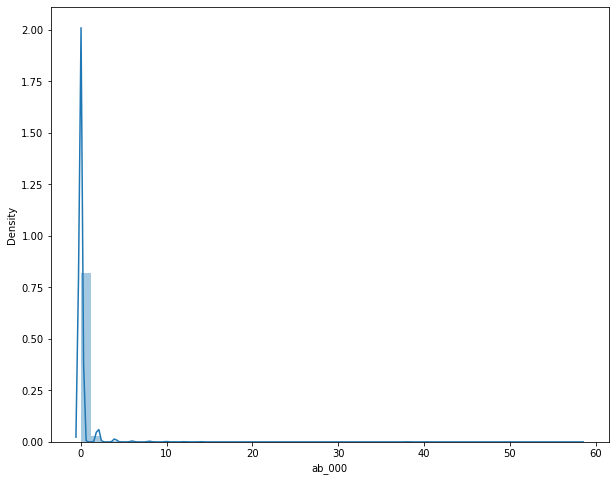

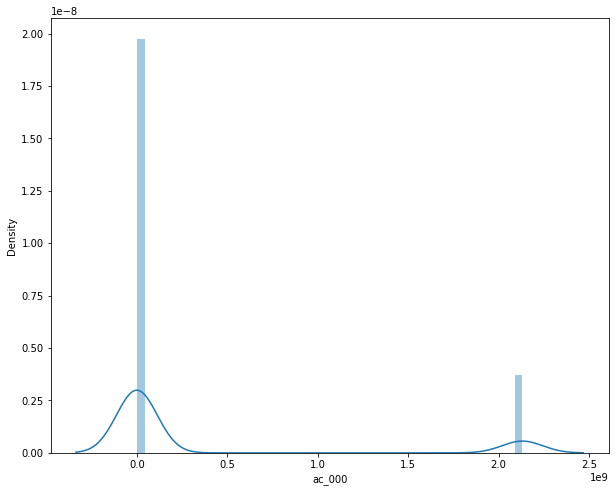

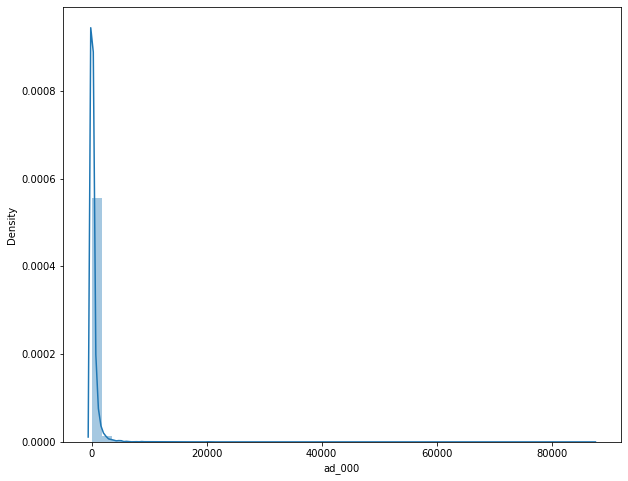

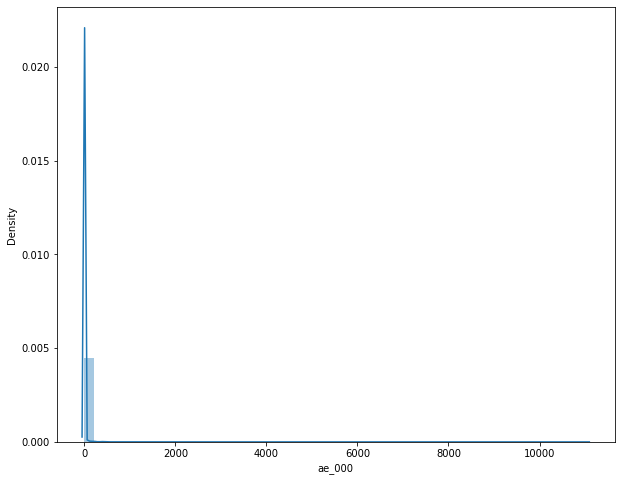

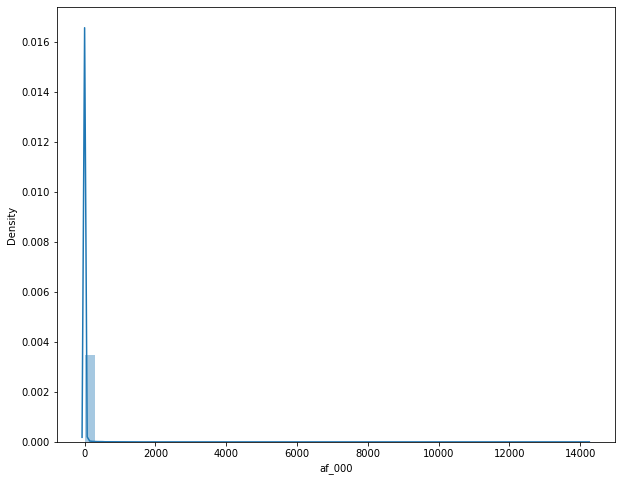

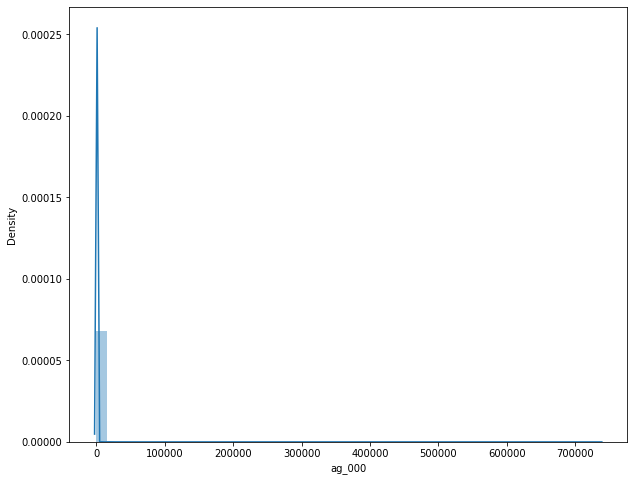

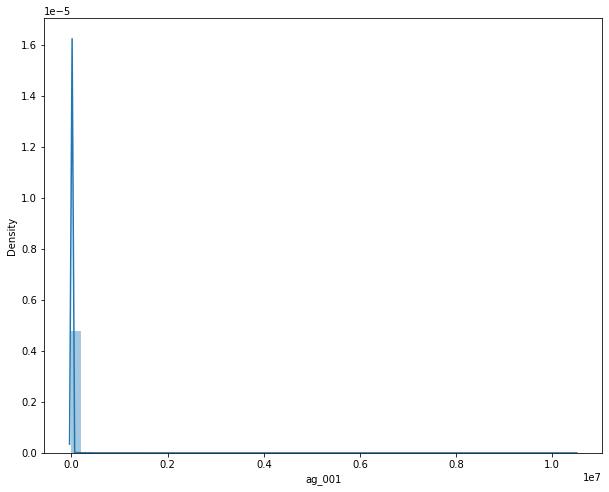

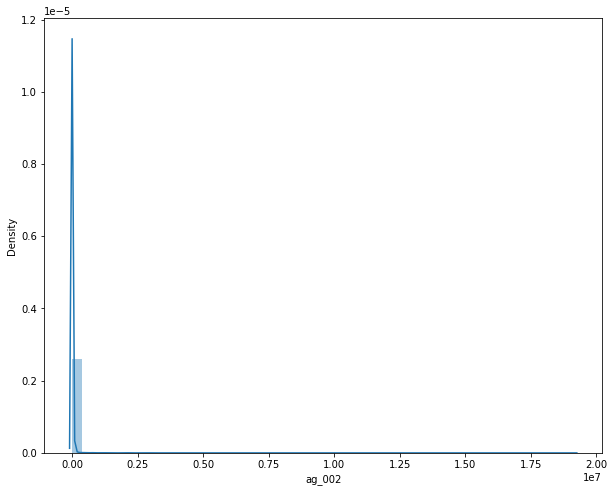

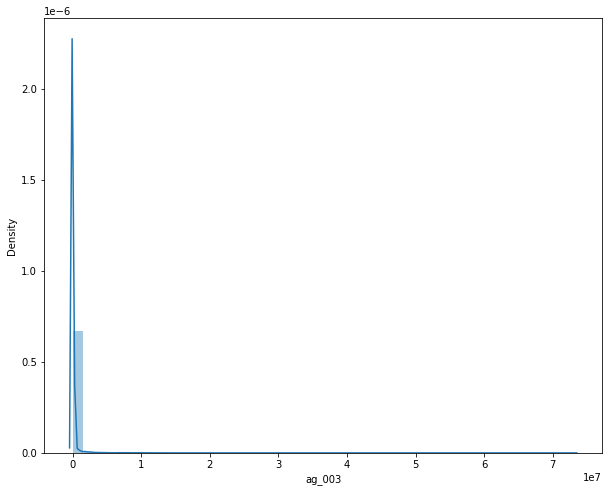

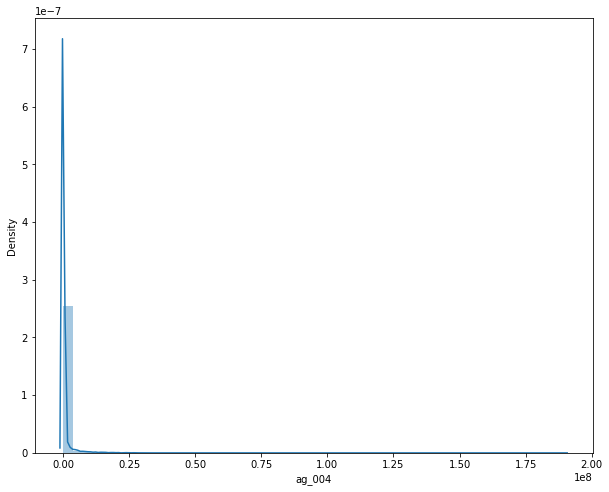

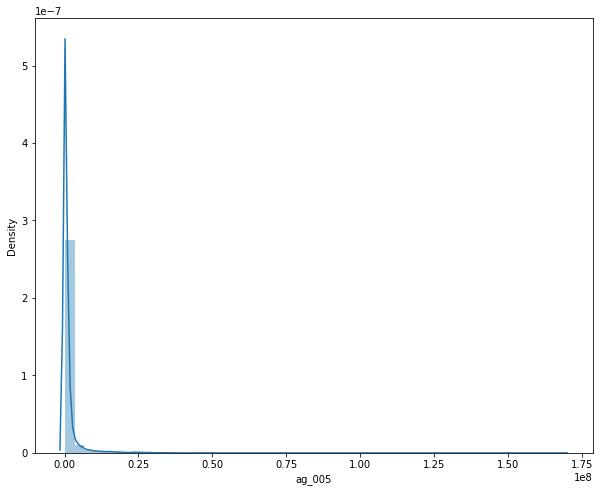

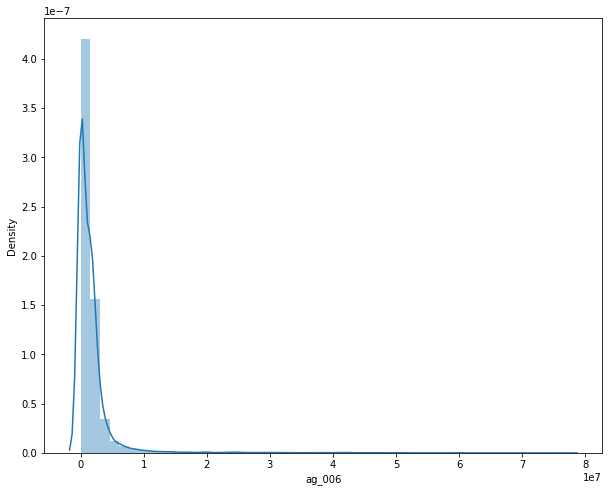

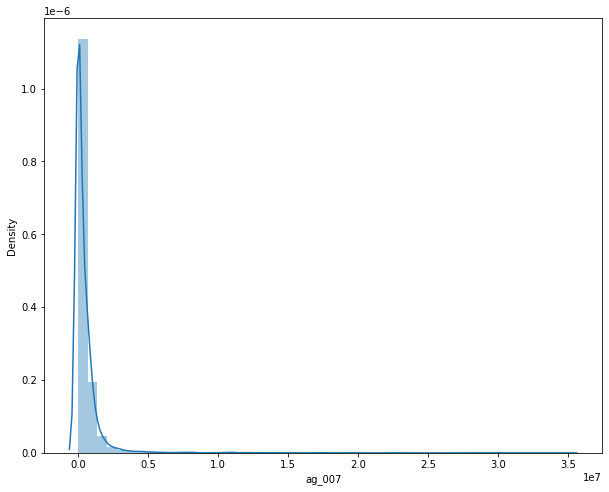

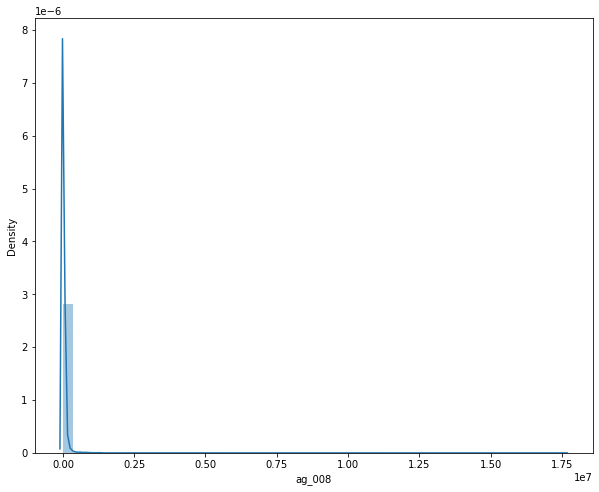

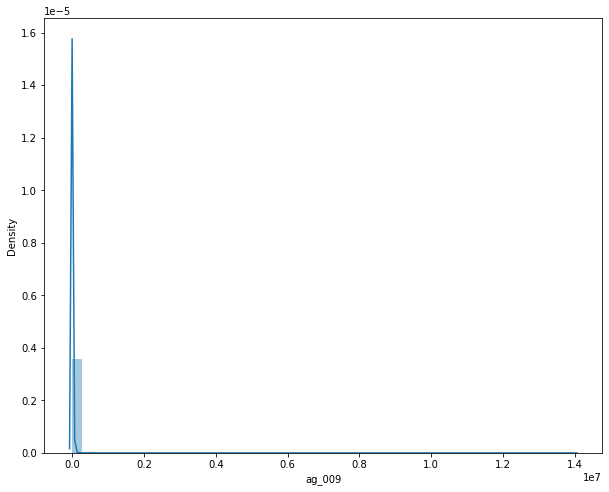

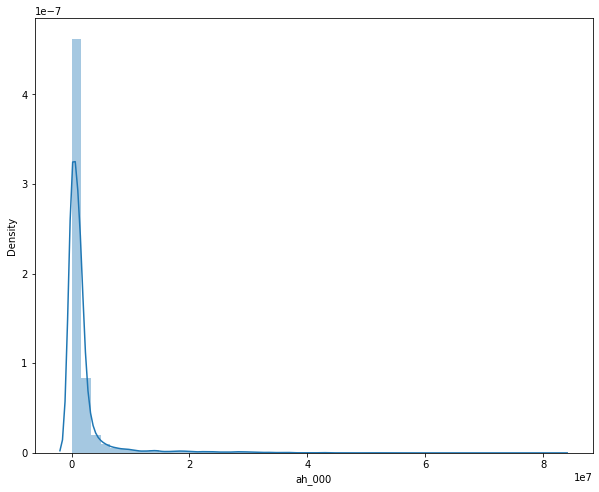

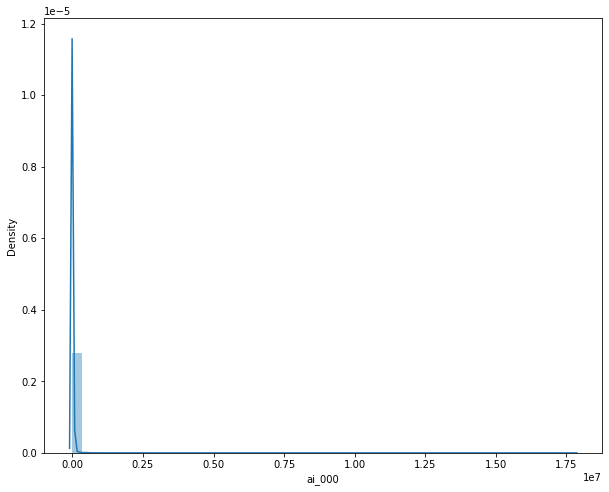

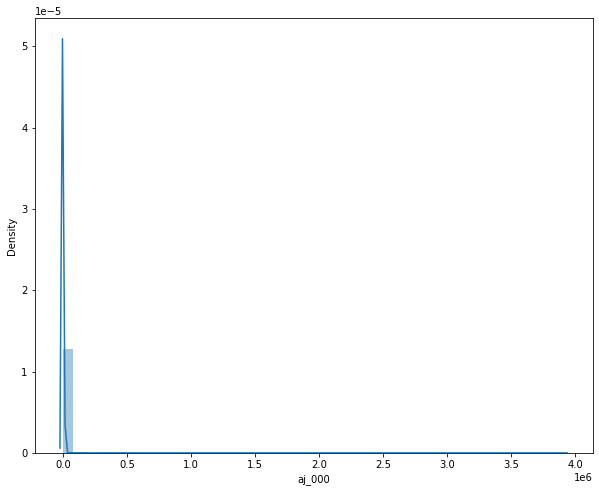

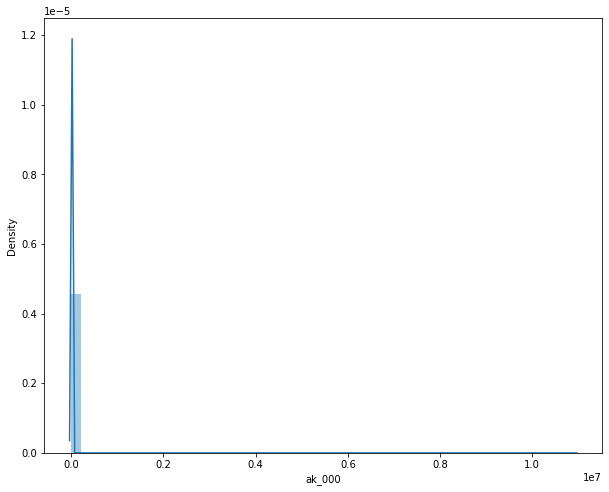

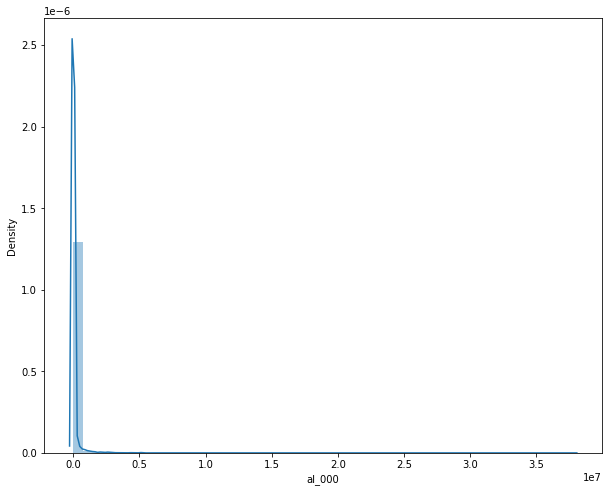

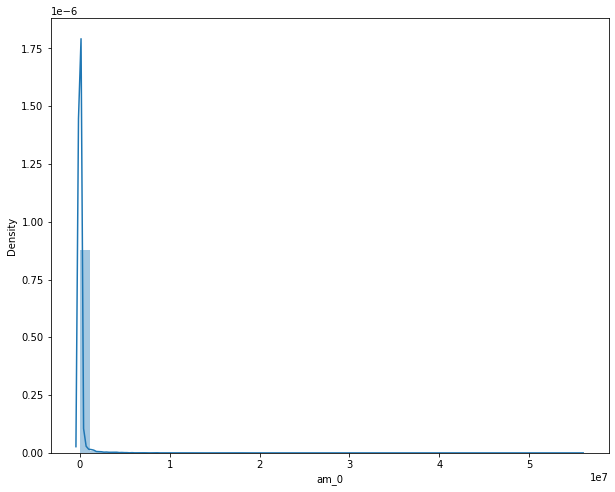

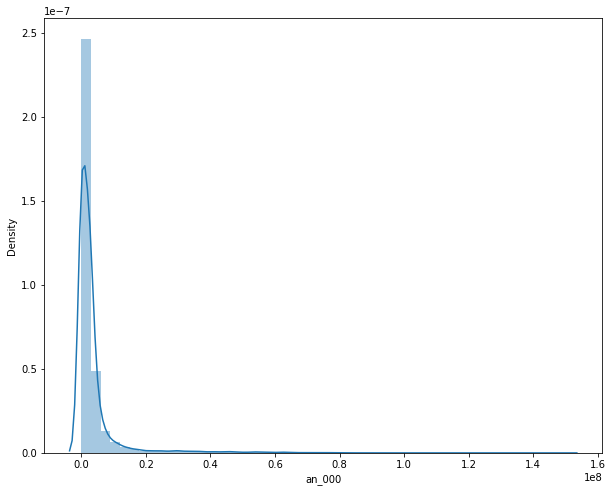

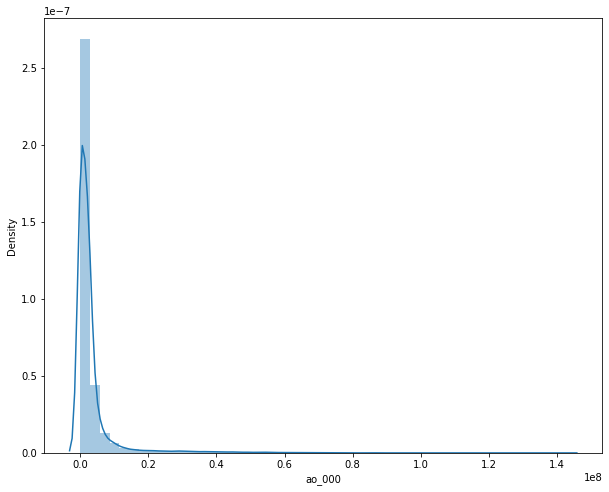

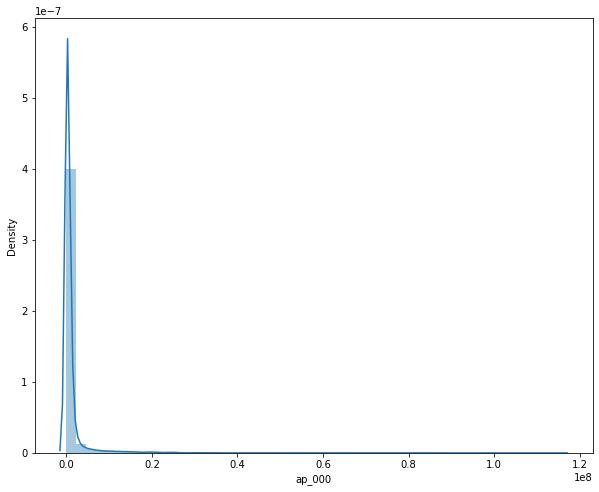

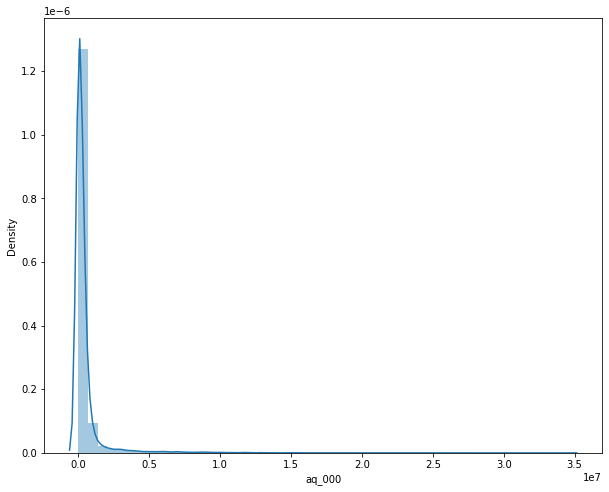

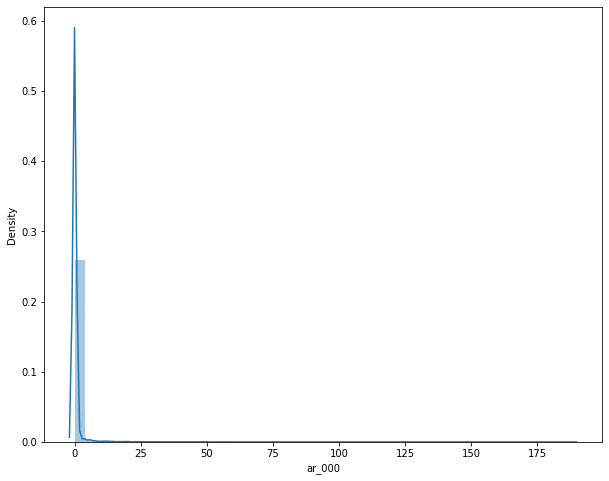

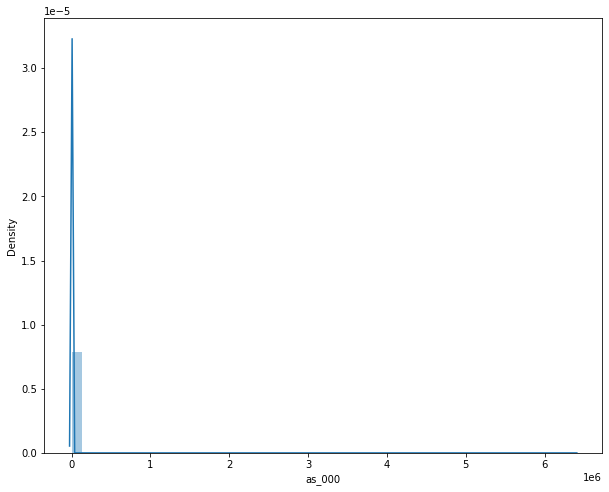

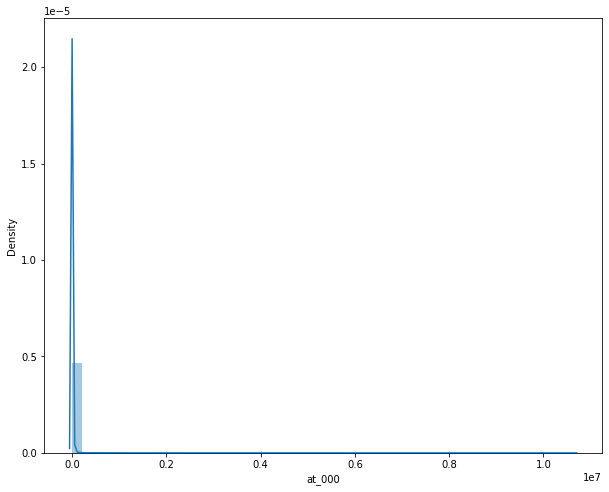

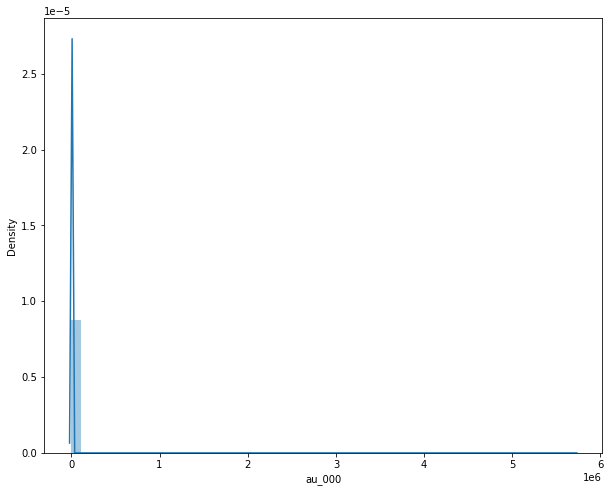

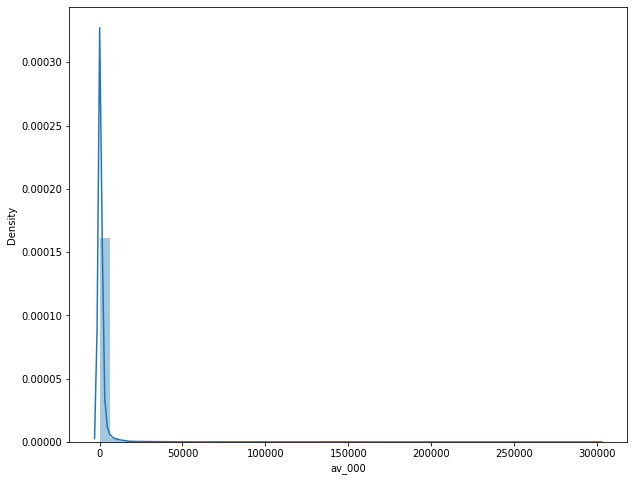

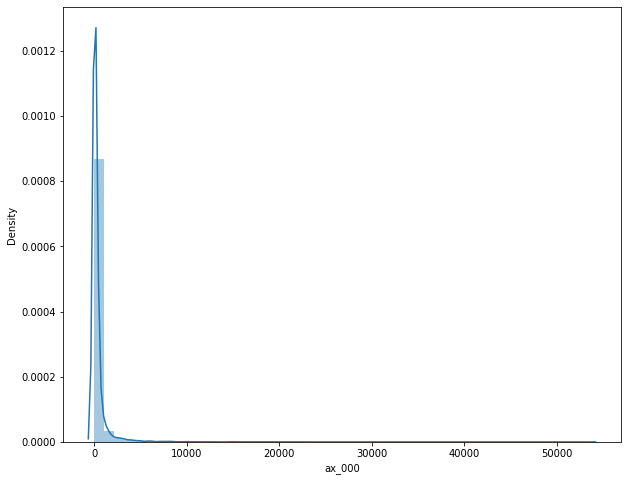

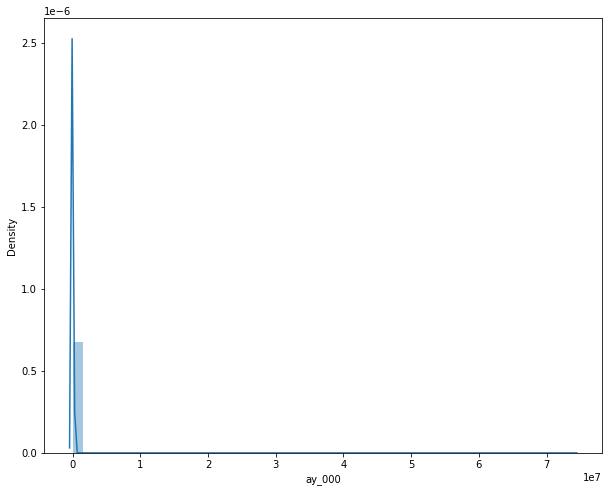

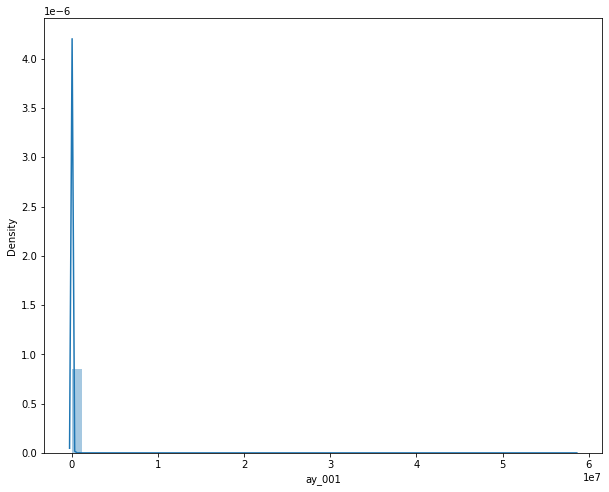

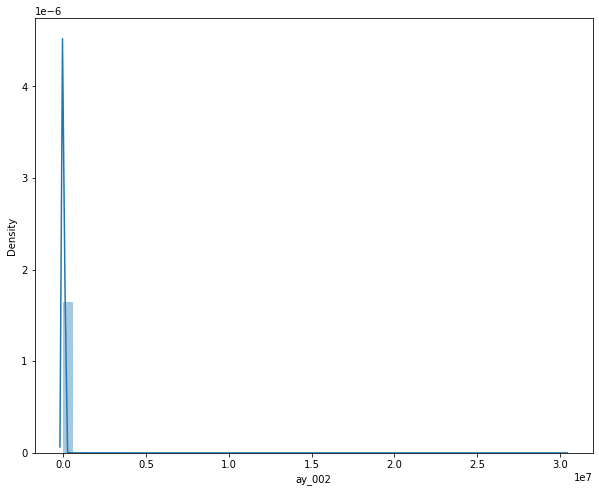

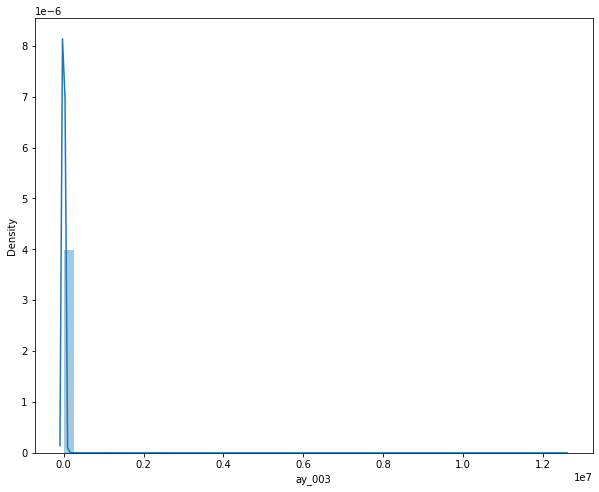

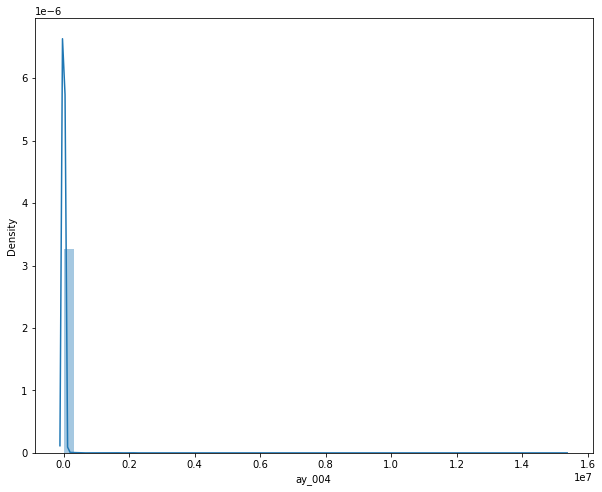

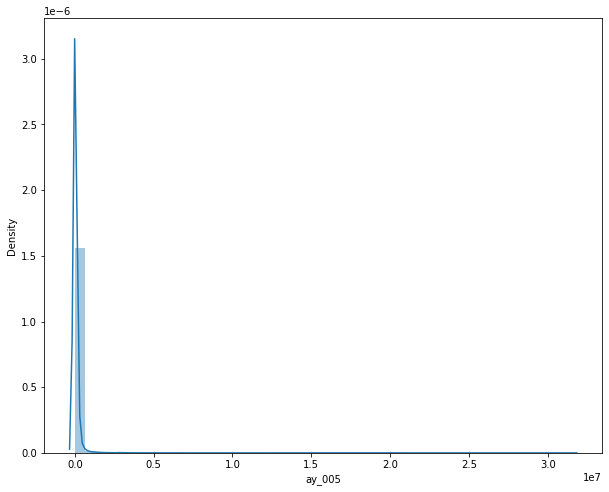

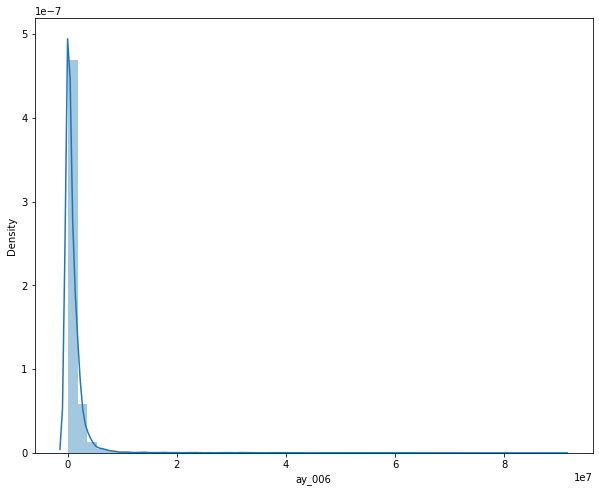

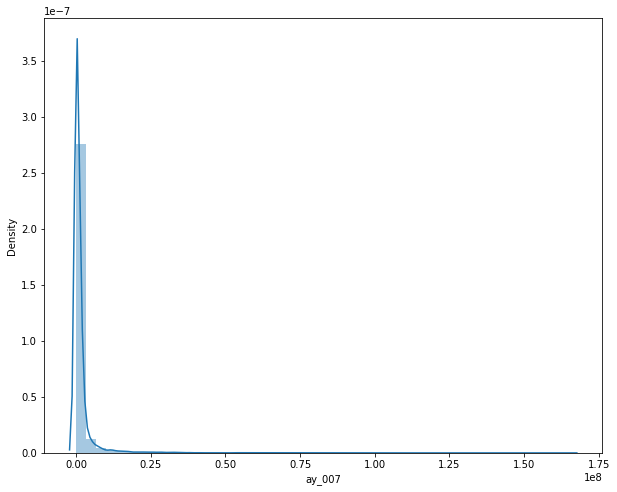

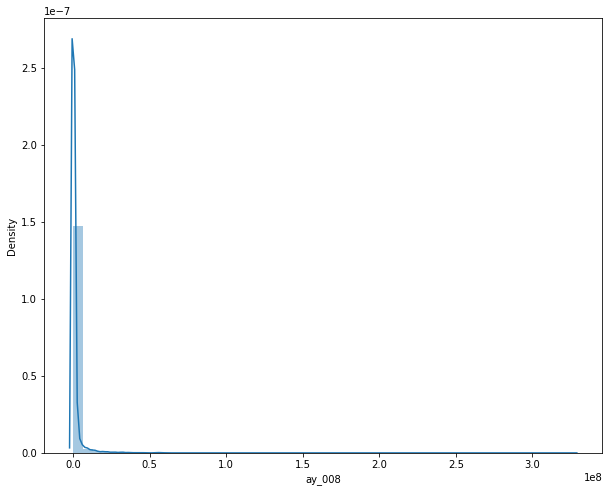

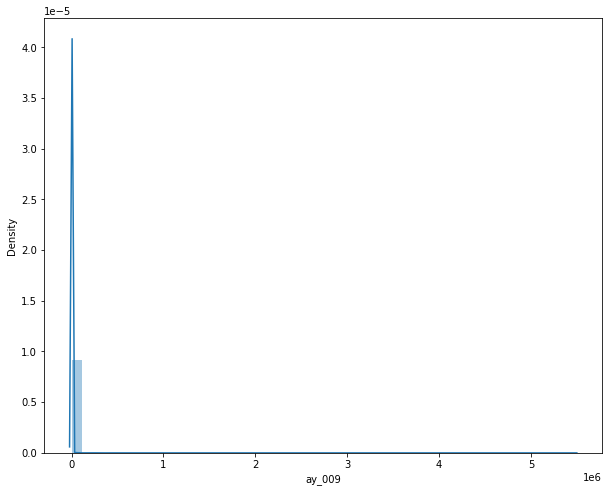

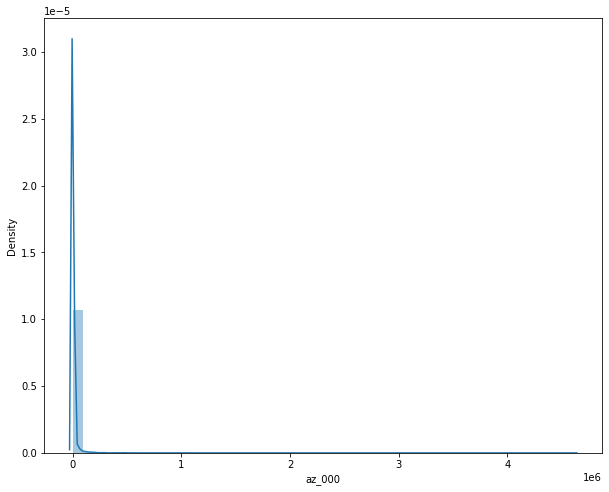

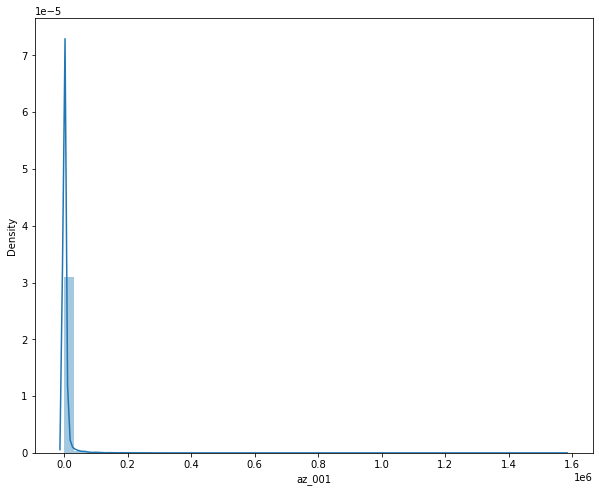

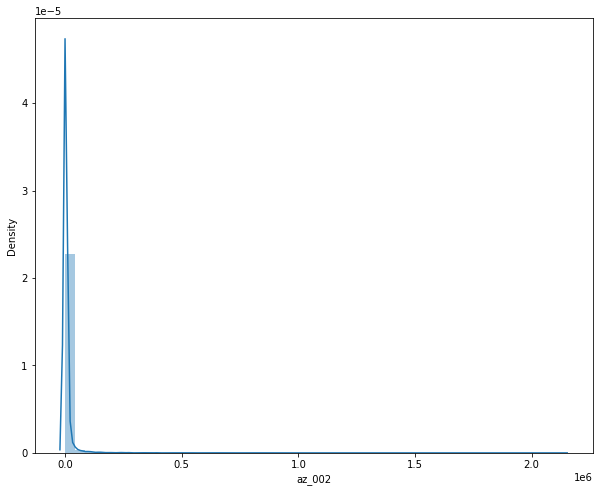

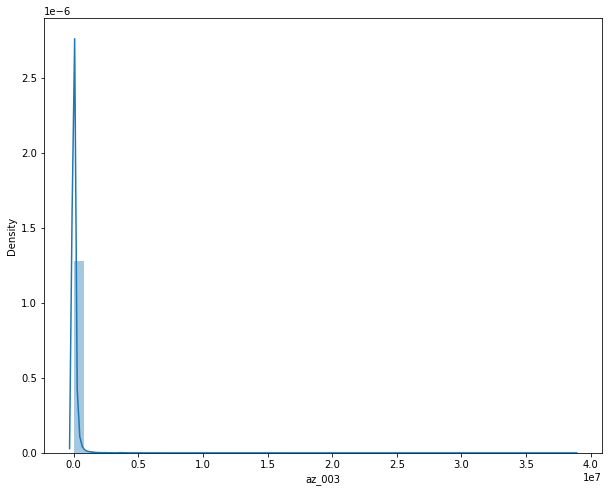

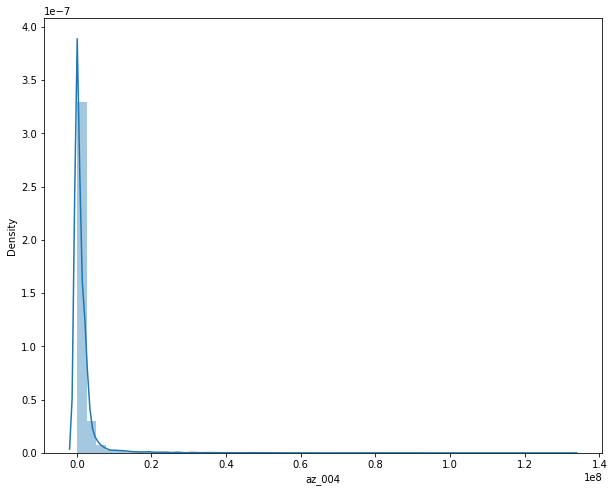

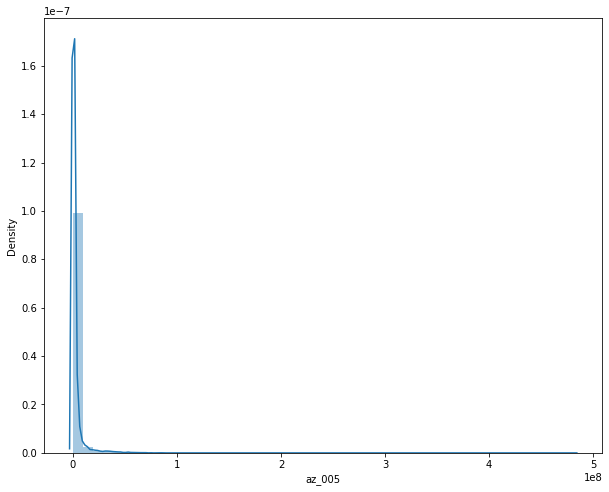

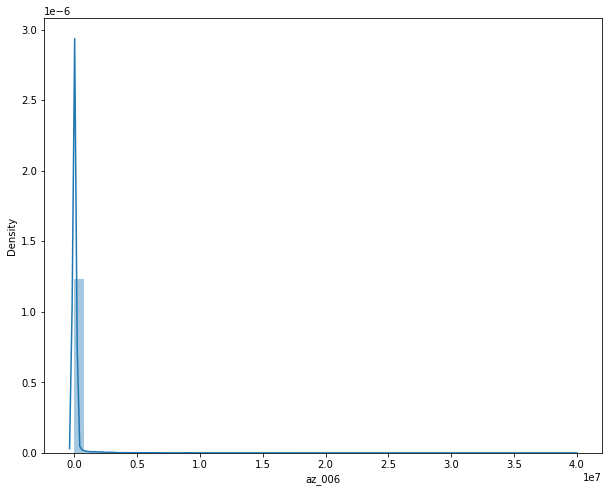

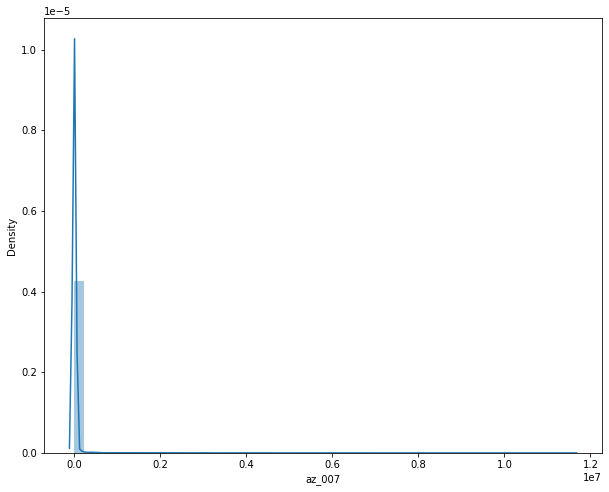

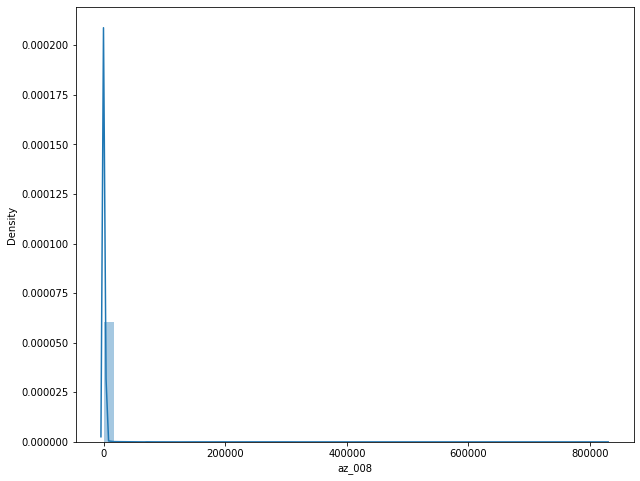

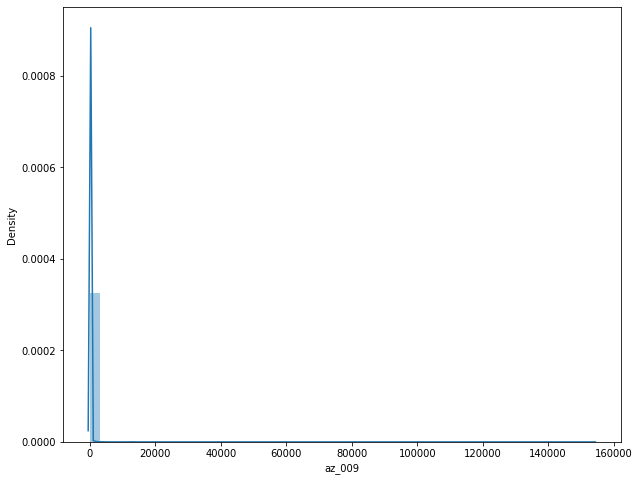

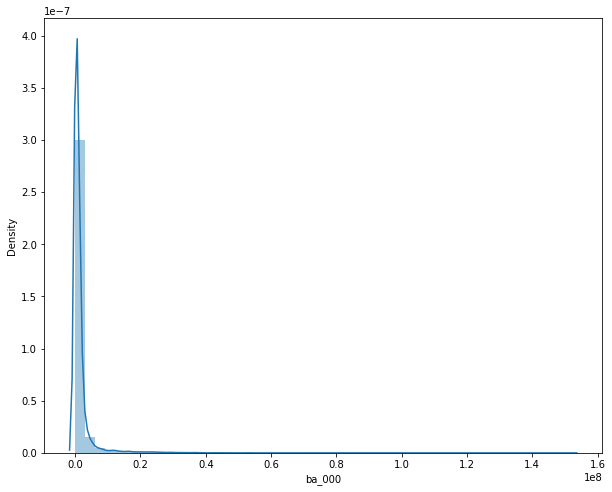

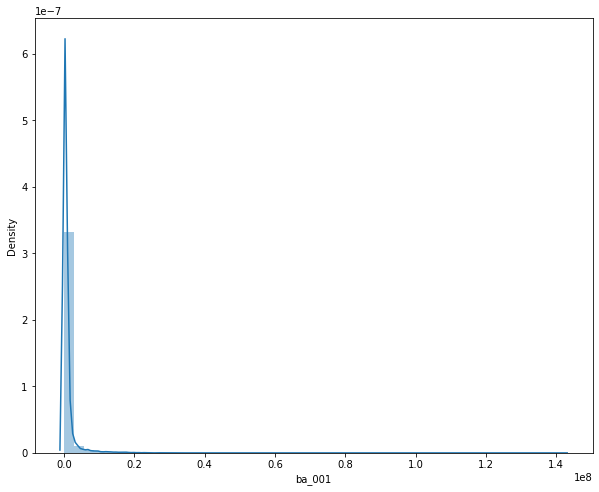

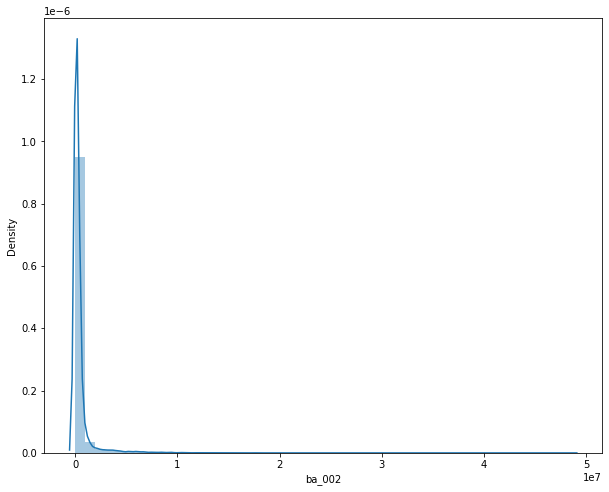

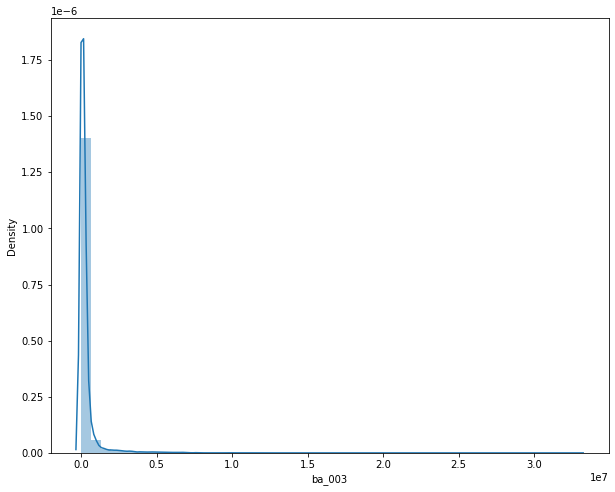

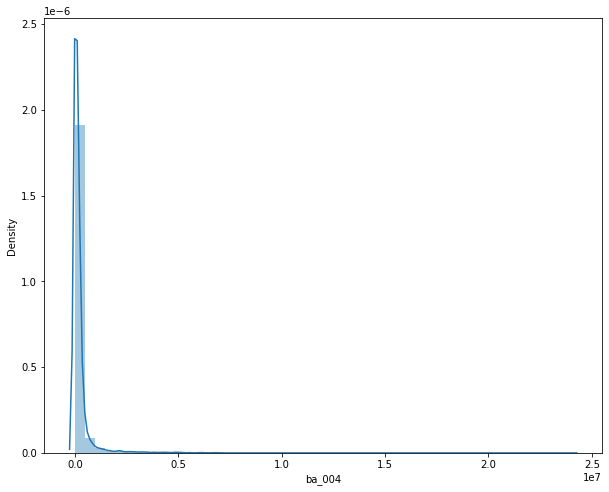

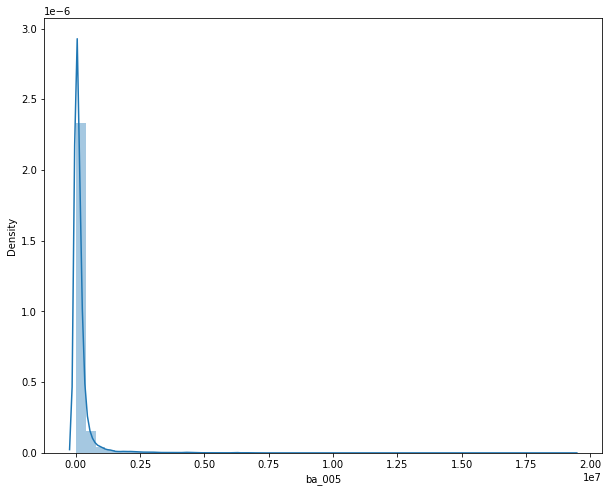

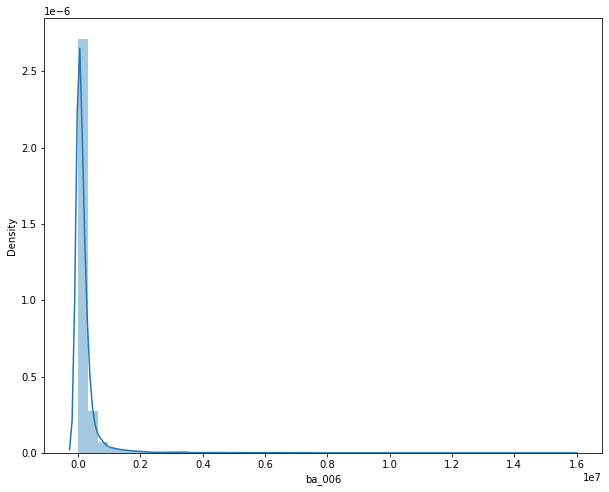

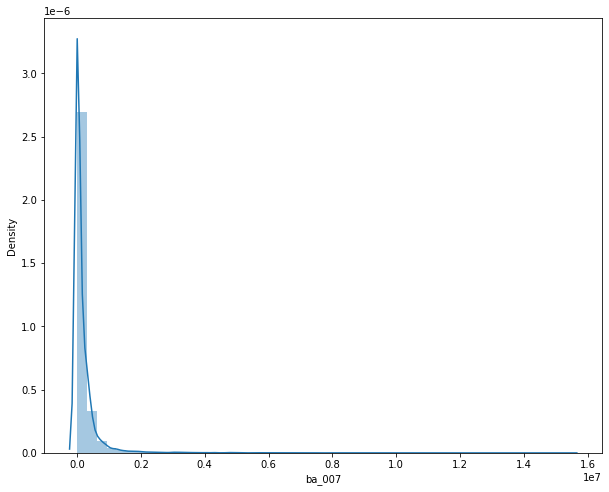

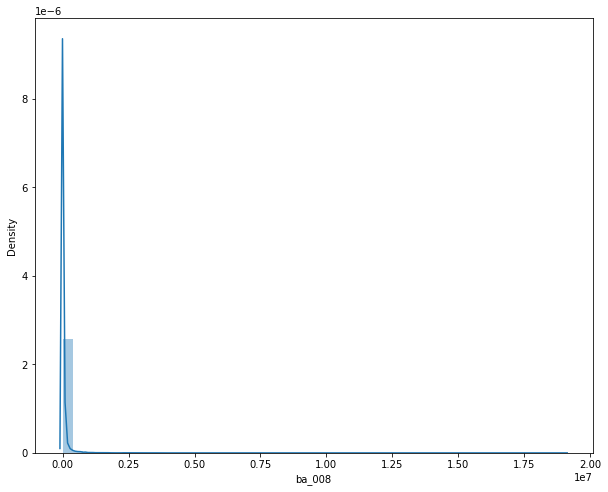

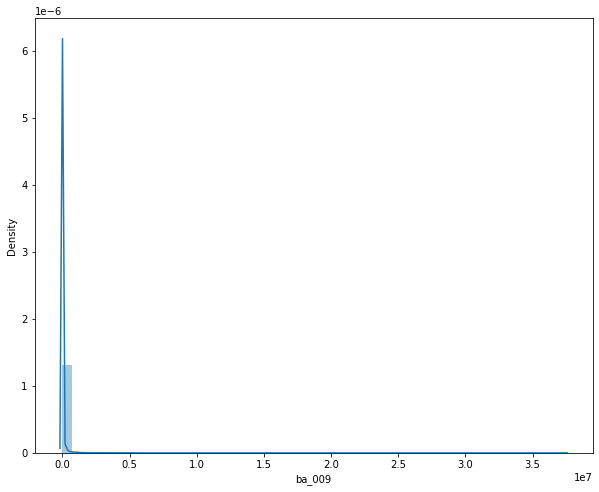

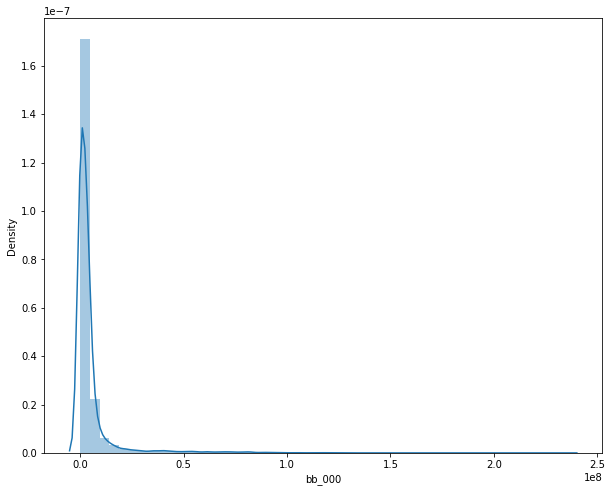

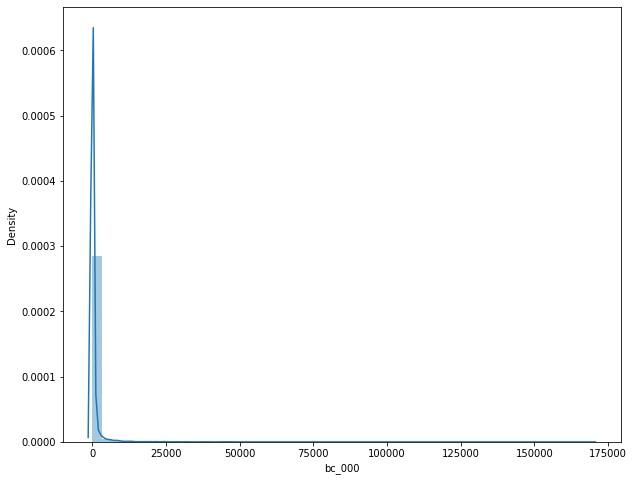

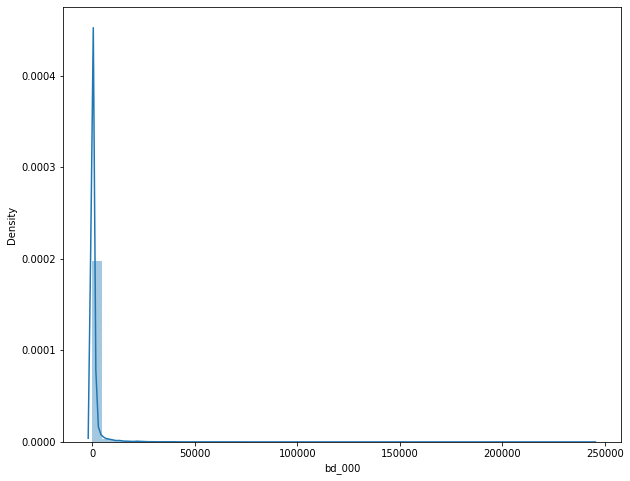

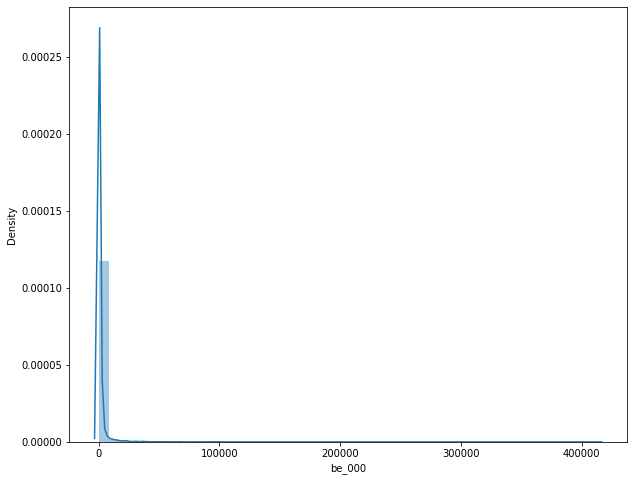

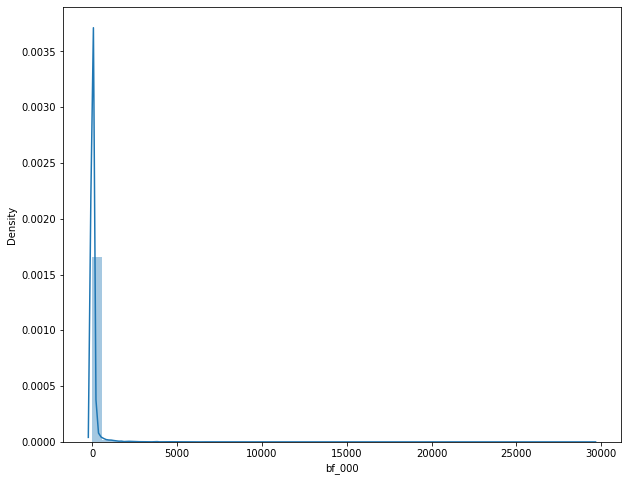

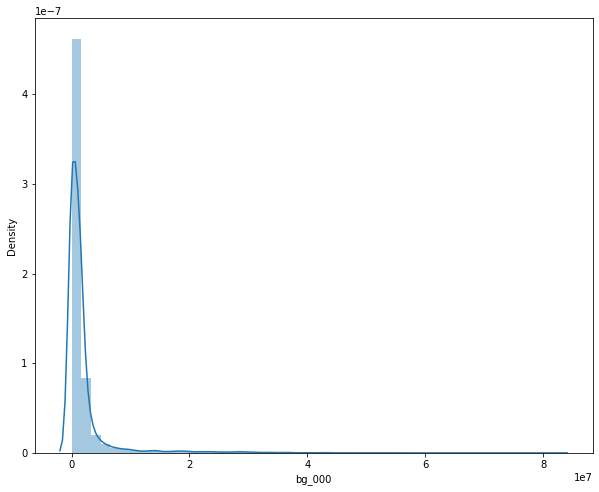

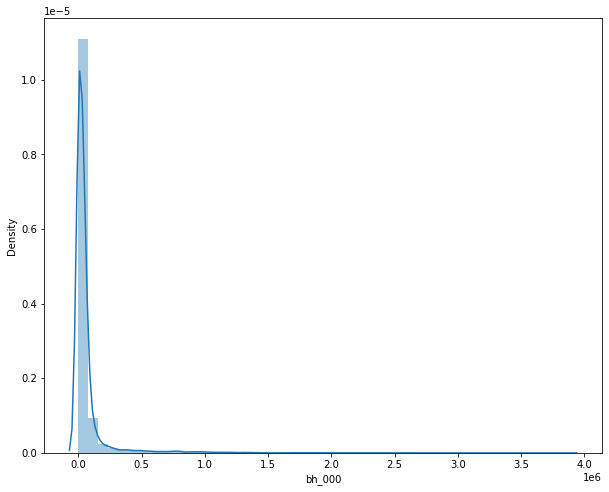

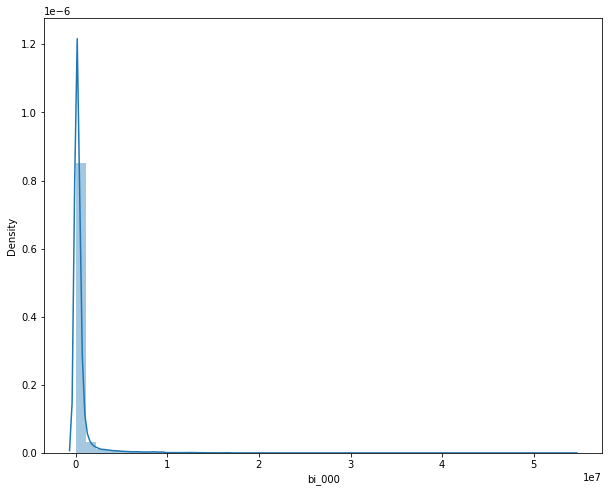

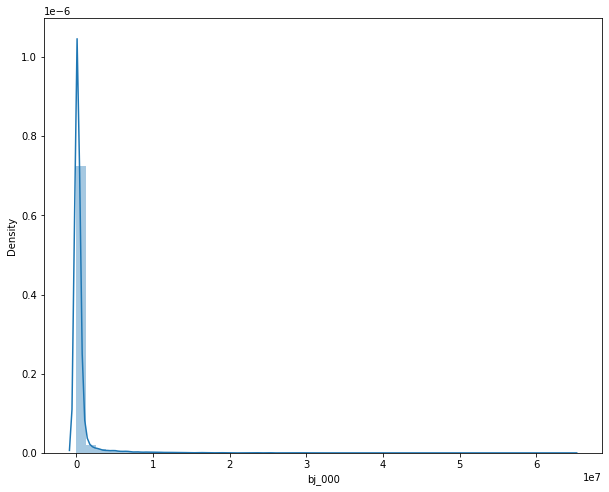

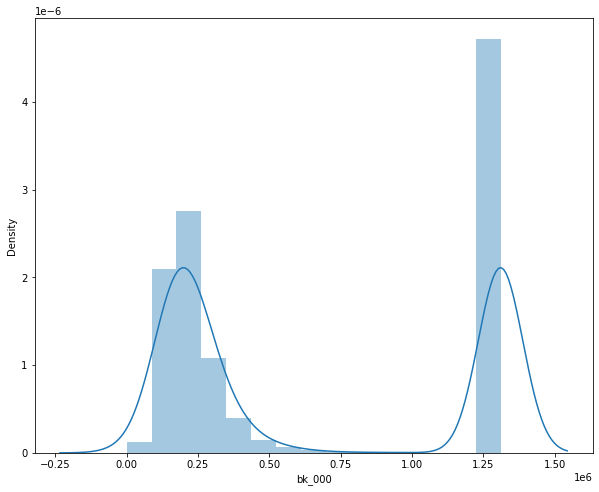

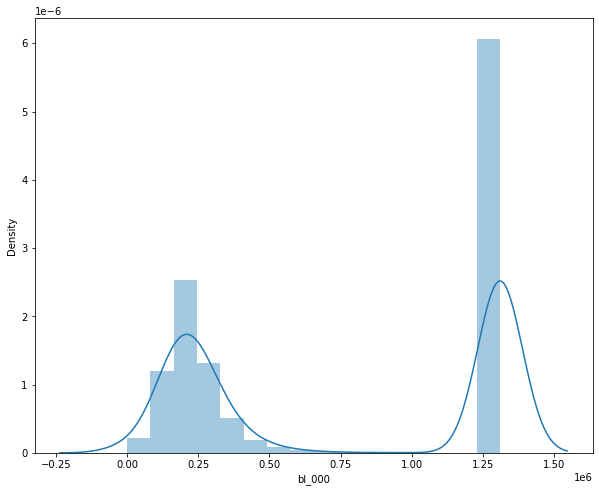

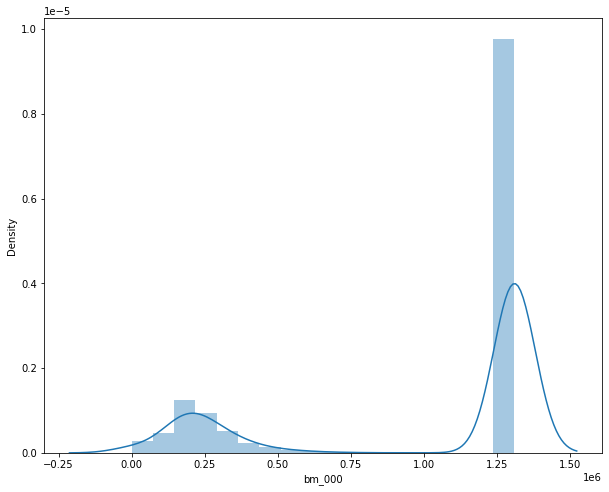

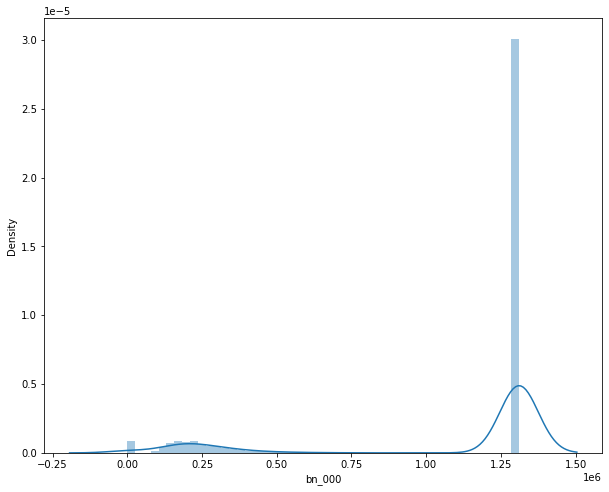

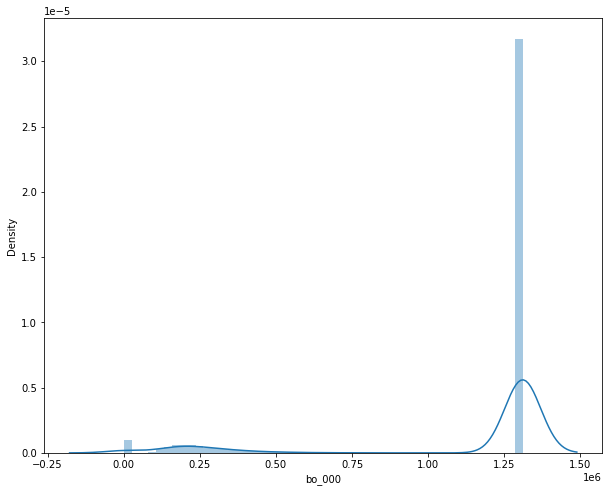

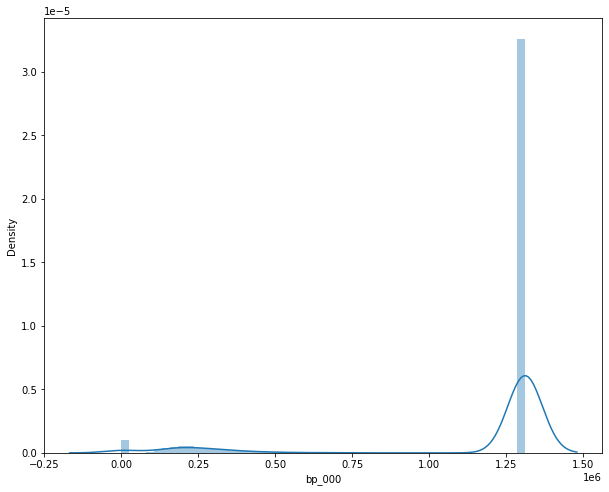

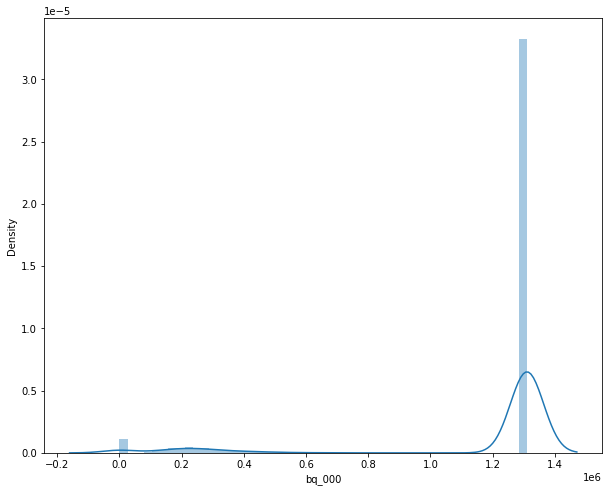

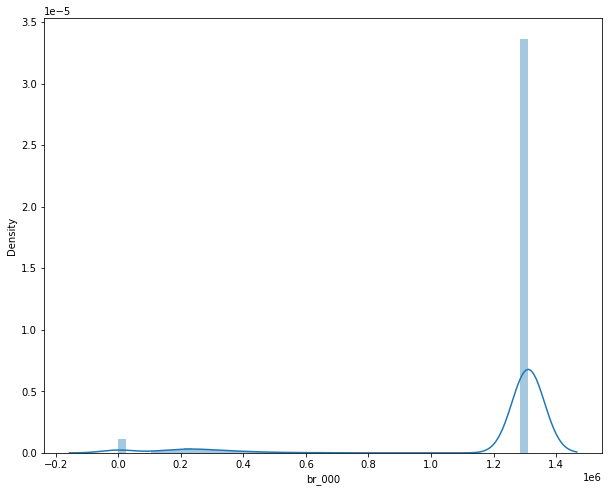

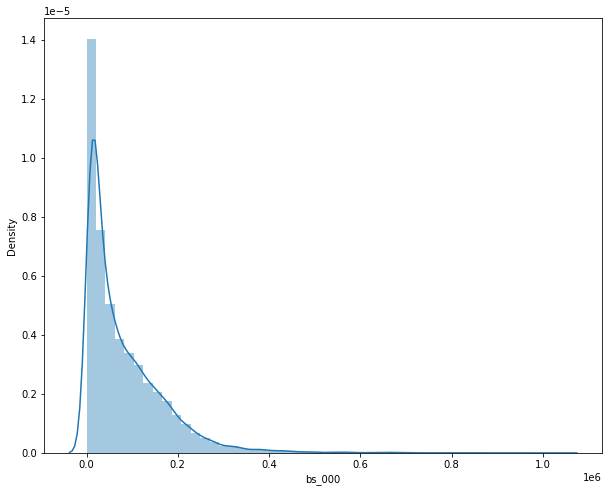

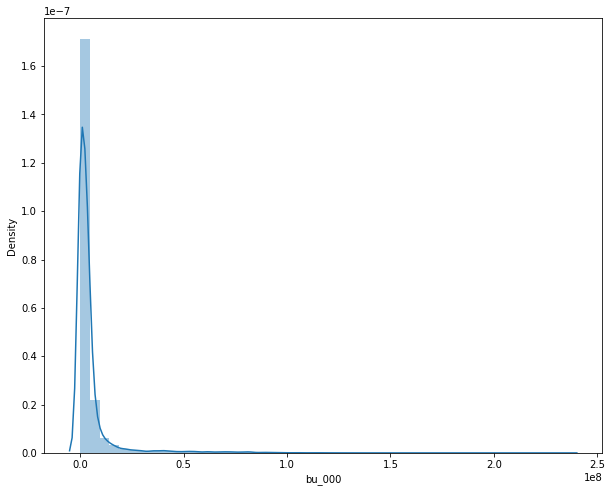

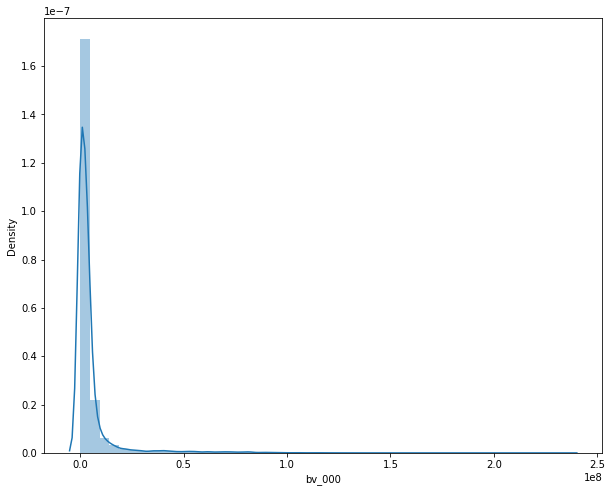

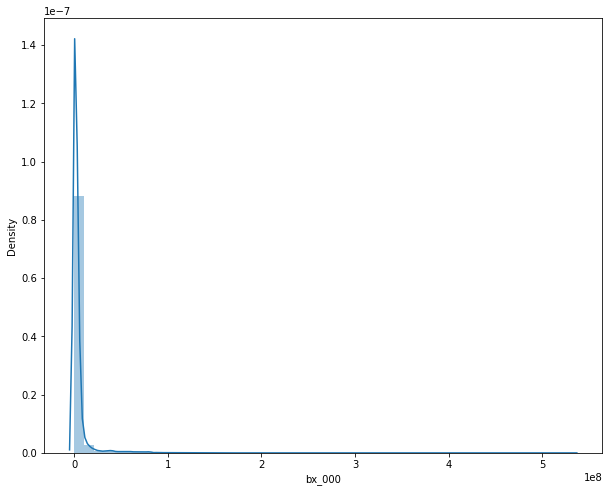

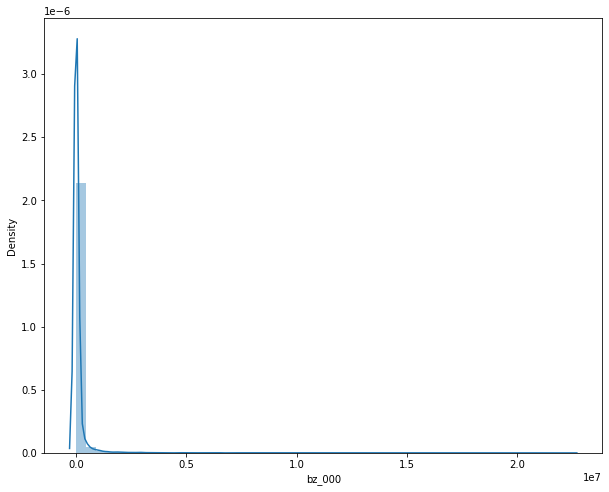

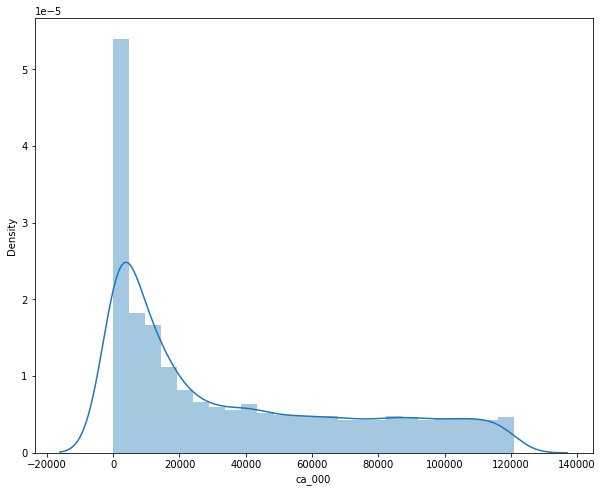

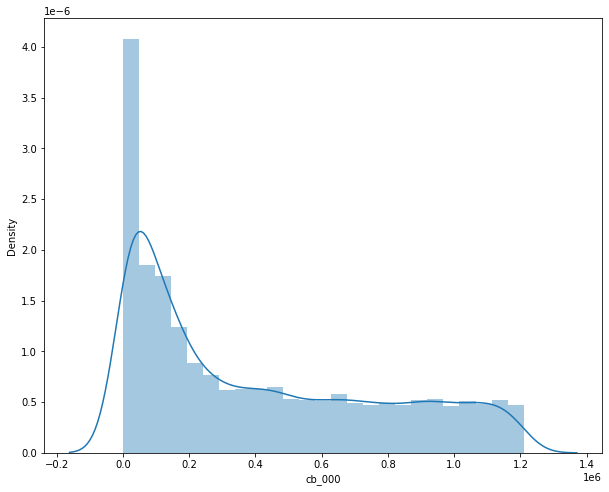

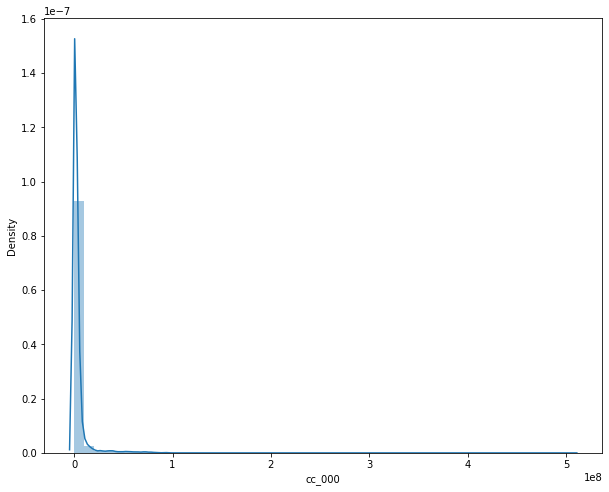

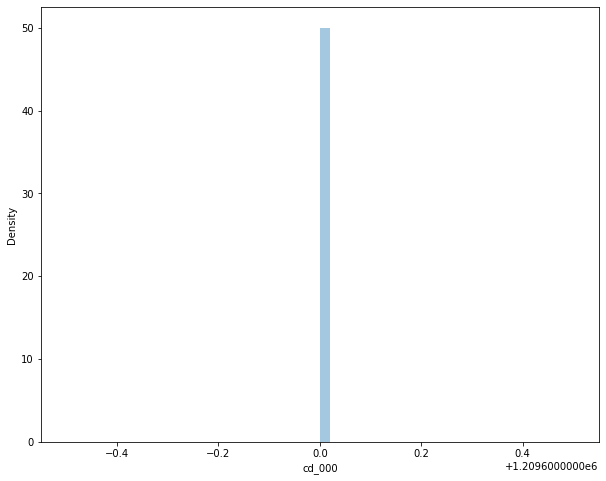

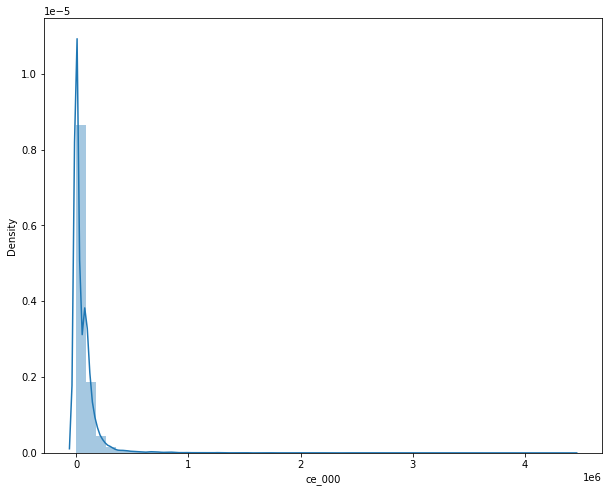

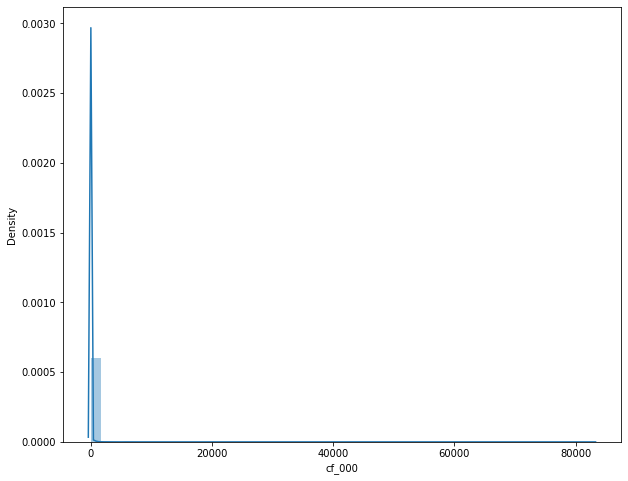

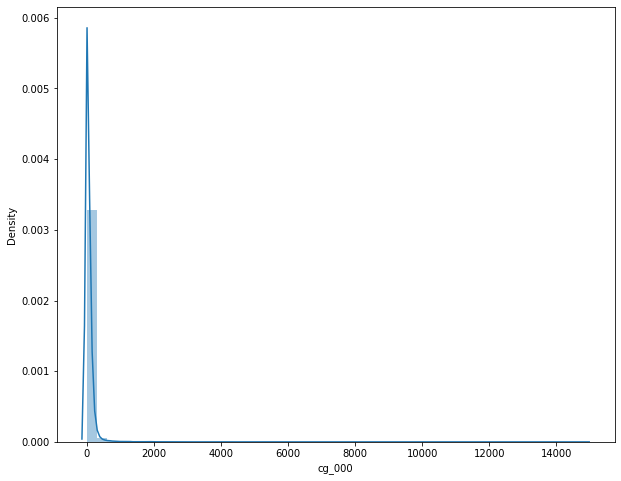

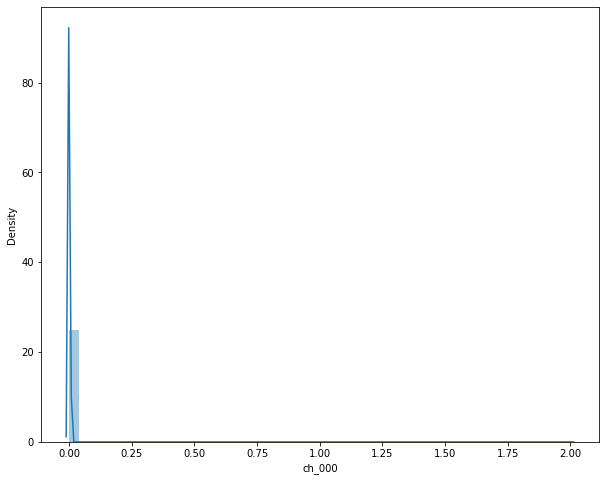

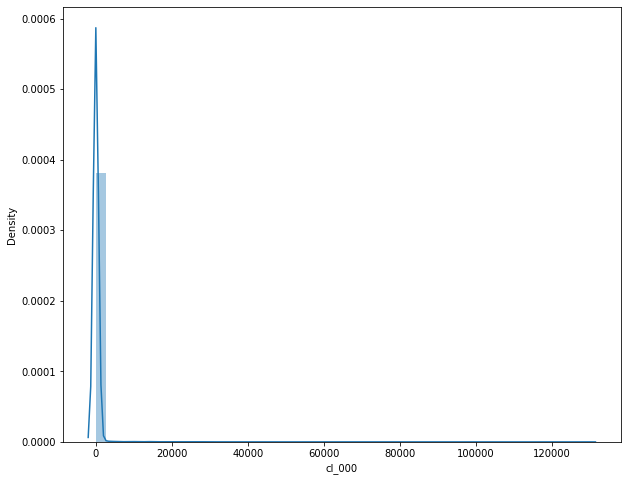

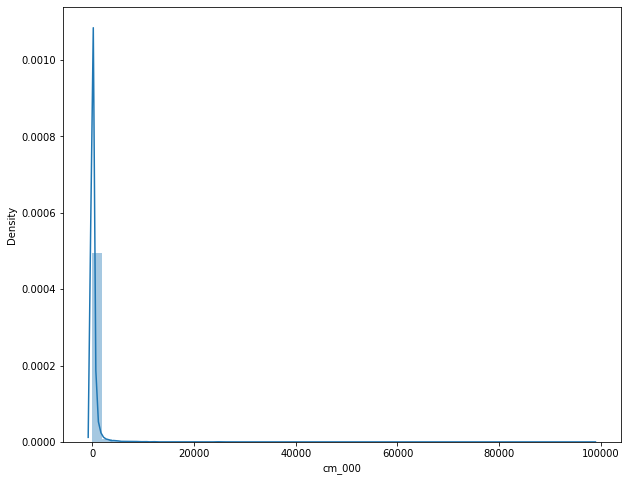

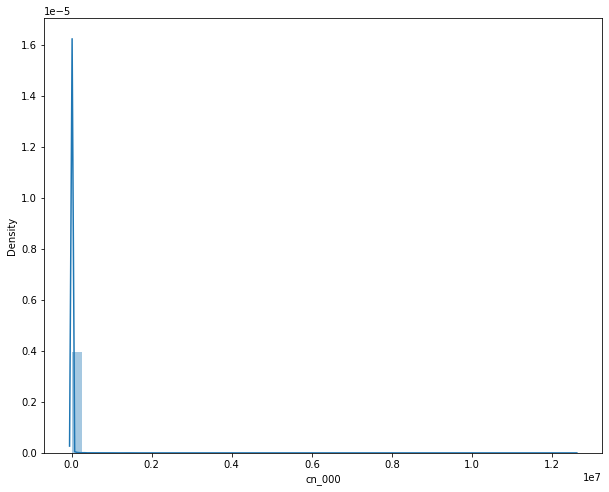

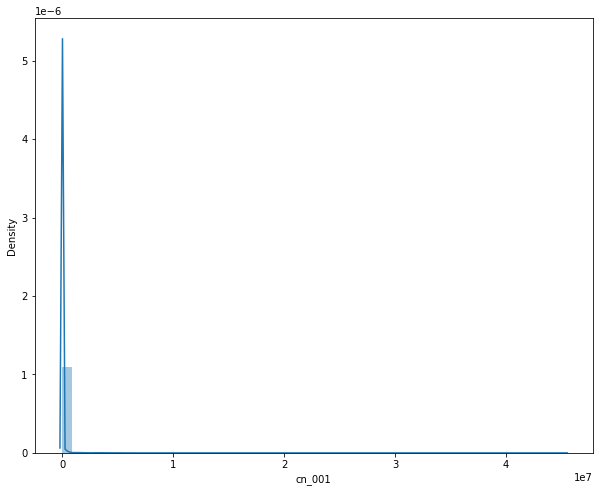

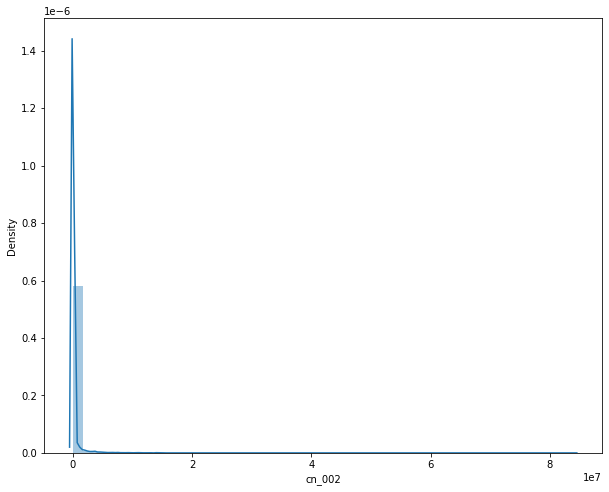

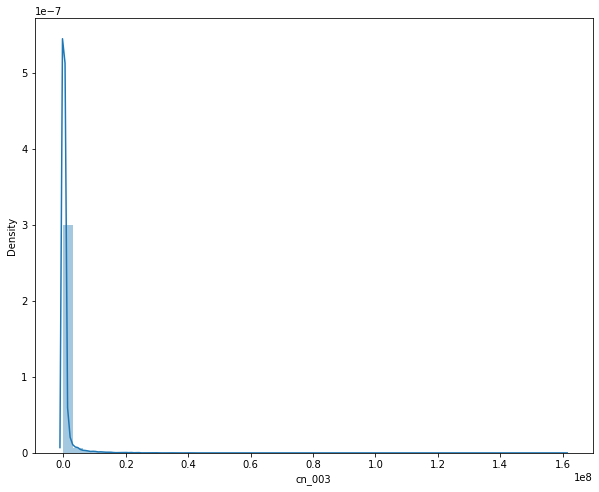

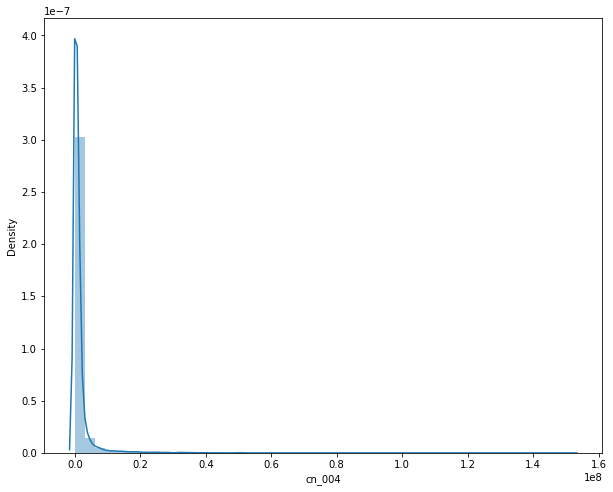

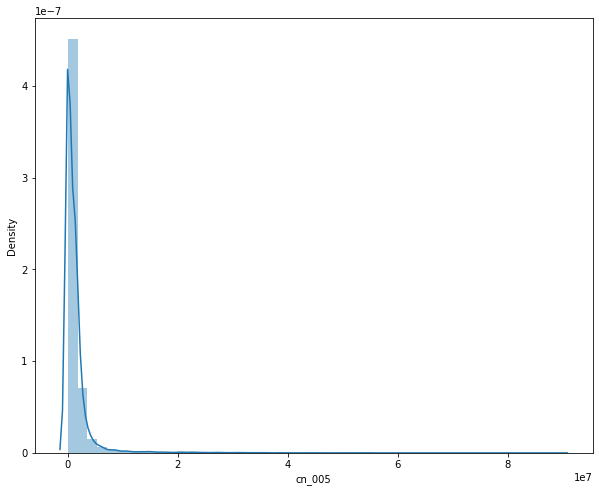

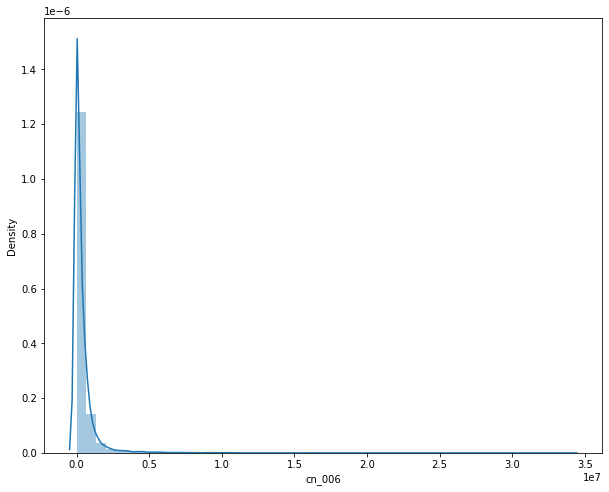

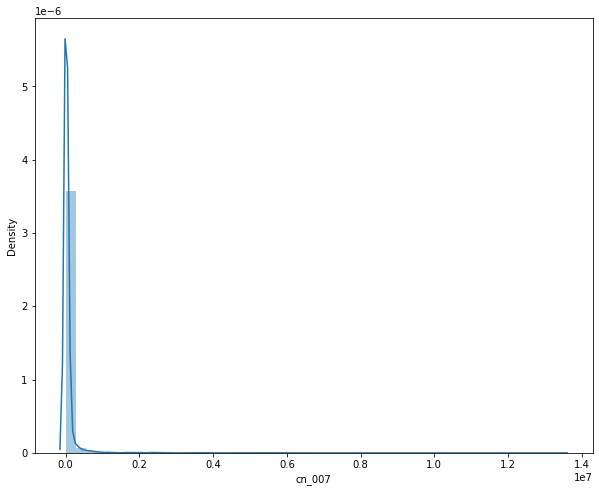

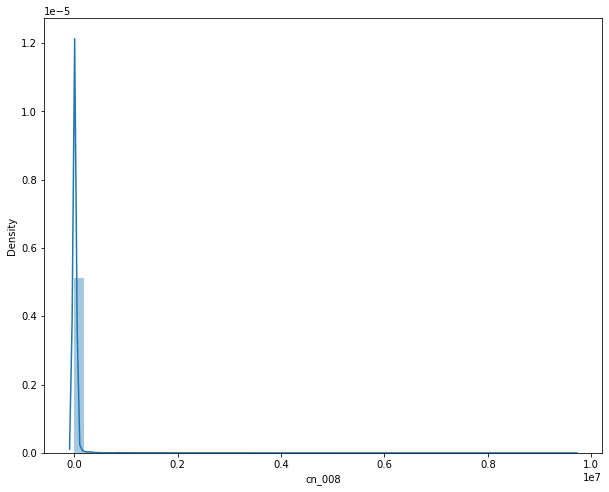

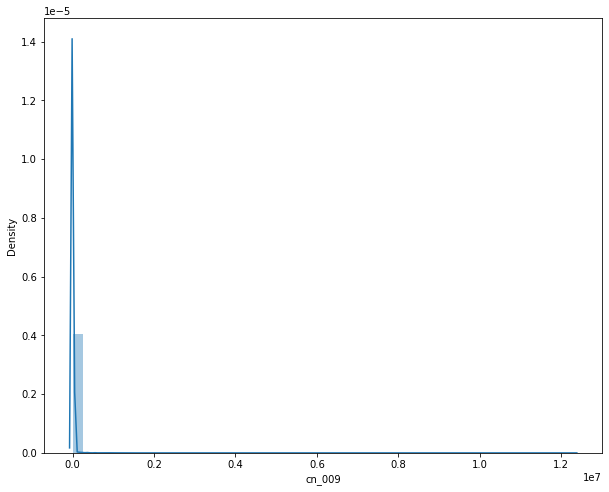

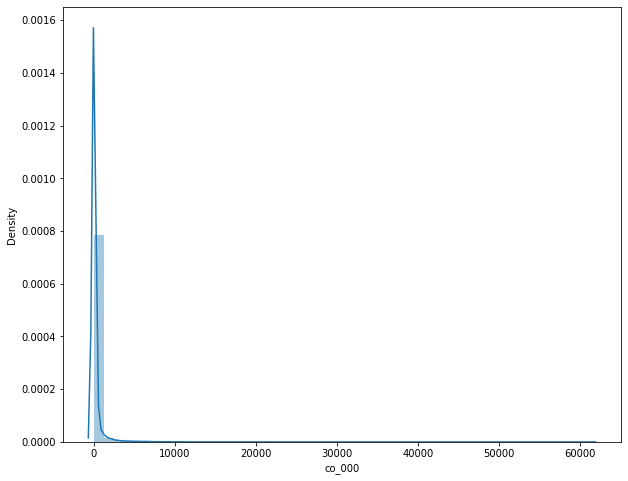

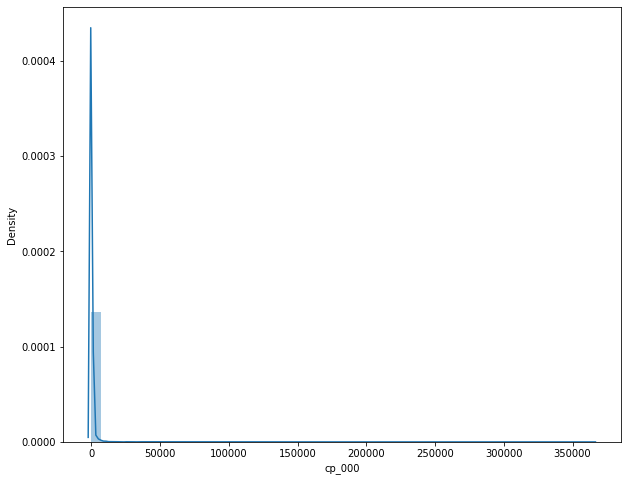

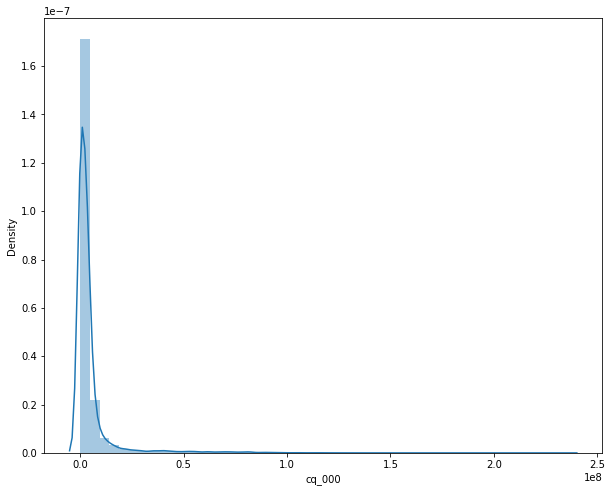

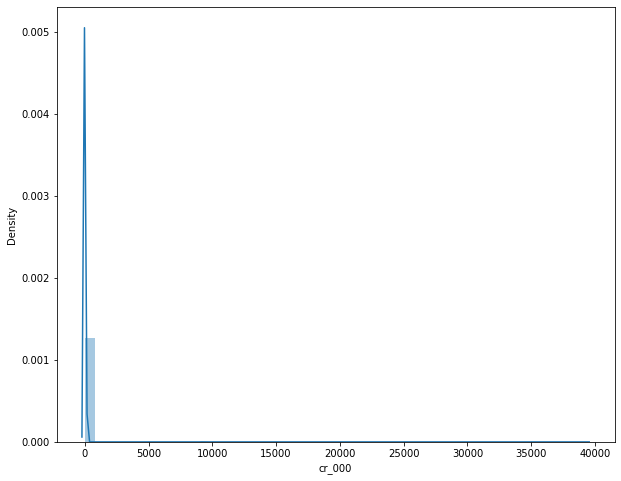

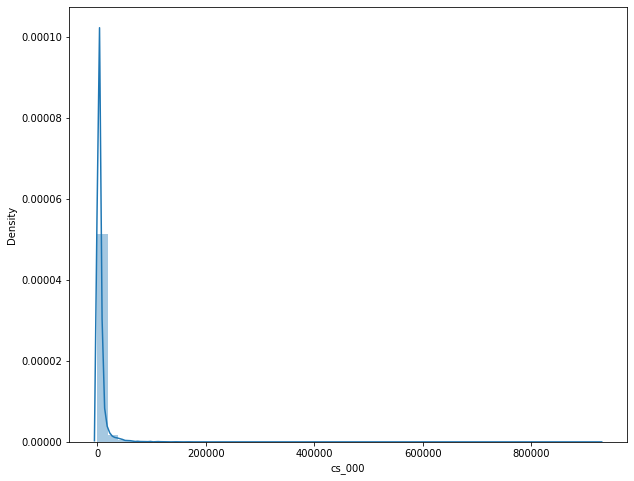

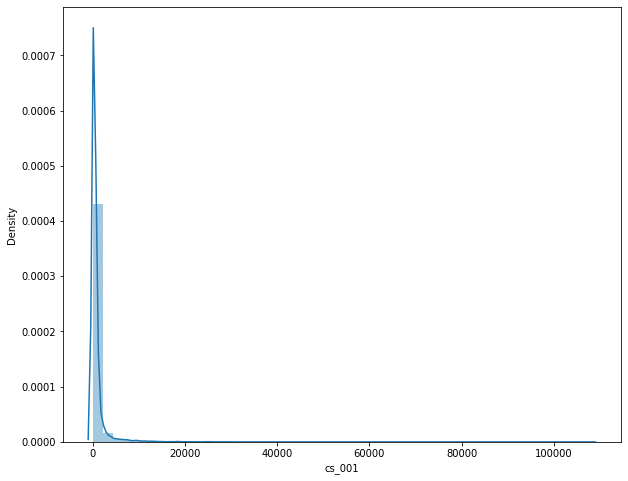

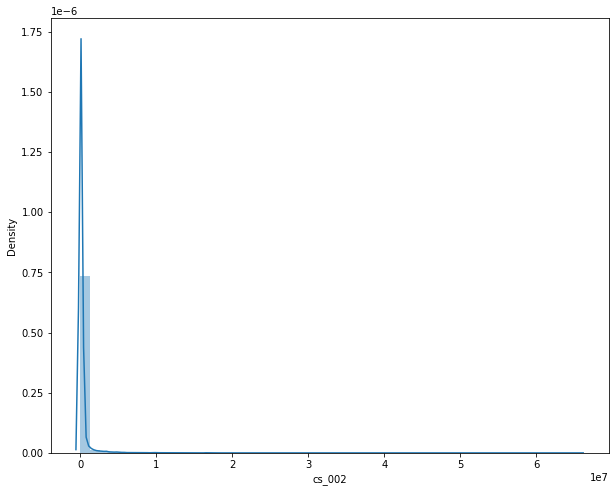

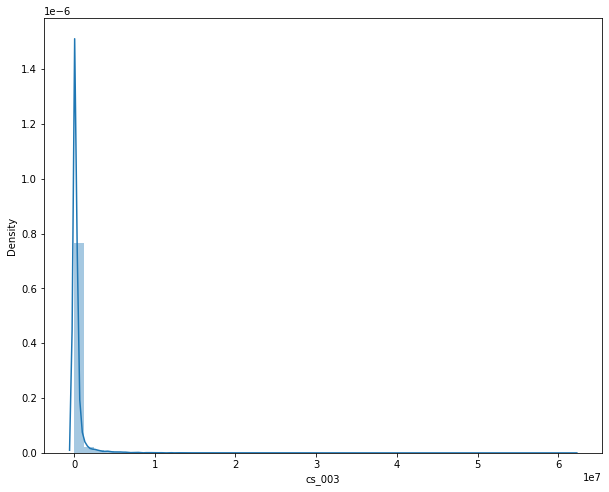

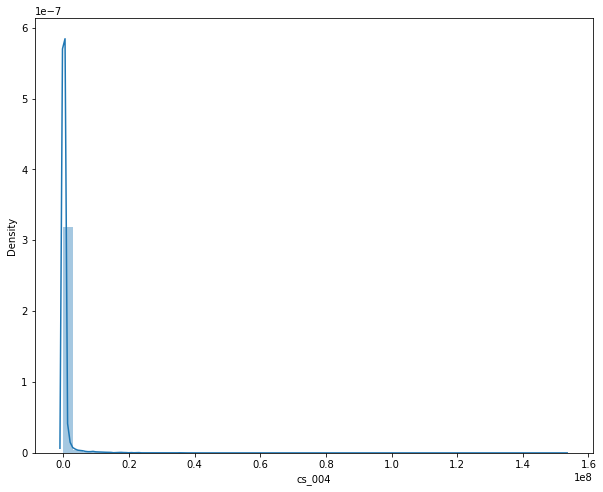

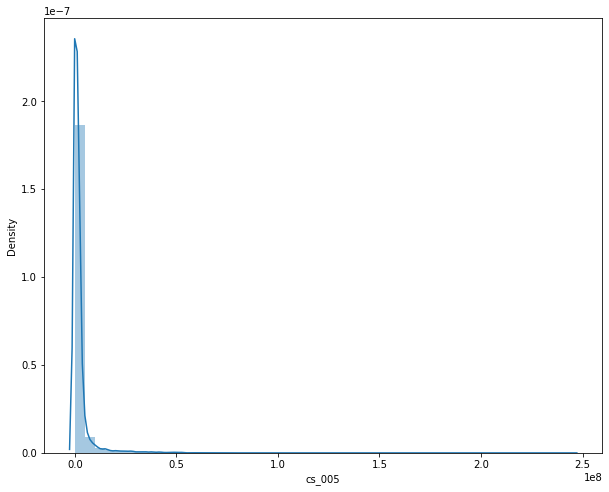

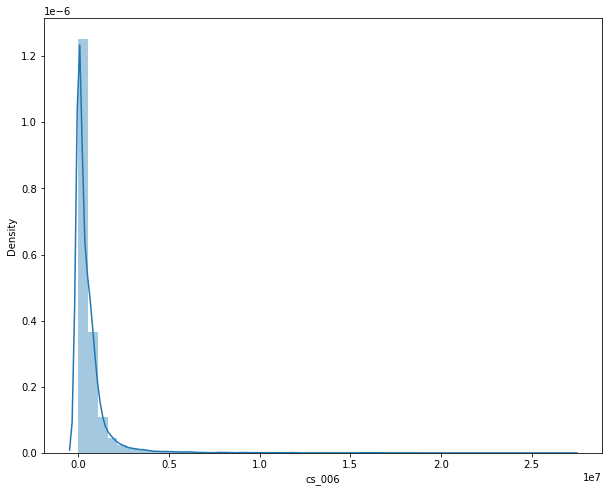

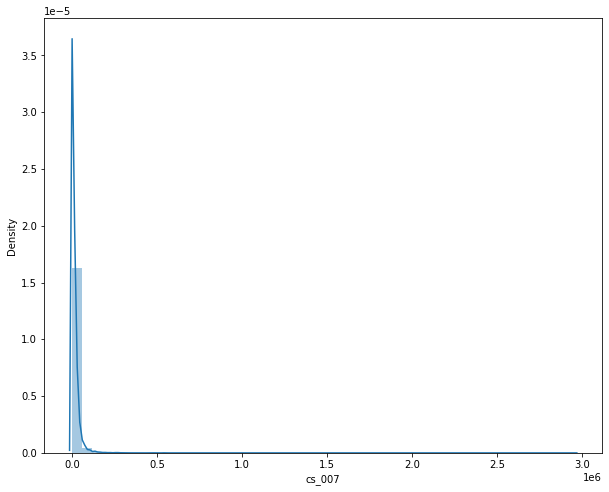

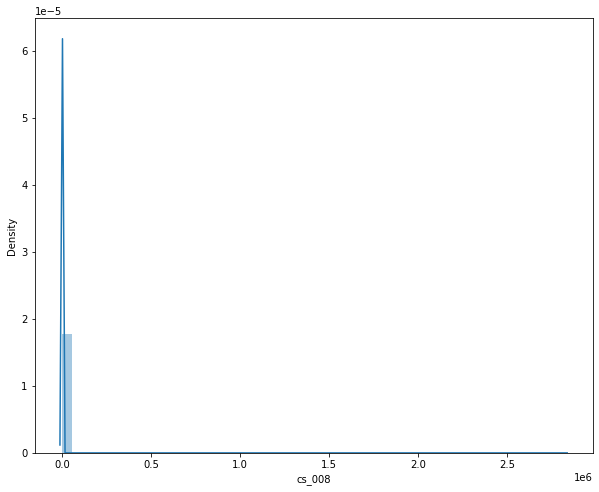

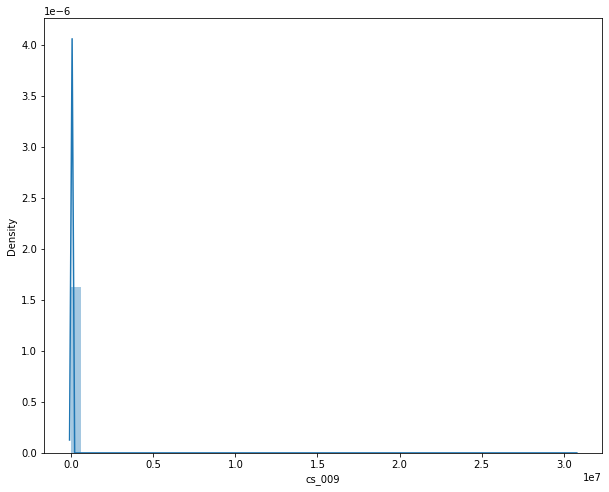

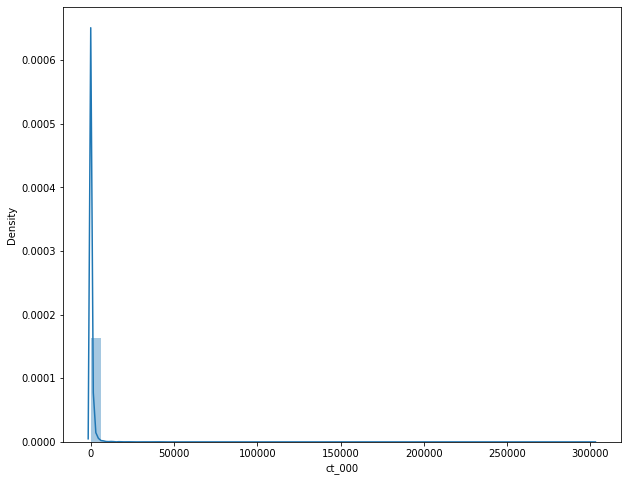

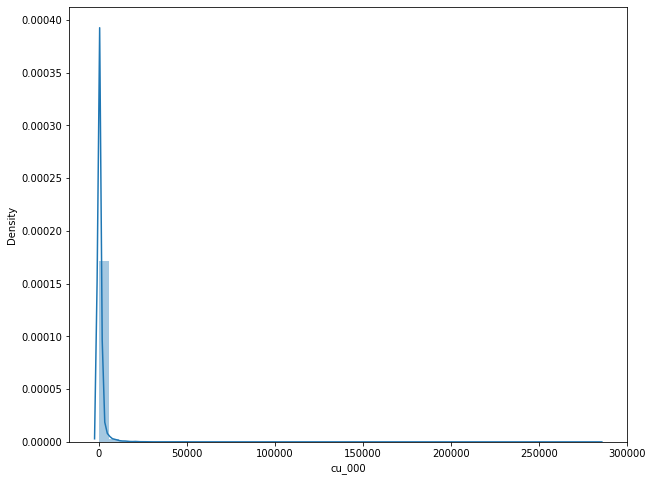

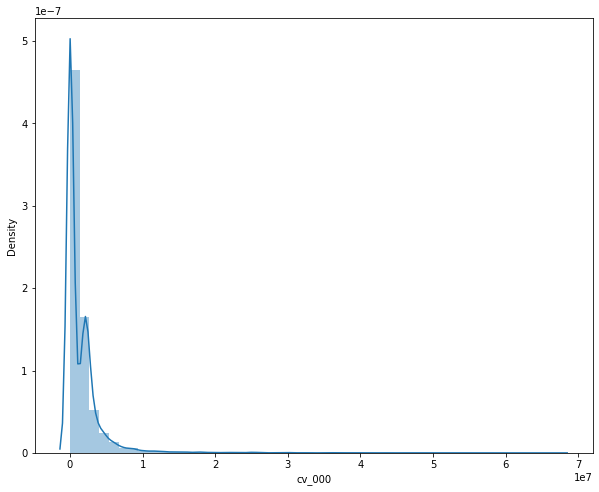

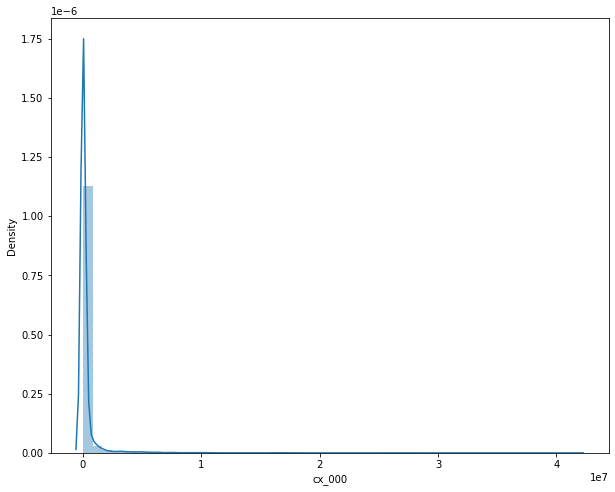

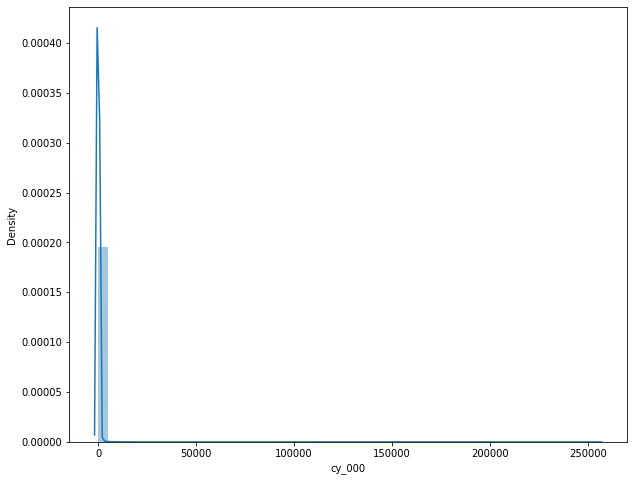

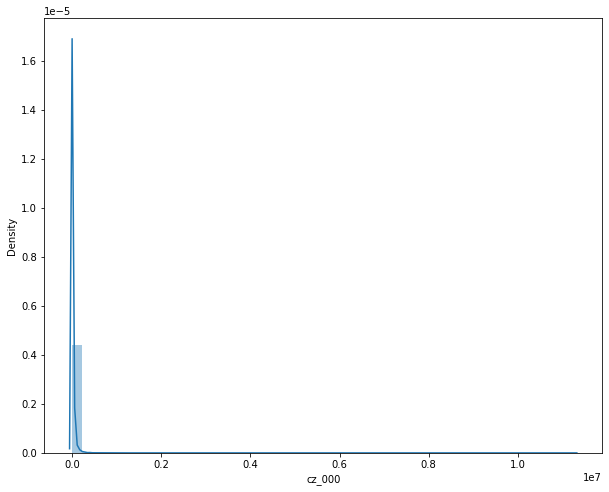

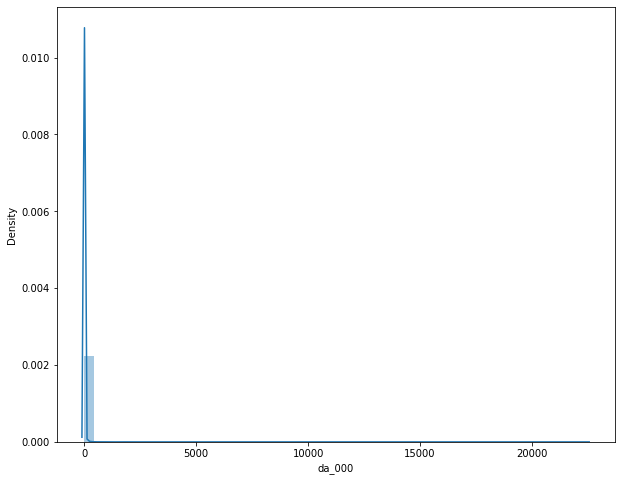

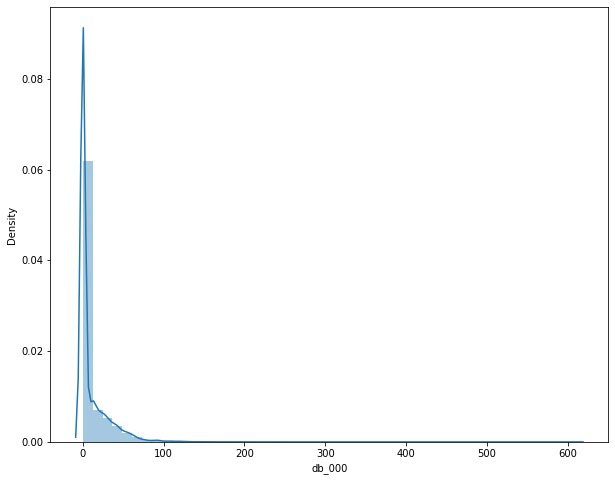

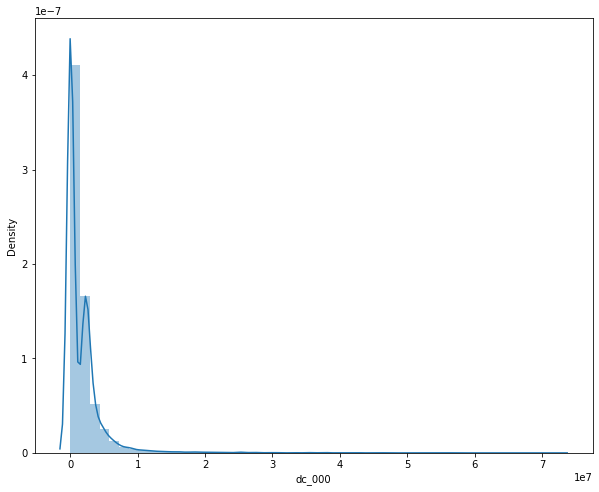

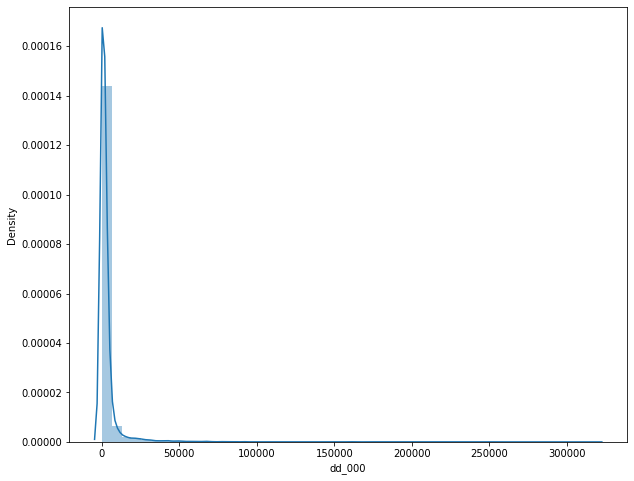

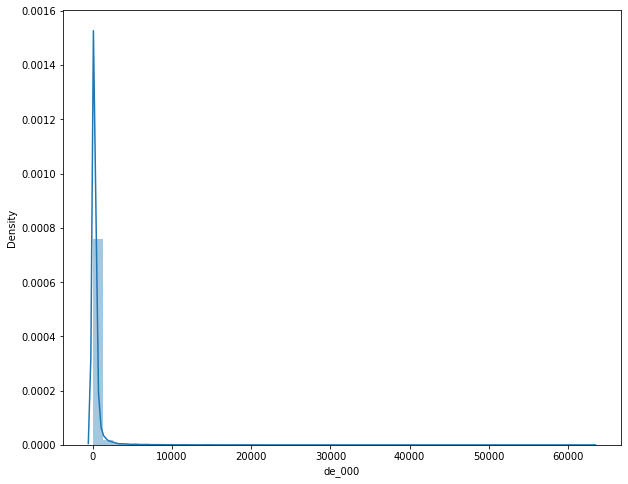

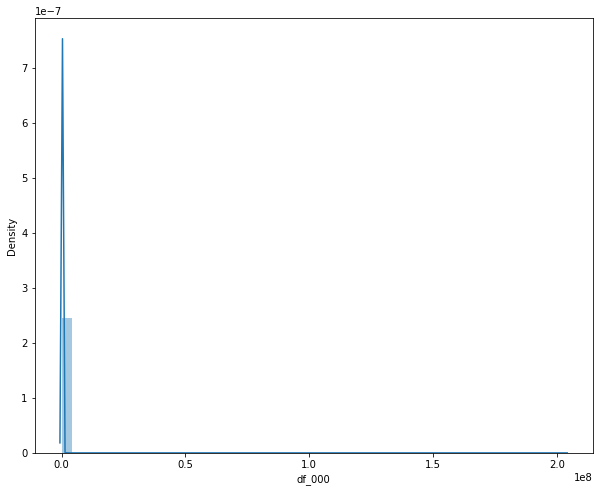

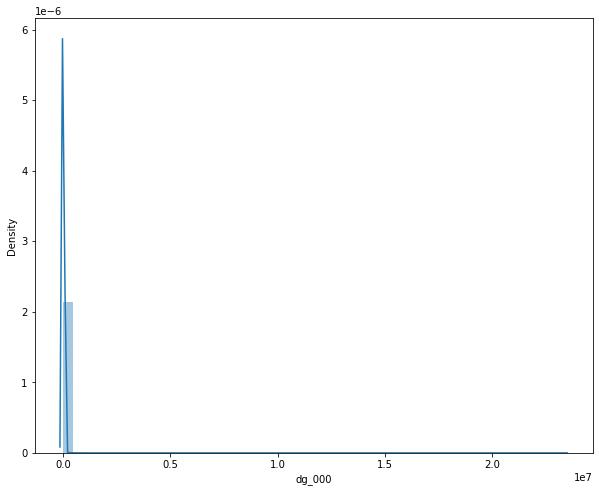

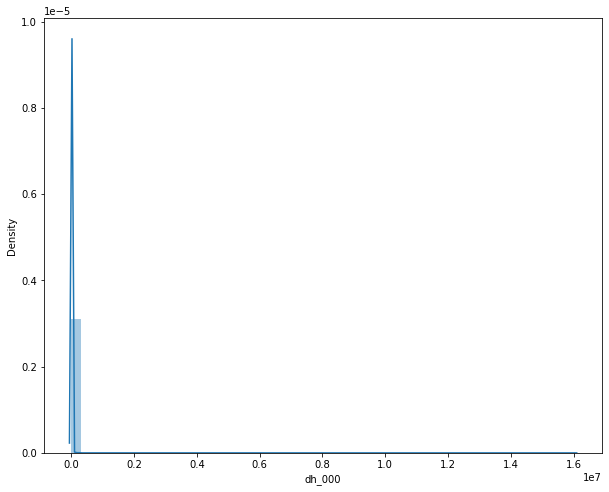

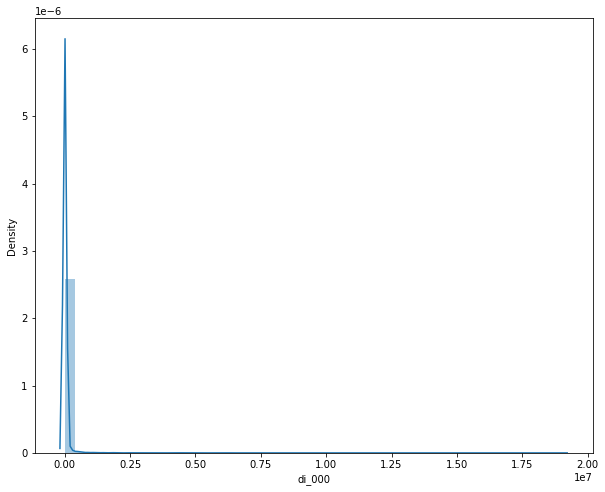

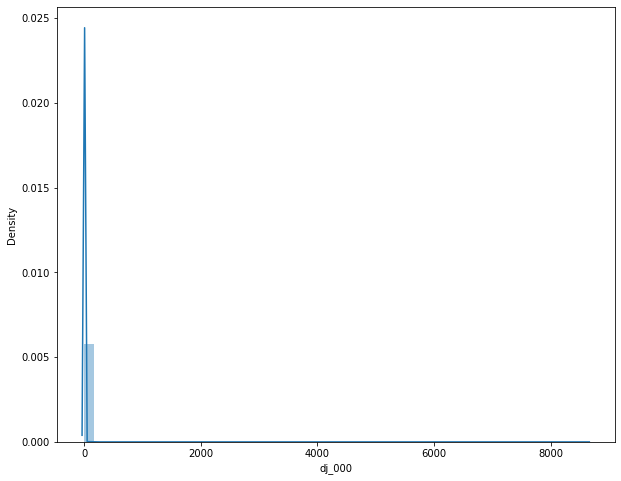

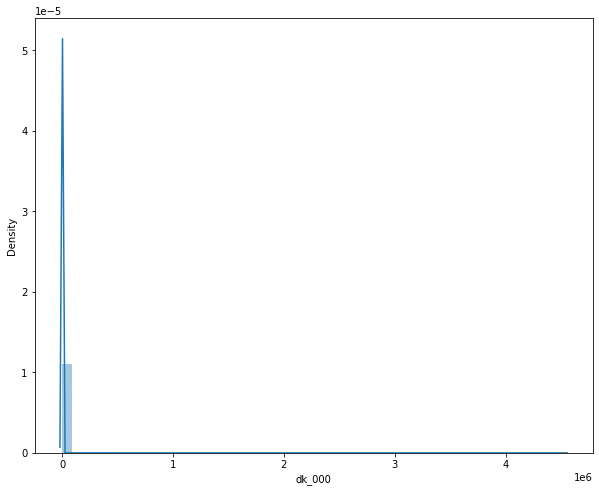

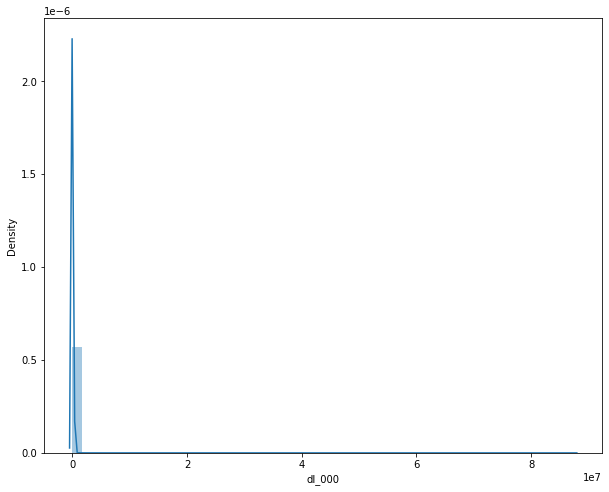

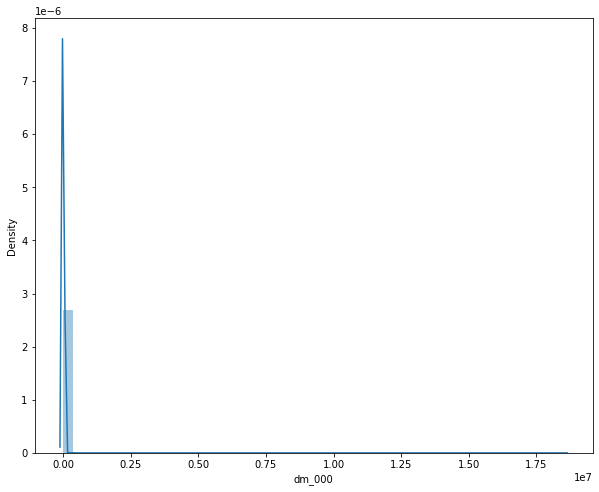

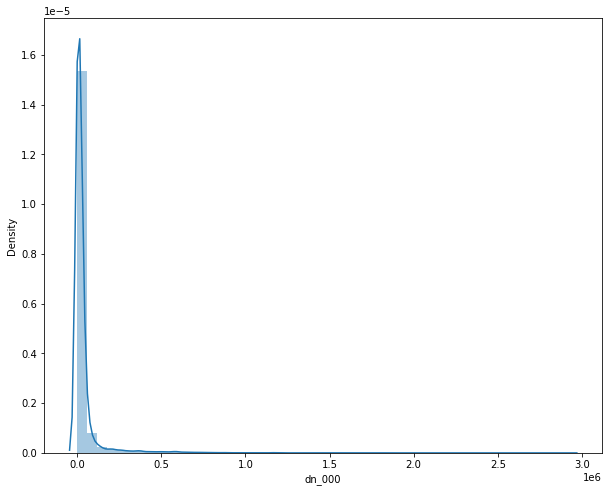

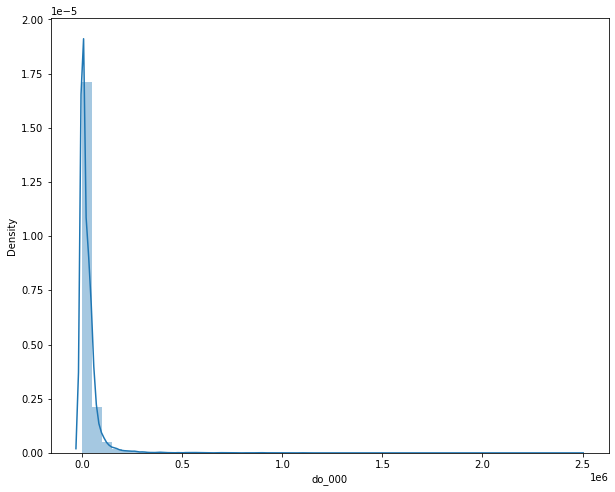

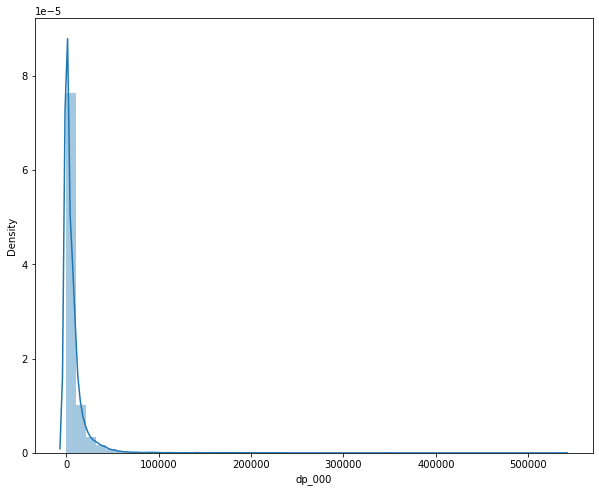

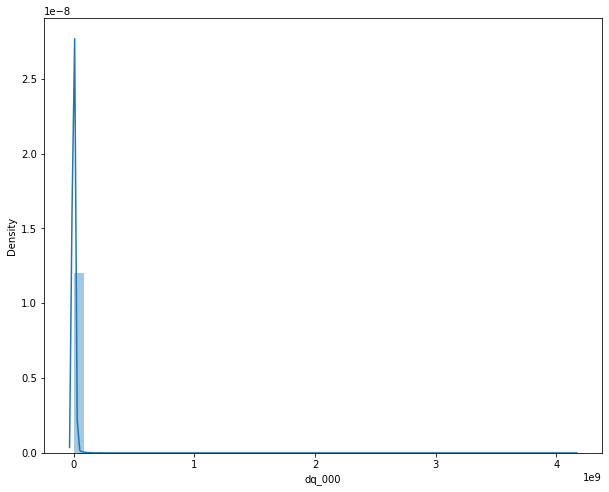

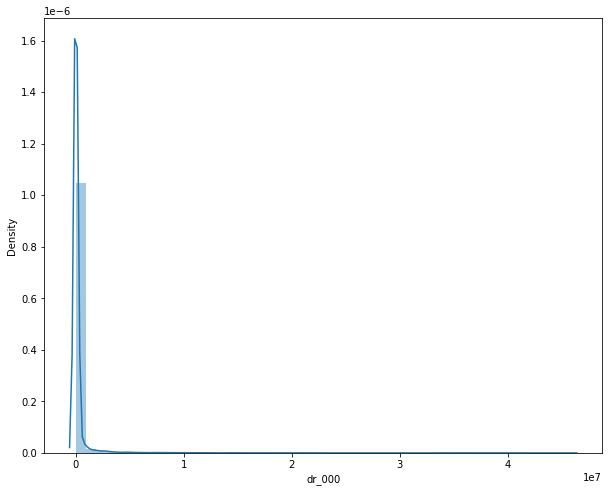

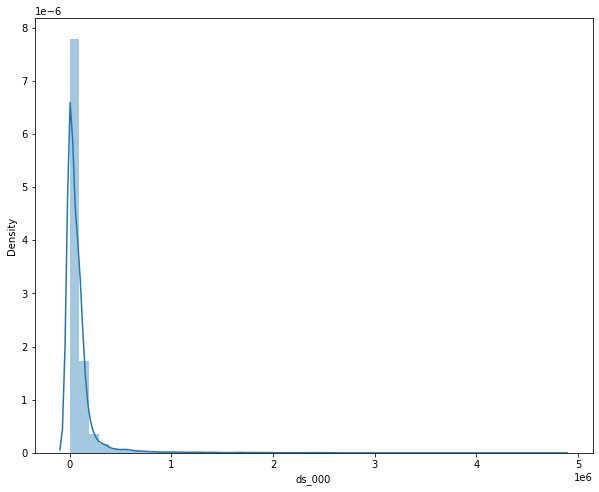

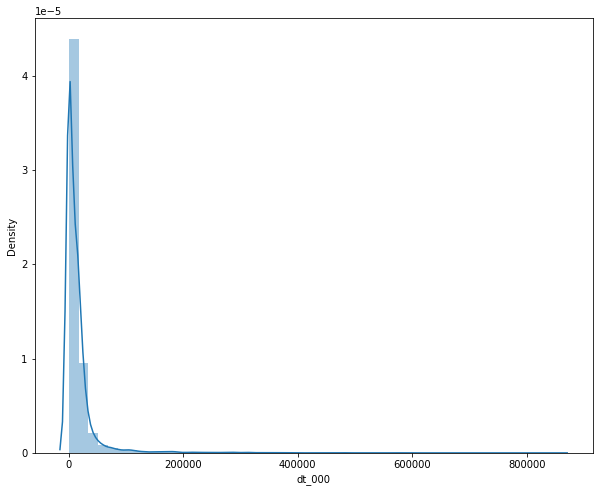

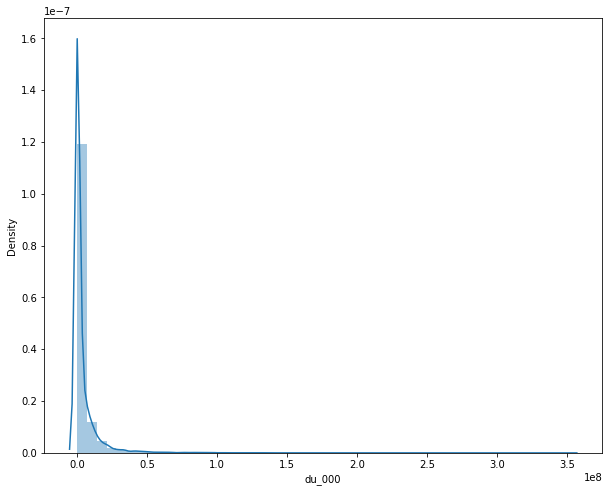

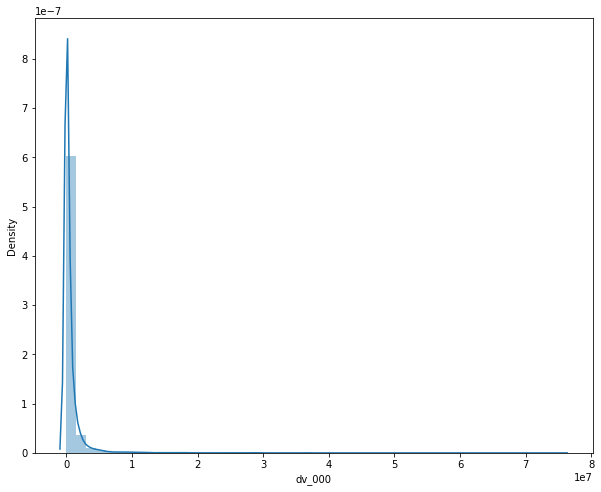

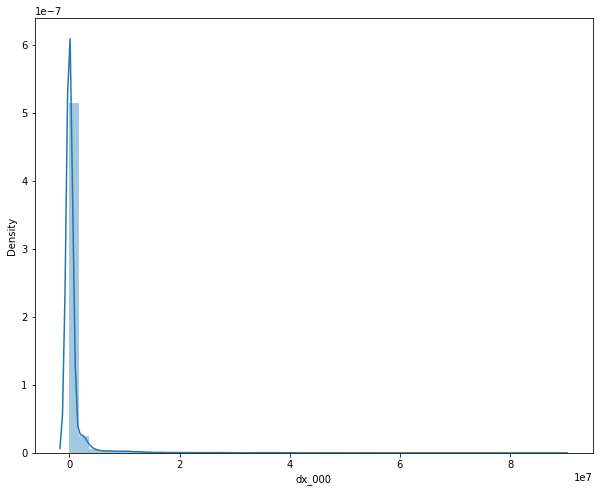

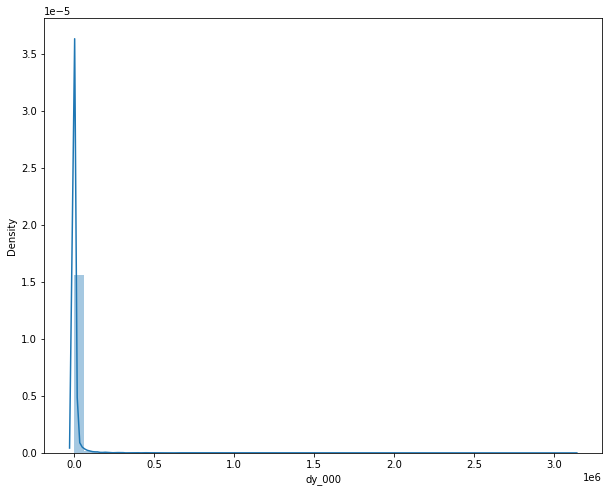

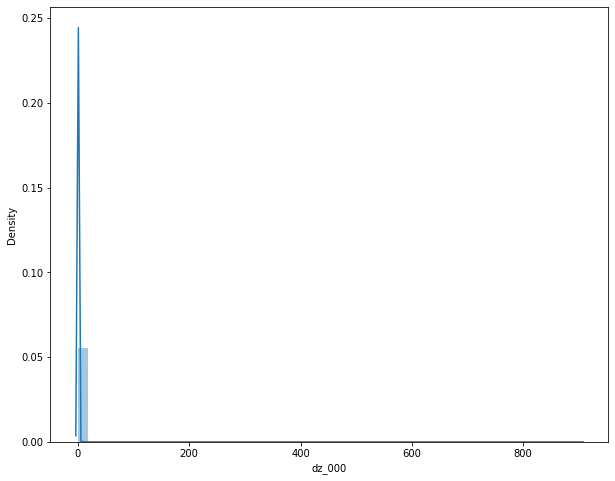

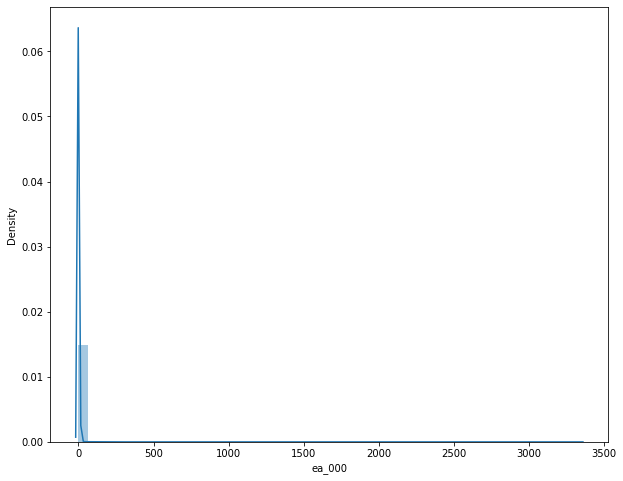

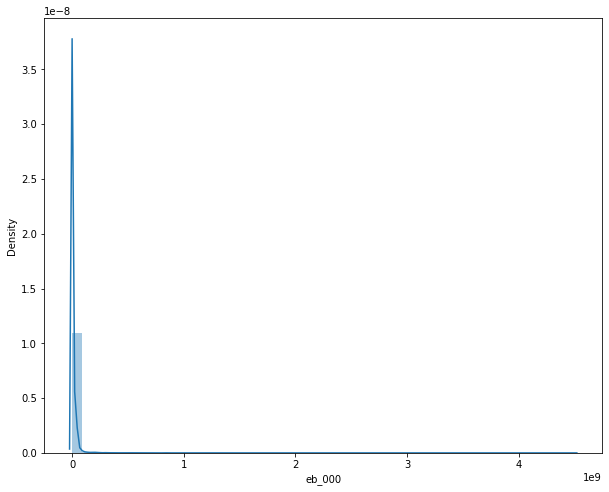

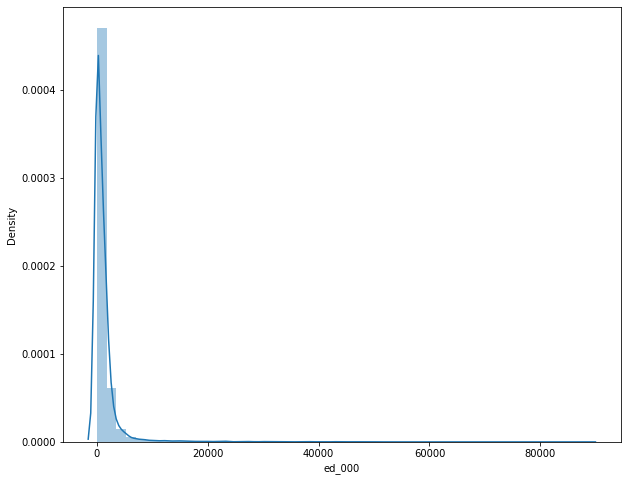

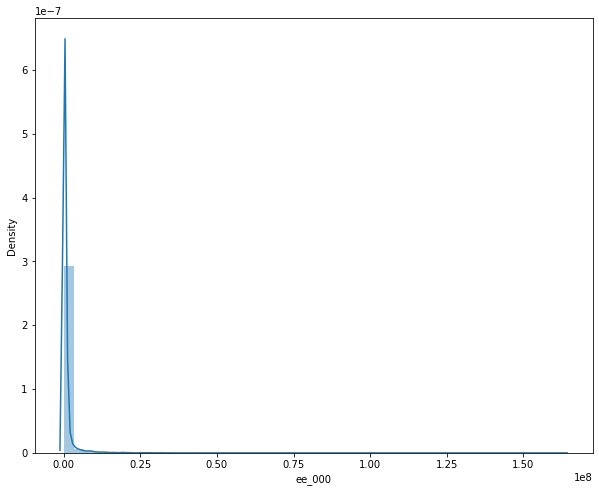

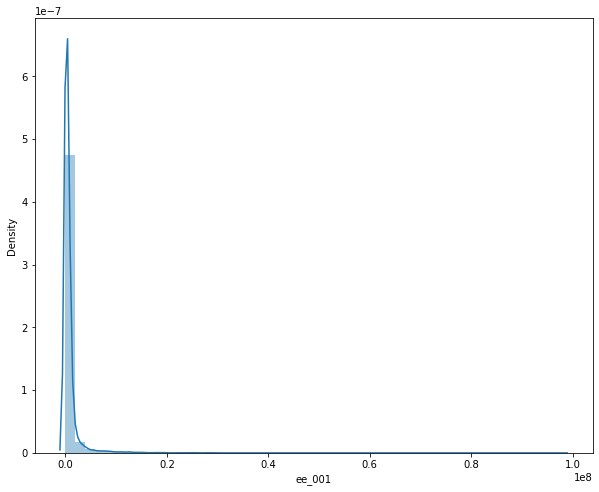

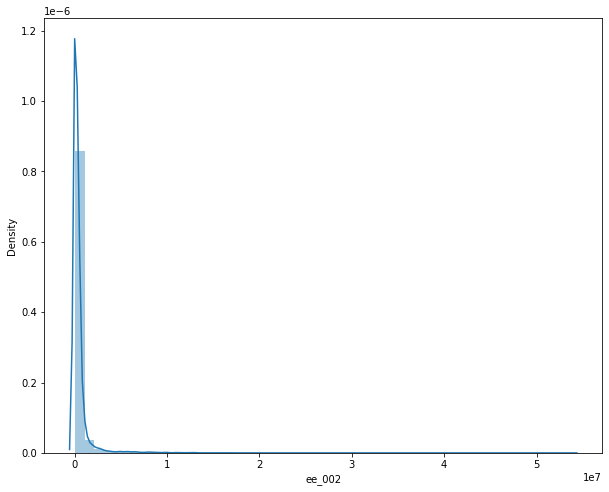

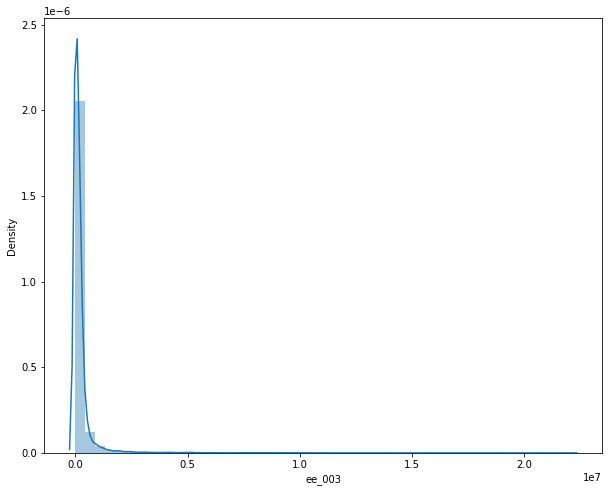

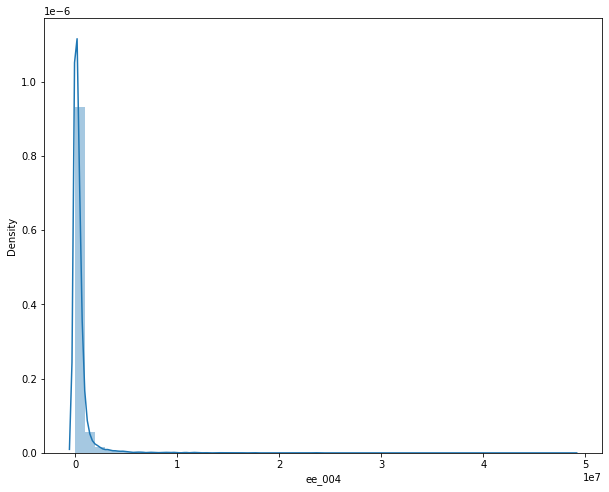

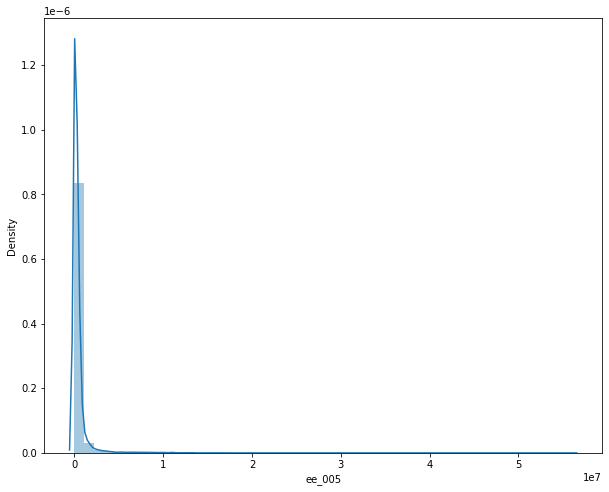

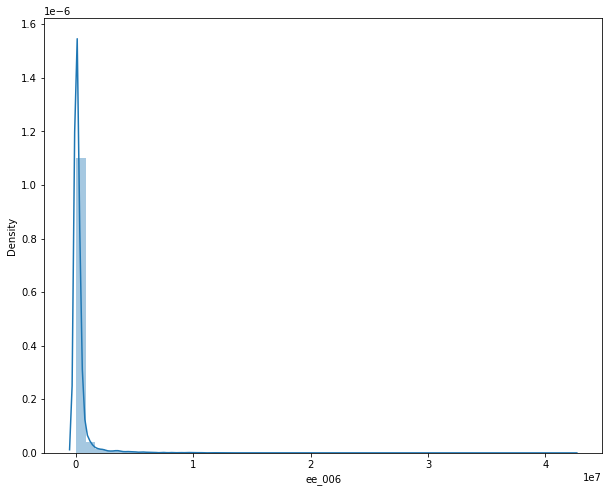

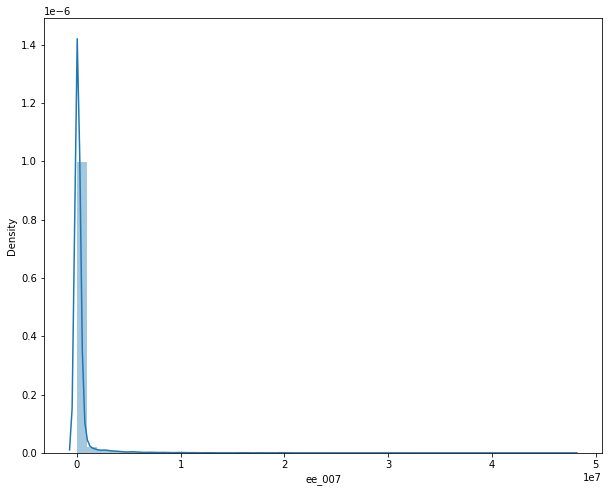

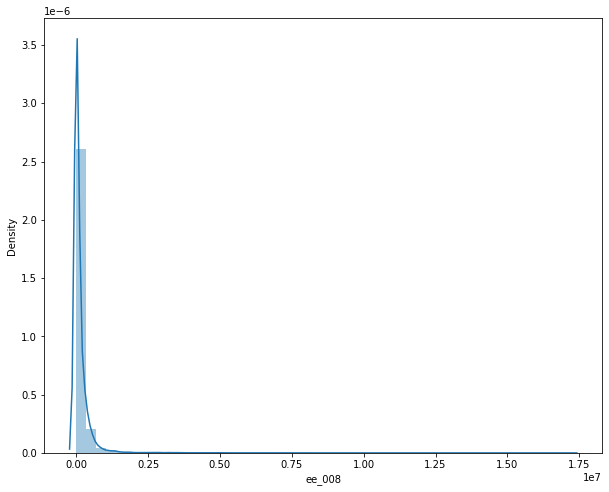

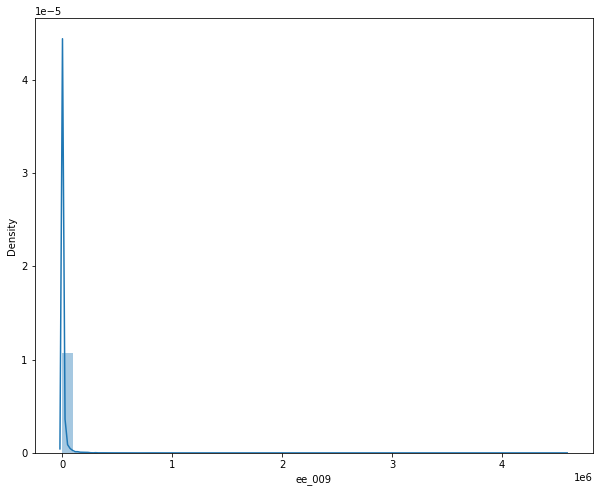

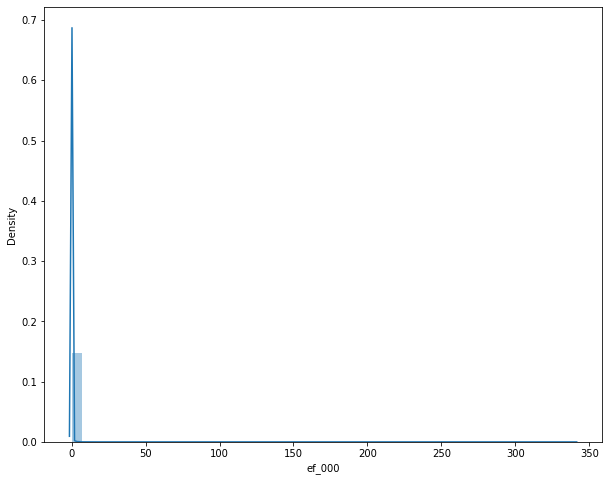

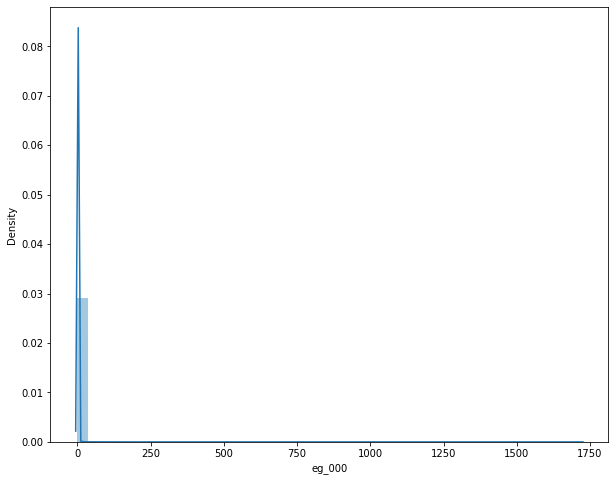

In [38]:
# Plotando alguns gráficos das features para tentar entendê-las

for coluna in colunas_INT:
    plt.figure(figsize=(10,8))
    sns.distplot(df_2020[coluna])

<font color="BLUE"><b> Talvez tenhamos uma sazonalidade em 'bk_000', 'bl_000', 'bm_000' (se os atributos forem relacionados a tempo)

#### 1.6.2 Estatísticas Atributos Categóricos

In [39]:
df_2020['class'].value_counts()


neg    15625
pos      375
Name: class, dtype: int64

In [40]:
df_anteriores['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [41]:
#Por remapear 'class' para 'pos'=1  e  'neg'=0

df_anteriores['class'] = df_anteriores['class'].replace('pos', 1)
df_anteriores['class'] = df_anteriores['class'].replace('neg', 0)

In [42]:
df_anteriores['class']

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: class, Length: 60000, dtype: int64

## 2.0 Feature Engineering

## 3.0 Algoritmo de Machine Learning

In [43]:
#Biblioteca para tratamento de dados desbalanceados
#!pip install imblearn --user

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [45]:
# divisao entre treino e teste do dataframe anteriores

X = df_anteriores.drop('class', axis = 1)
y = df_anteriores['class']

SEED = 42 
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

print(f'O dataset de treino possui {X_train.shape[0]} caminhões e o de teste {X_test.shape[0]} caminhões.')

X_train, y_train

O dataset de treino possui 42000 caminhões e o de teste 18000 caminhões.


(       aa_000  ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  ag_002  \
 918     34244       0     244      74       0       0       0       0       0   
 17141     850       0      92       0       0       0       0       0       0   
 15558    1424       0      20      18       0       0       0       0       0   
 27327       8       0       6       0       0       0       0       0       0   
 11606      62       2       8       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 54343   29690       0    2120    1864       0       0       0       0       0   
 38158       6       0      82      58       0       0       0       0       0   
 860     41694       0     188     150       0       0       0       0       0   
 15795     142       0      44      32       0       0       0       0       0   
 56422   33522       0     226     216       0       0       0       0       0   
 
        ag_003

In [46]:
#colocando como DataFrame

y_train = pd.DataFrame(y_train) 

In [47]:
y_train

class
918        0
17141      0
15558      0
27327      0
11606      0
...      ...
54343      0
38158      0
860        0
15795      0
56422      0

[42000 rows x 1 columns]

In [48]:
#Verificando os casos 'pos'=1 de 'manutenção no sistema de ar'
#Verificando os casos 'neg'=0 de 'manutenção em qq outro sistema'

y_train.value_counts()

class
0        41302
1          698
dtype: int64

In [49]:
#Sem tratarmos o desbalanceamento

lr0 = LogisticRegression()
lr0.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred0 = lr0.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred0)   #Lembrando que uma acurácia alta em classes desbalanceadas não significa um melhor resultado.

0.989

In [52]:
recall_score(y_test, y_pred0)

0.48344370860927155

In [53]:
#Testando com diversos modelos de ML e Tratando o desbalanceamento com amostragem StratifiedKFold

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)        #defino que teremos a mesma proporção das classes nos folds

models = [KNeighborsClassifier(), GaussianNB(),SVC(),DecisionTreeClassifier()]


In [54]:
#criando função para indicar o intervalo da acurácia, precisão e recall (para os 5 folds)

def media_acuracia(results):
    mean = results.mean()
    dv = results.std()
    print(f'Média acurácia: {(mean*100):.2f}% | Desvio: {dv:.5f}')

def media_precisao(results):
    mean = results.mean()
    dv = results.std()
    print(f'Média precisão: {(mean*100):.2f}% | Desvio: {dv:.5f}')
          
def media_recall(results):
    mean = results.mean()
    dv = results.std()
    print(f'Média recall: {(mean*100):.2f}% | Desvio: {dv:.5f}')

In [55]:
#Testando para a métrica accuracy

for model in models:
    np.random.seed(SEED) 
    
    results = cross_val_score(model, X_train, y_train, cv = cv,scoring = 'accuracy')
    print(model)
    print(results)
    media_acuracia(results)

KNeighborsClassifier()
[0.98619048 0.98619048 0.98595238 0.98785714 0.98642857]
Média acurácia: 98.65% | Desvio: 0.00068
GaussianNB()
[0.9697619  0.96309524 0.965      0.96666667 0.96821429]
Média acurácia: 96.65% | Desvio: 0.00234
SVC()
[0.98369048 0.98345238 0.98333333 0.98333333 0.98333333]
Média acurácia: 98.34% | Desvio: 0.00014
DecisionTreeClassifier()
[0.98904762 0.9902381  0.98916667 0.9902381  0.98892857]
Média acurácia: 98.95% | Desvio: 0.00059


In [56]:
#Testando para a métrica precision

for model in models:
    np.random.seed(SEED) 
    
    results = cross_val_score(model, X_train, y_train, cv = cv,scoring = 'precision')
    print(model)
    print(results)
    media_precisao(results)

KNeighborsClassifier()
[0.66666667 0.60747664 0.6375     0.68627451 0.68055556]
Média precisão: 65.57% | Desvio: 0.02943
GaussianNB()
[0.3415978  0.2939759  0.31034483 0.31770833 0.32112676]
Média precisão: 31.70% | Desvio: 0.01547
SVC()
[1. 0. 0. 0. 0.]
Média precisão: 20.00% | Desvio: 0.40000
DecisionTreeClassifier()
[0.66666667 0.68387097 0.67625899 0.70422535 0.67153285]
Média precisão: 68.05% | Desvio: 0.01315


In [57]:
#Testando para a métrica recall

for model in models:
    np.random.seed(SEED) 
    
    results = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'recall')
    print(model)
    print(results)
    media_recall(results)

KNeighborsClassifier()
[0.33093525 0.4676259  0.36428571 0.5        0.35      ]
Média recall: 40.26% | Desvio: 0.06795
GaussianNB()
[0.89208633 0.87769784 0.9        0.87142857 0.81428571]
Média recall: 87.11% | Desvio: 0.03016
SVC()
[0.01438849 0.         0.         0.         0.        ]
Média recall: 0.29% | Desvio: 0.00576
DecisionTreeClassifier()
[0.67625899 0.76258993 0.67142857 0.71428571 0.65714286]
Média recall: 69.63% | Desvio: 0.03813


### 3.0.1 Conclusão da Escolha do Modelo

Para prevermos o maior número de caminhões que apresentarão problema no sistema de ar, 
e assim poder encaminhá-los preventivamente para manutenção, 
o que resultará numa economia de $475 por caminhão com problema no sistema de ar, temos que
ter uma grande precisão e com um grande recall, ou seja,

PRECISÃO: de todos os caminhões que o algoritmo de ML classificou como sendo da classe 'pos', quantos realmente eram?
    
RECALL: de todos os caminhões que precisavam de manutenção do sistema de ar (classe 'pos'), 
        quantos foram corretamente classificados?
        
ACURÁCIA: quantas previsões certas do total de previsões.
        
Com base no atendimento dessas 2 métricas (PRECISÃO e RECALL), vemos que o melhor modelo é o DecisionTreeClassifier,
que tem Precisão = 68% e Recall = 70%

Se adotasse o modelo de melhor Recall = 87% teria uma Precisão = 32%, modelo de Naives Bayes, mas ao mesmo tempo que aumentaria 
o acerto quanto aos caminhões que precisam de manutenção no sistema de ar, só estaria classificando 32% corretamente, ou seja,
estaria aumentando o número de caminhões sem problema enviados para a manutenção do sistema de ar.

Aqui realmente poderia haver uma análise mais aprofundada se valeria considerar o Recall mais alto.

Devido a tempo, optei por uma abordagem mais equilibrada de Precisão e Recall, e recordando que neste caso, a acurácia do
modelo DecisionTreeClassifier também é a maior entre os algoritmos testados (98.95%)



### 3.1.1 Ajuste de Hiperparâmetros do Modelo

In [58]:
#cria lista de valores para o hiperparâmetro  max_depth
max_depth = [2, 3, 10, 12]
print(model)

for item in max_depth:
    np.random.seed(SEED)
    
    cv = StratifiedKFold(n_splits = 5, shuffle = True)
    
    model = DecisionTreeClassifier(max_depth=item)
    
    results = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'recall')
    
    print('-------------------------------------')
    print(f'Para MAX_DEPTH = {item}')
    print(results)
    media_recall(results)
    #media_precisao(results)
    #media_acuracia(results)
    

DecisionTreeClassifier()
-------------------------------------
Para MAX_DEPTH = 2
[0.20863309 0.31654676 0.26428571 0.30714286 0.29285714]
Média recall: 27.79% | Desvio: 0.03887
-------------------------------------
Para MAX_DEPTH = 3
[0.43884892 0.53956835 0.50714286 0.52142857 0.42857143]
Média recall: 48.71% | Desvio: 0.04492
-------------------------------------
Para MAX_DEPTH = 10
[0.58992806 0.73381295 0.66428571 0.66428571 0.65      ]
Média recall: 66.05% | Desvio: 0.04581
-------------------------------------
Para MAX_DEPTH = 12
[0.61870504 0.72661871 0.7        0.64285714 0.67857143]
Média recall: 67.34% | Desvio: 0.03871


In [59]:
#Testando para valores maiores do hiperparâmetro  max_depth
max_depth = [15, 16, 17, 18, 19, 20]
print(model)

for item in max_depth:
    np.random.seed(SEED)
    
    cv = StratifiedKFold(n_splits = 5, shuffle = True)
    
    model = DecisionTreeClassifier(max_depth=item)
    
    results = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'recall')
    
    print('-------------------------------------')
    print(f'Para MAX_DEPTH = {item}')
    print(results)
    media_recall(results)
    #media_precisao(results)
    #media_acuracia(results)
    

DecisionTreeClassifier(max_depth=12)
-------------------------------------
Para MAX_DEPTH = 15
[0.64028777 0.74820144 0.70714286 0.67857143 0.66428571]
Média recall: 68.77% | Desvio: 0.03720
-------------------------------------
Para MAX_DEPTH = 16
[0.67625899 0.76258993 0.69285714 0.67142857 0.66428571]
Média recall: 69.35% | Desvio: 0.03581
-------------------------------------
Para MAX_DEPTH = 17
[0.66906475 0.75539568 0.67857143 0.72142857 0.67142857]
Média recall: 69.92% | Desvio: 0.03393
-------------------------------------
Para MAX_DEPTH = 18
[0.67625899 0.76258993 0.67857143 0.67857143 0.68571429]
Média recall: 69.63% | Desvio: 0.03328
-------------------------------------
Para MAX_DEPTH = 19
[0.68345324 0.75539568 0.67857143 0.65714286 0.67857143]
Média recall: 69.06% | Desvio: 0.03364
-------------------------------------
Para MAX_DEPTH = 20
[0.69784173 0.77697842 0.68571429 0.67142857 0.70714286]
Média recall: 70.78% | Desvio: 0.03659


In [60]:
#Testando a Precisão para o MAX_DEPTH = 17
np.random.seed(SEED)
max_depth = 17

cv = StratifiedKFold(n_splits = 5, shuffle = True)
    
model = DecisionTreeClassifier(max_depth=max_depth)
    
results = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'precision')
    
print('-------------------------------------')
print(f'Para MAX_DEPTH = {max_depth}')
print(results)
#media_recall(results)
media_precisao(results)
#media_acuracia(results)
    

-------------------------------------
Para MAX_DEPTH = 17
[0.70454545 0.72916667 0.73643411 0.77099237 0.70149254]
Média precisão: 72.85% | Desvio: 0.02519


In [61]:
#Testando a Acurácia para o MAX_DEPTH = 17
np.random.seed(SEED)
max_depth = 17

cv = StratifiedKFold(n_splits = 5, shuffle = True)
    
model = DecisionTreeClassifier(max_depth=max_depth)
    
results = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'accuracy')
    
print('-------------------------------------')
print(f'Para MAX_DEPTH = {max_depth}')
print(results)
#media_recall(results)
#media_precisao(results)
media_acuracia(results)
    

-------------------------------------
Para MAX_DEPTH = 17
[0.98988095 0.99130952 0.99059524 0.99178571 0.9897619 ]
Média acurácia: 99.07% | Desvio: 0.00079


### 3.2.0 Aplicando o Modelo escolhido no arquivo de Alvo (df_2020)

In [62]:
df_2020['class'].value_counts()

neg    15625
pos      375
Name: class, dtype: int64

In [63]:
#Por remapear 'class' para 'pos'=1  e  'neg'=0

df_2020['class'] = df_2020['class'].replace('pos', 1)
df_2020['class'] = df_2020['class'].replace('neg', 0)

df_2020['class']

0        0
1        0
2        0
3        0
4        0
        ..
15995    0
15996    0
15997    0
15998    0
15999    0
Name: class, Length: 16000, dtype: int64

In [64]:
# separando variáveis explicativas e dependente
X_2020 = df_2020.drop('class', axis = 1)
y_2020 = pd.DataFrame(df_2020['class'])

SEED = 42
np.random.seed(SEED) 

model = DecisionTreeClassifier(max_depth=17)
model.fit(X_train, y_train)     #treino o modelo com os dados de df_anteriores


y_pred_2020 = model.predict(X_2020)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", 
       classification_report(y_2020, y_pred_2020, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9922    0.9960    0.9941     15625
           1     0.8032    0.6747    0.7333       375

    accuracy                         0.9885     16000
   macro avg     0.8977    0.8353    0.8637     16000
weighted avg     0.9878    0.9885    0.9880     16000



In [65]:
y_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   16000 non-null  int64
dtypes: int64(1)
memory usage: 125.1 KB


In [66]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

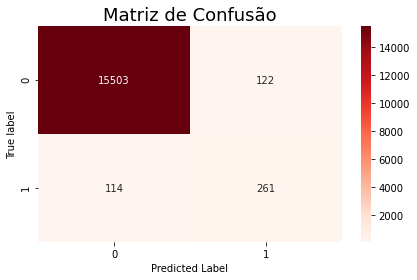

In [67]:
y_predCV = cross_val_predict(model, X_2020, y_2020, cv = cv)

#plotando a matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_2020, y_predCV), annot=True, ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

O modelo identificou corretamente 261 caminhões que vão ter problema no sistema de ar para enviá-los à manutenção PREVENTIVA, 
o que custará $25 x 261 = $6.525

Considerando que o modelo também encaminhou (erroneamente) 122 caminhões para a manutenção preventiva sem haver a necessidade,
tivemos mais um custo de $10 x 122 = $1.220

E por fim, temos os casos onde o modelo não conseguiu detectar os caminhões que apresentariam problema no sistema de ar, 
que totalizam 114 caminhões que tiveram que ir para manutenção CORRETIVA gerando um custo de $500 x 114 = $57.000

CUSTO TOTAL MANUTENÇÃO SISTEMA DE AR EM 2020 (REAL) = $37.000
CUSTO TOTAL MANUTENÇÃO SISTEMA DE AR EM 2020 (MODELO) = $64.745

DESCARTAMOS ESTA HIPÓTESE E TENTAMOS AUMENTAR AO MÁXIMO O RECALL


RETORNAMOS AO MODELO DE MAIOR RECALL -> NAIVE BAYES

In [68]:
# Aproveitando o modelo DecisionTreeClassifier já treinado verificamos as features mais importantes
model.feature_importances_

array([3.40602527e-03, 3.88826960e-04, 4.44854383e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.37440118e-02,
       4.72963169e-02, 0.00000000e+00, 8.75725081e-03, 8.75268071e-03,
       0.00000000e+00, 3.89243584e-03, 1.17256608e-03, 1.34007551e-03,
       1.18536134e-02, 3.45879987e-03, 3.44189758e-03, 0.00000000e+00,
       0.00000000e+00, 4.55571410e-02, 8.05751724e-03, 0.00000000e+00,
       2.69000453e-03, 1.55856070e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.13446259e-03, 0.00000000e+00, 1.21047295e-02, 3.10673911e-03,
       5.12926770e-03, 6.68462034e-02, 2.75165115e-02, 1.04228096e-03,
       2.10018879e-02, 2.06273782e-02, 3.35877902e-03, 1.17256608e-03,
       4.54558269e-03, 0.00000000e+00, 4.07140998e-03, 7.81710717e-04,
       0.00000000e+00, 2.30536090e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.69026430e-03, 9.43374020e-03, 0.00000000e+00,
      

In [69]:
feature_importance = pd.DataFrame(model.feature_importances_, 
                                  index = X_2020.columns,
                                 columns = ['importance']).sort_values('importance', ascending = False)

feature_importance

importance
bj_000    0.311887
ag_001    0.083744
ay_005    0.066846
ag_002    0.047296
am_0      0.045557
ay_006    0.027517
ay_008    0.021002
ay_009    0.020627
bi_000    0.019125
bt_000    0.018401
cn_004    0.015035
cj_000    0.012503
ay_002    0.012105
ah_000    0.011854
ck_000    0.011452
ee_005    0.011092
ba_002    0.009434
ag_004    0.008757
ag_005    0.008753
ba_007    0.008434
an_000    0.008058
ec_00     0.007917
dg_000    0.007907
bs_000    0.007386
cn_003    0.007361
cl_000    0.006919
dx_000    0.006739
bf_000    0.005995
cs_000    0.005933
ba_006    0.005879
ci_000    0.005835
ee_004    0.005746
cc_000    0.005695
cs_007    0.005512
br_000    0.005190
ay_004    0.005129
dv_000    0.004824
ba_001    0.004690
do_000    0.004637
az_002    0.004546
ac_000    0.004449
cs_004    0.004149
az_004    0.004071
ag_007    0.003892
di_000    0.003653
dn_000    0.003509
ai_000    0.003459
aj_000    0.003442
aa_000    0.003406
cs_006    0.003379
az_000    0.003359
cn_007    0.003204
ay_003    0.003107
be_000    0.003049
ds_000    0.002903
dp_000    0.002736
ap_000    0.002690
dz_000    0.002644
cs_002    0.002632
cs_001    0.002345
ed_000    0.002345
az_007    0.002305
de_000    0.002089
bc_000    0.002008
cy_000    0.001973
bl_000    0.001954
cs_003    0.001806
bn_000    0.001729
aq_000    0.001559
bh_000    0.001537
cz_000    0.001442
ag_009    0.001340
ee_001    0.001340
bo_000    0.001251
ba_009    0.001251
bd_000    0.001191
dq_000    0.001173
ag_008    0.001173
az_001    0.001173
ee_000    0.001173
ay_000    0.001134
bk_000    0.001042
cn_005    0.001042
ay_007    0.001042
ca_000    0.000978
az_005    0.000782
ee_002    0.000782
eb_000    0.000735
cg_000    0.000478
ab_000    0.000389
dr_000    0.000222
cn_009    0.000166
ct_000    0.000000
cs_009    0.000000
cu_000    0.000000
cv_000    0.000000
ee_009    0.000000
ef_000    0.000000
ee_007    0.000000
ee_008    0.000000
cs_008    0.000000
du_000    0.000000
cx_000    0.000000
da_000    0.000000
ee_006    0.000000
db_000    0.000000
dc_000    0.000000
dd_000    0.000000
dy_000    0.000000
df_000    0.000000
dt_000    0.000000
dh_000    0.000000
dj_000    0.000000
dk_000    0.000000
dl_000    0.000000
dm_000    0.000000
ea_000    0.000000
ee_003    0.000000
bz_000    0.000000
cs_005    0.000000
at_000    0.000000
ba_003    0.000000
ba_000    0.000000
az_009    0.000000
az_008    0.000000
az_006    0.000000
az_003    0.000000
ay_001    0.000000
ax_000    0.000000
av_000    0.000000
au_000    0.000000
as_000    0.000000
ba_005    0.000000
ar_000    0.000000
ao_000    0.000000
al_000    0.000000
ak_000    0.000000
ag_006    0.000000
ag_003    0.000000
ag_000    0.000000
af_000    0.000000
ae_000    0.000000
ad_000    0.000000
ba_004    0.000000
ba_008    0.000000
cr_000    0.000000
cf_000    0.000000
cq_000    0.000000
cp_000    0.000000
co_000    0.000000
cn_008    0.000000
cn_006    0.000000
cn_002    0.000000
cn_001    0.000000
cn_000    0.000000
cm_000    0.000000
ch_000    0.000000
ce_000    0.000000
bb_000    0.000000
cd_000    0.000000
cb_000    0.000000
by_000    0.000000
bx_000    0.000000
bv_000    0.000000
bu_000    0.000000
bq_000    0.000000
bp_000    0.000000
bm_000    0.000000
bg_000    0.000000
eg_000    0.000000

Dos 170 atributos, apenas 92 atributos explicam 100% do atributo target ('class' = falha no sistema de ar).
Sendo que 42 atributos respondem por 90,19% do atributo target.
Ou considerando 24 atributos mais importantes explicamos 80,26% das falhas no sistema.

A relação desses atributos que alertam para uma possível falha no sistema de ar dos
caminhões está relacionada em planilha Excel anexa.

### 3.3.0 Aplicando o Modelo de maior Recall -> GaussianNB

In [70]:
from sklearn.naive_bayes import GaussianNB

In [71]:
np.random.seed(SEED) 

model = GaussianNB()
    
results = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'recall')
print(model)
print(results)
media_recall(results)

GaussianNB()
[0.89208633 0.87769784 0.9        0.87142857 0.81428571]
Média recall: 87.11% | Desvio: 0.03016


In [72]:
# separando variáveis explicativas e dependente do df_2020
X_2020 = df_2020.drop('class', axis = 1)
y_2020 = pd.DataFrame(df_2020['class'])

SEED = 42
np.random.seed(SEED) 

model = GaussianNB()
model.fit(X_train, y_train)     #treino o modelo com os dados de df_anteriores


y_pred_2020 = model.predict(X_2020)    #aqui fazemos a predição para os valores de df_2020

# imprimir relatório de classificação
print("Relatório de Classificação:\n", 
       classification_report(y_2020, y_pred_2020, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9975    0.9679    0.9825     15625
           1     0.4021    0.8987    0.5556       375

    accuracy                         0.9663     16000
   macro avg     0.6998    0.9333    0.7691     16000
weighted avg     0.9835    0.9663    0.9725     16000



<font color="BLUE"><b>Métrica de Recall = 89,87%

<b>Verificando a nova Matriz de Confusão

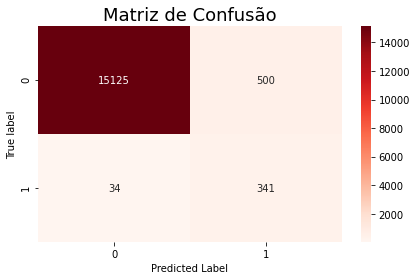

In [73]:
y_predCV_Bayes = cross_val_predict(model, X_2020, y_2020, cv = cv)

#plotando a matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_2020, y_predCV_Bayes), annot=True, ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

<font color="BLACK">O modelo identificou corretamente <font color="RED">341 <font color="BLACK">caminhões que vão ter problema no sistema de ar para enviá-los à manutenção <b>PREVENTIVA</b>, 
<p>o que custará <font color="RED">\$25 x 341 = \$8.525<font color="BLACK"></p>

Considerando que o modelo também encaminhou (erroneamente) <font color="RED">500 <font color="BLACK">caminhões para a manutenção preventiva sem haver a necessidade,
<p>tivemos mais um custo de <font color="RED">\$10 x 500 = \$5.000<font color="BLACK"></p>

E por fim, temos os casos onde o modelo não conseguiu detectar os caminhões que apresentariam problema no sistema de ar, 
que totalizam <font color="RED">34 <font color="BLACK">caminhões que tiveram que ir para manutenção <b>CORRETIVA</b> gerando um <p>custo de <font color="RED"> \\$500 x 34 = \\$17.000<font color="BLACK"></p>

CUSTO TOTAL MANUTENÇÃO SISTEMA DE AR EM 2020 (REAL) = <font color="RED">\$37.000<font color="BLACK">
<p>CUSTO TOTAL MANUTENÇÃO SISTEMA DE AR EM 2020 (MODELO) = <font color="RED">\$30.525

## 4.0 Conclusão

<p>Conseguimos com os modelos de machine learning determinar os fatores mais importantes que 
indicam a possível ocorrência de falha no sistema de ar dos caminhões.</p>

<p>Conseguimos também com um modelo de machine learnig diminuir os custos relativos à manutenção do sistema de ar, 
com um economia de quase <font color="RED">\$6.500 <font color="BLACK">referente ao ano de 2020.</p>

<p>Este trabalho foi apenas inicial havendo possibilidade de, com mais tempo e com uma interação com a área de negócio
(manutenção), um entendimento melhor dos fatores para uma otimização dos modelos, bem como uma análise mais aprofundada
dos modelos a serem utilizados, incluindo talvez a possibilidade de um escalonamento na quantidade de caminhões enviados 
para manutenção do sistema de ar que permita um maior aproveitamento destes ativamente na frota.</p>
